## Datasets Used

### 1. Telecom Churn:
https://www.kaggle.com/jpacse/datasets-for-churn-telecom

### 2. Credit Card Fraud:
https://www.kaggle.com/mlg-ulb/creditcardfraud

### 3. Predictive Maintenance
https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset

### Nearly all functions and libraries used in this Project, unless specified, have been imported from my Machine Learning Template Titled: "MLTemplate.ipynb", below. 

In [1]:
%run MLTemplate.ipynb

## Importing Libraries and Functions for DR and FS

In [2]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE as tsne 
from sklearn.feature_selection import SelectFromModel as sfm
import sklearn

### Linear Discriminant Analysis 

In [4]:
def lda(dataset):
    clf = LDA()
    clf.fit(dataset.iloc[:,:-1],dataset.iloc[:,-1])
    data = clf.fit_transform(dataset.iloc[:,:-1],dataset.iloc[:,-1])
    data = pd.DataFrame(data)
    label = str(input("What is the label column?"))
    data['label'] = dataset[label]
    return data

### Principle Component Analysis

In [5]:
def pca(dataset, components):
    clf = PCA(n_components = components)
    clf.fit(dataset.iloc[:,:-1])
    data = clf.fit_transform(dataset.iloc[:,:-1],dataset.iloc[:,-1])
    data = pd.DataFrame(data)
    label = str(input("What is the label column?"))
    data['label'] = dataset[label]
    return data

### T-distributed Stochastic Neighbor Embedding

In [6]:
def tdsne(dataset,components):
    data = tsne(n_components = components, random_state=0).fit_transform(dataset.iloc[:,:-1])
    data = pd.DataFrame(data)
    label = str(input("What is the label column?"))
    data['label'] = dataset[label]
    return data

### L1 Based Feature Selection (Lasso Regression)

In [7]:
def lasso(dataset):
    trainX,testX,trainY,testY=splitting(dataset)
    scaler = StdSclr(copy=True, with_mean=True, with_std=True)
    scaler.fit(trainX)
    selector = sfm(LogR(C=1, penalty='l1', solver='liblinear'))
    selector.fit(scaler.transform(trainX.fillna(0)),trainY)
    data = selector.transform(dataset.iloc[:,:-1])
    data = pd.DataFrame(data)
    label = str(input("What is the label column?"))
    data['label'] = dataset[label]
    return data

### Random Forest Feature Selection

In [8]:
def RFSelector(dataset):
    trainX,testX,trainY,testY=splitting(dataset)
    scaler = StdSclr(copy=True, with_mean=True, with_std=True)
    scaler.fit(trainX)
    selector = sfm(RFC(n_estimators = 100))
    selector.fit(scaler.transform(trainX.fillna(0)),trainY)
    data = selector.transform(dataset.iloc[:,:-1])
    data = pd.DataFrame(data)
    label = str(input("What is the label column?"))
    data['label'] = dataset[label]
    return data

### Recursive Feature Elimination

In [9]:
def recurfe(dataset):
    X,y = dataset.iloc[:,:-1],dataset.iloc[:,-1]
    estimator = SVR(kernel="linear")
    selector = RFECV(estimator, step=5, cv=5)
    selector = selector.fit(X, y)
    data = selector.fit_transform(X,y)
    data = pd.DataFrame(data)
    label = str(input("What is the label column?"))
    data['label'] = y
    return data

## Importing Libraries and Functions for Clustering

In [3]:
from kneed import KneeLocator as kl
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans as km, MiniBatchKMeans as minik, DBSCAN, AffinityPropagation as afp, SpectralClustering as spc, OPTICS, MeanShift as MS, Birch, AgglomerativeClustering as AGC 
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from itertools import cycle

### K Means Clustering

In [11]:
def kmeansalgo(data):
    scaled = StdSclr().fit_transform(data)
    kmeans = km(init = 'random', n_clusters=3, 
       n_init=10, max_iter=300, random_state=42)
    kmeans.fit(scaled)
    centroids = kmeans.cluster_centers_
    print('K Means Inertia = ', kmeans.inertia_, '\nK-Means Centroid Locations = ', kmeans.cluster_centers_)
    print('Number of Iterations Required for Conversion', kmeans.n_iter_)
    print("Predicted Labels = ", kmeans.labels_)
    sse=[]
    scoeff = []
    for i in range(1,11):
        newmeans = km(init = 'random', n_clusters=i, 
       n_init=10, max_iter=300, random_state=42)
        newmeans.fit(scaled)
        sse.append(newmeans.inertia_)
    plt.style.use('fivethirtyeight')
    plt.plot(range(1,11), sse)
    plt.xticks(range(1,11))
    plt.xlabel('Number of Clusters')
    plt.ylabel('SSE')
    plt.show()

    kneelocator = kl(range(1,11), sse, curve = 'convex', direction='decreasing')
    print("Elbow Point is ",kneelocator.elbow)
    fig, ax = plt.subplots(figsize=(6,6))
    plt.scatter(scaled[kmeans.labels_ == 0,0], scaled[kmeans.labels_==0,1], 
                c = 'blue', label = 'cluster 1')
    plt.scatter(scaled[kmeans.labels_ == 1,0], scaled[kmeans.labels_==1,1], 
                c = 'red', label = 'cluster 2')
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='green', label='centroid')
    plt.legend()
    plt.xlim([-2,2])
    plt.ylim([-2,2])

### Mini-Batch K-Means

In [12]:
def minibatch(data):
    scaled = StdSclr().fit_transform(data)
    kmeans = minik(init = 'random', n_clusters=3, 
       batch_size=6)
    kmeans.fit(scaled)
    centroids = kmeans.cluster_centers_
    print('K Means Inertia = ', kmeans.inertia_, '\nK-Means Centroid Locations = ', kmeans.cluster_centers_)
    print('Number of Iterations Required for Conversion', kmeans.n_iter_)
    print("Predicted Labels = ", kmeans.labels_)
    sse=[]
    scoeff = []
    for i in range(1,11):
        newmeans = km(init = 'random', n_clusters=i, 
       n_init=10, max_iter=300, random_state=42)
        newmeans.fit(scaled)
        sse.append(newmeans.inertia_)
    plt.style.use('fivethirtyeight')
    plt.plot(range(1,11), sse)
    plt.xticks(range(1,11))
    plt.xlabel('Number of Clusters')
    plt.ylabel('SSE')
    plt.show()

    kneelocator = kl(range(1,11), sse, curve = 'convex', direction='decreasing')
    print("Elbow Point is ",kneelocator.elbow)
    fig, ax = plt.subplots(figsize=(6,6))
    plt.scatter(scaled[kmeans.labels_ == 0,0], scaled[kmeans.labels_==0,1], 
                c = 'blue', label = 'cluster 1')
    plt.scatter(scaled[kmeans.labels_ == 1,0], scaled[kmeans.labels_==1,1], 
                c = 'red', label = 'cluster 2')
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='green', label='centroid')
    plt.legend()
    plt.xlim([-2,2])
    plt.ylim([-2,2])

### DBSCAN Method

In [13]:
def DB(data):
    newdata = StdSclr().fit_transform(data)
    clustering = DBSCAN(eps = 3, min_samples = 2).fit(newdata)
    labels = clustering.labels_
    clustering
    core_samples_mask = np.zeros_like(labels,dtype=bool)
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = newdata[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = newdata[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()
    
    

## Importing Libraries for MCMC

In [4]:
from scipy import stats
import pymc3 as pm
from statistics import mean
from scipy.stats import skewnorm
import arviz as az

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Loading Datasets

In [16]:
telchurn = loadfile()

What is the file type? (csv or excel)
csv
What encoding do you want? (latin1 or unicode_escape)
latin1
What is the filepath:telchurn.csv


In [17]:
creditcard = loadfile()

What is the file type? (csv or excel)
csv
What encoding do you want? (latin1 or unicode_escape)
latin1
What is the filepath:creditcard.csv


In [18]:
predmaint = loadfile()

What is the file type? (csv or excel)
csv
What encoding do you want? (latin1 or unicode_escape)
latin1
What is the filepath:predmaint.csv


## Analysis Procedure

### For each dataset, I will follow a 4-part procedure for analysis
#### 1. Wrangling/Cleaning Data
#### 2. Using a Combination of Supervised and Unsupervised Methods for Classification
#### 3. Using MCMC Methods for Classification
#### 4. Comparing Both Performances

## Telecom Churn Dataset

In [19]:
telchurn

Unnamed: 0  Churn  MonthlyRevenue  MonthlyMinutes  \
0               0    1.0           24.00           219.0   
1               1    1.0           16.99            10.0   
2               2    0.0           38.00             8.0   
3               3    0.0           82.28          1312.0   
4               4    1.0           17.14             0.0   
...           ...    ...             ...             ...   
49747       49747    0.0            0.00            76.0   
49748       49748    0.0           31.92            63.0   
49749       49749    0.0           71.99           724.0   
49750       49750    1.0          117.49           384.0   
49751       49751    0.0           95.17          1745.0   

       TotalRecurringCharge  DirectorAssistedCalls  OverageMinutes  \
0                      22.0                   0.25             0.0   
1                      17.0                   0.00             0.0   
2                      38.0                   0.00             0.0   
3                      75.0                   1.24             0.0   
4                      17.0                   0.00             0.0   
...                     ...                    ...             ...   
49747                  30.0                   0.00             0.0   
49748                  17.0                   0.00            43.0   
49749                  70.0                   0.00             4.0   
49750                  30.0                   0.00           250.0   
49751                  85.0                   0.99            45.0   

       RoamingCalls  PercChangeMinutes  PercChangeRevenues  ...  \
0               0.0             -157.0               -19.0  ...   
1               0.0               -4.0                 0.0  ...   
2               0.0               -2.0                 0.0  ...   
3               0.0              157.0                 8.1  ...   
4               0.0                0.0                -0.2  ...   
...             ...                ...                 ...  ...   
49747           0.0                0.0                 0.0  ...   
49748           0.0              -38.0               -13.2  ...   
49749           0.9              -40.0                -2.0  ...   
49750           0.0                0.0                 0.0  ...   
49751           4.7              122.0                15.9  ...   

       NotNewCellphoneUser  ReferralsMadeBySubscriber  IncomeGroup  \
0                      0.0                        0.0          4.0   
1                      0.0                        0.0          5.0   
2                      0.0                        0.0          6.0   
3                      0.0                        0.0          6.0   
4                      1.0                        0.0          9.0   
...                    ...                        ...          ...   
49747                  0.0                        0.0          4.0   
49748                  0.0                        0.0          3.0   
49749                  0.0                        0.0          7.0   
49750                  0.0                        0.0          2.0   
49751                  0.0                        0.0          9.0   

       OwnsMotorcycle  AdjustmentsToCreditRating  MadeCallToRetentionTeam  \
0                 0.0                        0.0                      1.0   
1                 0.0                        0.0                      0.0   
2                 0.0                        0.0                      0.0   
3                 0.0                        0.0                      0.0   
4                 0.0                        1.0                      0.0   
...               ...                        ...                      ...   
49747             0.0                        0.0                      0.0   
49748             0.0                        0.0                      0.0   
49749             0.0                        0.0                      0.0   
49750             0.0        

In [20]:
#Getting rid of Customer ID Column. It serves no purpose
telchurn = remcol(telchurn)

which column do you want to remove?
Unnamed: 0
which column do you want to remove?



In [21]:
#Checking out other columns
telchurn.columns

Index(['Churn', 'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'ServiceArea', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays',
       'AgeHH1', 'AgeHH2', 'ChildrenInHH', 'HandsetRefurbished',
       'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership',
       'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings',
       'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'RetentionCalls',
       'RetentionOffersAccepted', 'NewCellphoneUser', 'NotNewCellphoneUser',
       'ReferralsMadeBySubscriber', 'IncomeGroup', 'OwnsMoto

In [15]:
null(telchurn)

Churn                          0
MonthlyRevenue               156
MonthlyMinutes               156
TotalRecurringCharge         156
DirectorAssistedCalls        156
OverageMinutes               156
RoamingCalls                 156
PercChangeMinutes            367
PercChangeRevenues           367
DroppedCalls                   0
BlockedCalls                   0
UnansweredCalls                0
CustomerCareCalls              0
ThreewayCalls                  0
ReceivedCalls                  0
OutboundCalls                  0
InboundCalls                   0
PeakCallsInOut                 0
OffPeakCallsInOut              0
DroppedBlockedCalls            0
CallForwardingCalls            0
CallWaitingCalls               0
MonthsInService                0
UniqueSubs                     0
ActiveSubs                     0
ServiceArea                   24
Handsets                       1
HandsetModels                  1
CurrentEquipmentDays           1
AgeHH1                       909
AgeHH2    

In [12]:
#removing blank space from columns to ensure there are no other blank values
for i in range(len(telchurn.columns)):
    if telchurn[telchurn.columns[i]].dtype == 'O':
        telchurn[telchurn.columns[i]] = telchurn[telchurn.columns[i]].str.replace(' ', '')
    else:
        continue

In [39]:
null(telchurn)
#There are patterns emerging in the columns with respect to null values

Churn                          0
MonthlyRevenue               156
MonthlyMinutes               156
TotalRecurringCharge         156
DirectorAssistedCalls        156
OverageMinutes               156
RoamingCalls                 156
PercChangeMinutes            367
PercChangeRevenues           367
DroppedCalls                   0
BlockedCalls                   0
UnansweredCalls                0
CustomerCareCalls              0
ThreewayCalls                  0
ReceivedCalls                  0
OutboundCalls                  0
InboundCalls                   0
PeakCallsInOut                 0
OffPeakCallsInOut              0
DroppedBlockedCalls            0
CallForwardingCalls            0
CallWaitingCalls               0
MonthsInService                0
UniqueSubs                     0
ActiveSubs                     0
ServiceArea                   24
Handsets                       1
HandsetModels                  1
CurrentEquipmentDays           1
AgeHH1                       909
AgeHH2    

What analysis do you want to do? (missingval, totalmissingval, or correlation, dendogram)missingval


<AxesSubplot:>

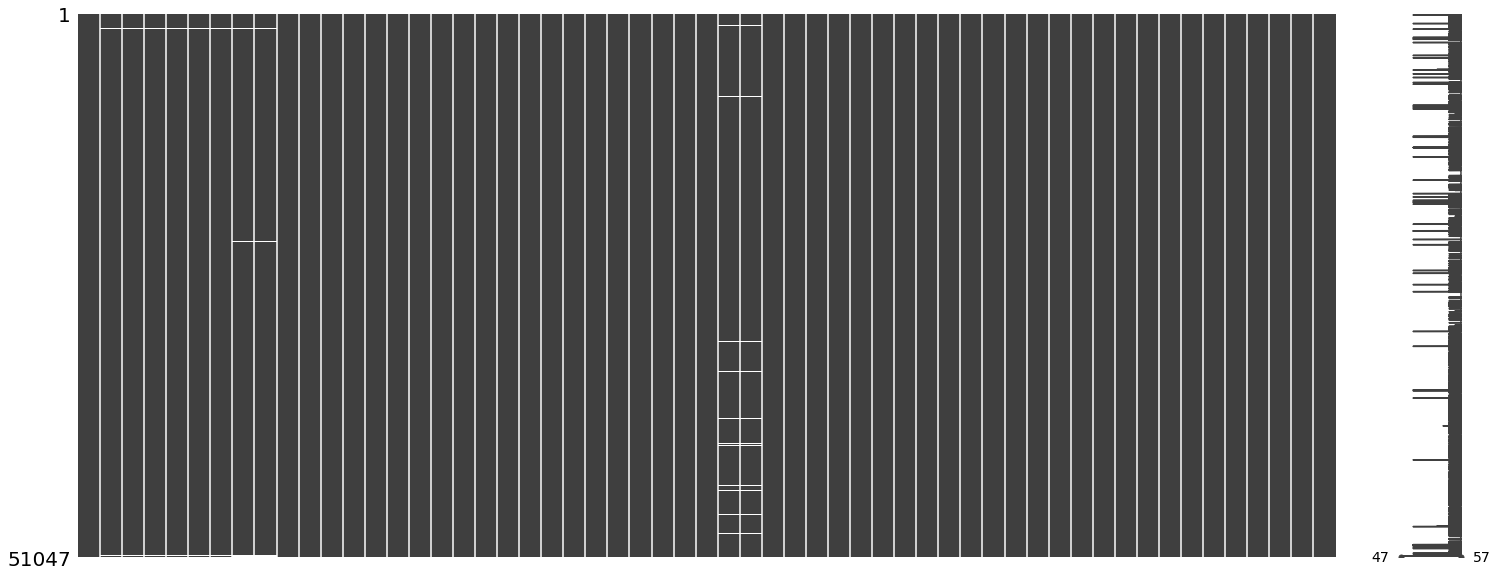

In [15]:
#Doing missing value analysis
missval(telchurn)

What analysis do you want to do? (missingval, totalmissingval, or correlation, dendogram)dendo


<AxesSubplot:>

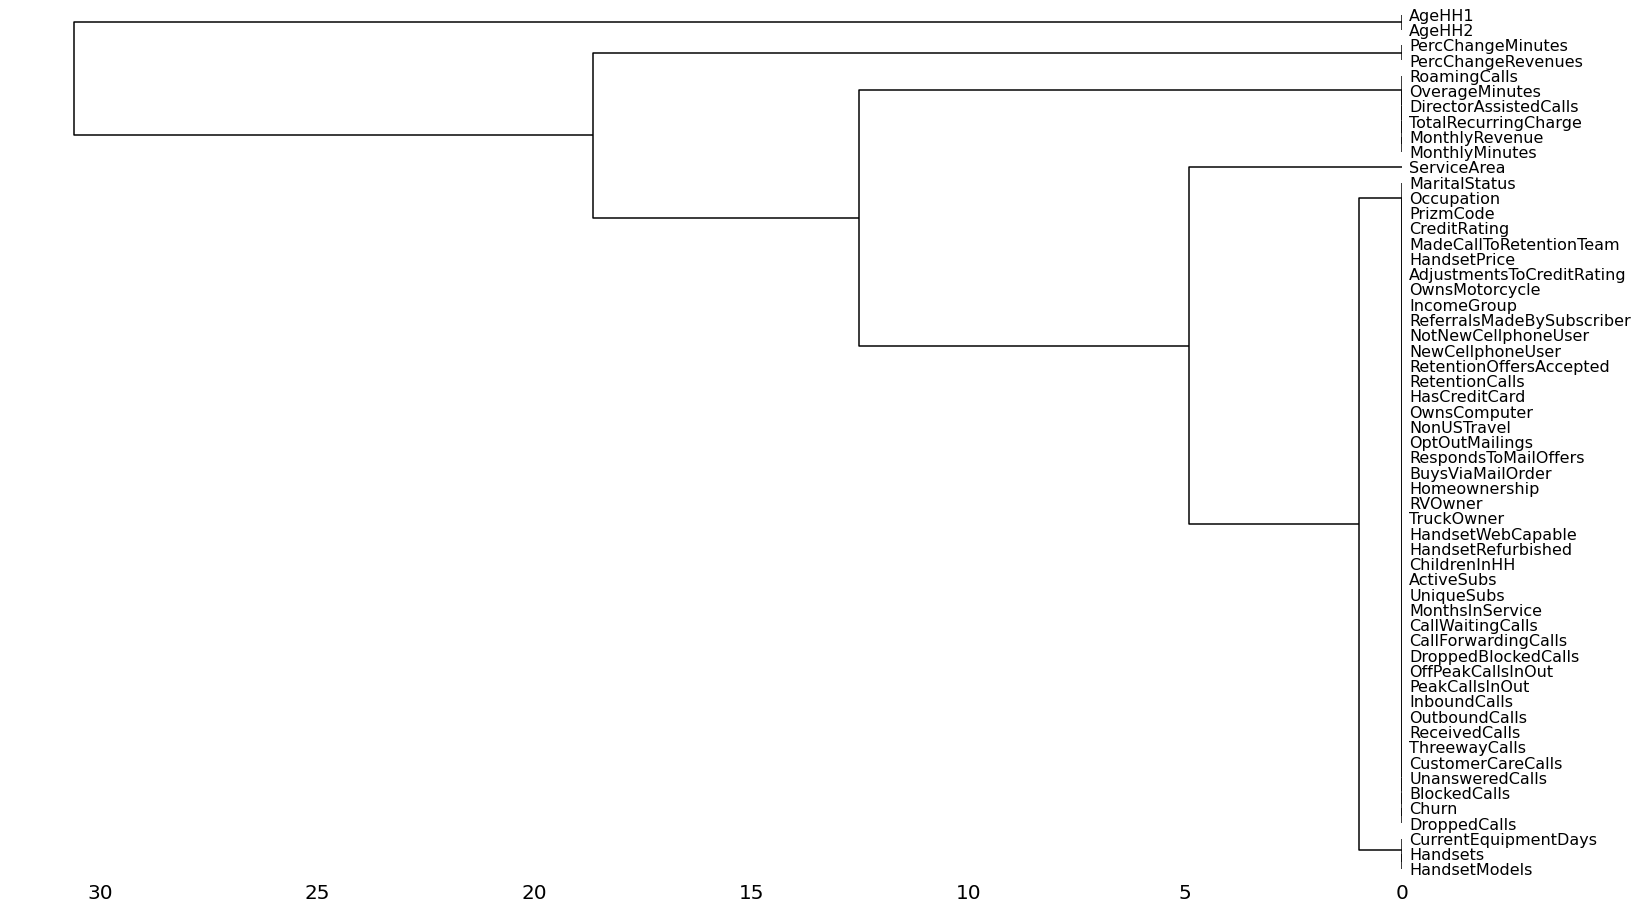

In [45]:
missval(telchurn)

## Columns with Clear Relationships with Regard to Null Values:

### 1. MonthlyRevenue, MonthlyMinutes, TotalRecurringCharge, DirectorAssistedCalls, OverageMinutes, RoamingCalls
#### All these columns seem to be representative of similar traits.

### 2. PercChangeMinutes, PercChangeRevenues
#### Obviously related columns. One can be exchanged for the other. 

### 3. AgeHH1, AgeHH2
#### Very obviously related columns too

#### Examining these groups in order of simplicity of relationship (3,2,1)

#### 3. AgeHH1, AgeHH2

In [66]:
null(telchurn[['AgeHH1','AgeHH2']])

AgeHH1    909
AgeHH2    909
dtype: int64

In [68]:
909/len(telchurn)*100
#The number of null values in the columns AgeHH1 and AgeHH2 comprise less than 5% of the dataset. Since they represent
#ages of different household members, they can't be interpolated. They can be deleted.

1.7807118929613885

In [16]:
telchurn=telchurn.dropna(subset=['AgeHH1', 'AgeHH2'])

In [17]:
telchurn

Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0       Yes           24.00           219.0                  22.0   
1       Yes           16.99            10.0                  17.0   
2        No           38.00             8.0                  38.0   
3        No           82.28          1312.0                  75.0   
4       Yes           17.14             0.0                  17.0   
...     ...             ...             ...                   ...   
51042   Yes             NaN             NaN                   NaN   
51043    No           95.17          1745.0                  85.0   
51044   Yes             NaN             NaN                   NaN   
51045    No             NaN             NaN                   NaN   
51046    No             NaN             NaN                   NaN   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                       0.25             0.0           0.0             -157.0   
1                       0.00             0.0           0.0               -4.0   
2                       0.00             0.0           0.0               -2.0   
3                       1.24             0.0           0.0              157.0   
4                       0.00             0.0           0.0                0.0   
...                      ...             ...           ...                ...   
51042                    NaN             NaN           NaN                NaN   
51043                   0.99            45.0           4.7              122.0   
51044                    NaN             NaN           NaN                NaN   
51045                    NaN             NaN           NaN                NaN   
51046                    NaN             NaN           NaN                NaN   

       PercChangeRevenues  DroppedCalls  ...  ReferralsMadeBySubscriber  \
0                   -19.0           0.7  ...                          0   
1                     0.0           0.3  ...                          0   
2                     0.0           0.0  ...                          0   
3                     8.1          52.0  ...                          0   
4                    -0.2           0.0  ...                          0   
...                   ...           ...  ...                        ...   
51042                 NaN           9.3  ...                          0   
51043                15.9          16.7  ...                          0   
51044                 NaN          71.7  ...                          0   
51045                 NaN           0.0  ...                          0   
51046                 NaN          18.7  ...                          0   

       IncomeGroup  OwnsMotorcycle  AdjustmentsToCreditRating  HandsetPrice  \
0                4              No                          0            30   
1                5              No                          0            30   
2                6              No                          0       Unknown   
3                6              No                          0            10   
4                9              No                          1            10   
...            ...             ...                        ...           ...   
51042            6              No                          0            60   
51043            9              No                          1            60   
51044            7              No                          1            80   
51045            9              No                          0            30   
51046            0              No                          1            60   

       MadeCallToRetentionTeam  CreditRating  PrizmCode    Occupation  \
0                          Yes     1-Highest   Suburban  Professional   
1                           No      4-Medium   Suburban  Professional   
2                           No        3-Good       Town        Crafts   
3                           No      4-Medium      Other       

#### 2. PercChangeMinutes, PercChangeRevenues

In [96]:
telchurn[['PercChangeMinutes', 'PercChangeRevenues']]

PercChangeMinutes  PercChangeRevenues
0                 -157.0               -19.0
1                   -4.0                 0.0
2                   -2.0                 0.0
3                  157.0                 8.1
4                    0.0                -0.2
...                  ...                 ...
51042                NaN                 NaN
51043              122.0                15.9
51044                NaN                 NaN
51045                NaN                 NaN
51046                NaN                 NaN

[50138 rows x 2 columns]

In [92]:
telchurn[telchurn['PercChangeMinutes'].isnull()]

Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
91       No           96.04           545.0                  60.0   
122     Yes             NaN             NaN                   NaN   
126     Yes             NaN             NaN                   NaN   
461      No           52.85           662.0                  57.0   
641     Yes            5.00             0.0                   0.0   
...     ...             ...             ...                   ...   
51038    No             NaN             NaN                   NaN   
51042   Yes             NaN             NaN                   NaN   
51044   Yes             NaN             NaN                   NaN   
51045    No             NaN             NaN                   NaN   
51046    No             NaN             NaN                   NaN   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
91                      0.66           111.0           1.1                NaN   
122                      NaN             NaN           NaN                NaN   
126                      NaN             NaN           NaN                NaN   
461                     0.33             0.0           5.0                NaN   
641                     0.00             0.0           0.0                NaN   
...                      ...             ...           ...                ...   
51038                    NaN             NaN           NaN                NaN   
51042                    NaN             NaN           NaN                NaN   
51044                    NaN             NaN           NaN                NaN   
51045                    NaN             NaN           NaN                NaN   
51046                    NaN             NaN           NaN                NaN   

       PercChangeRevenues  DroppedCalls  ...  ReferralsMadeBySubscriber  \
91                    NaN           3.3  ...                          0   
122                   NaN           0.0  ...                          0   
126                   NaN           0.0  ...                          0   
461                   NaN           1.3  ...                          0   
641                   NaN           0.0  ...                          0   
...                   ...           ...  ...                        ...   
51038                 NaN           3.7  ...                          0   
51042                 NaN           9.3  ...                          0   
51044                 NaN          71.7  ...                          0   
51045                 NaN           0.0  ...                          0   
51046                 NaN          18.7  ...                          0   

       IncomeGroup  OwnsMotorcycle  AdjustmentsToCreditRating  HandsetPrice  \
91               0              No                          0            60   
122              5              No                          0            30   
126              1              No                          0            30   
461              6              No                          0           150   
641              9              No                          0       Unknown   
...            ...             ...                        ...           ...   
51038            7              No                          0            30   
51042            6              No                          0            60   
51044            7              No                          1            80   
51045            9              No                          0            30   
51046            0              No                          1            60   

       MadeCallToRetentionTeam  CreditRating  PrizmCode  Occupation  \
91                          No     1-Highest       Town       Other   
122                         No     1-Highest      Other       Other   
126                         No     1-Highest       Town       Other   
461                        Yes     1-Highest   Suburban       Other   

In [19]:
telchurn[telchurn['PercChangeRevenues'].isnull()]

Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
91       No           96.04           545.0                  60.0   
122     Yes             NaN             NaN                   NaN   
126     Yes             NaN             NaN                   NaN   
461      No           52.85           662.0                  57.0   
641     Yes            5.00             0.0                   0.0   
...     ...             ...             ...                   ...   
51038    No             NaN             NaN                   NaN   
51042   Yes             NaN             NaN                   NaN   
51044   Yes             NaN             NaN                   NaN   
51045    No             NaN             NaN                   NaN   
51046    No             NaN             NaN                   NaN   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
91                      0.66           111.0           1.1                NaN   
122                      NaN             NaN           NaN                NaN   
126                      NaN             NaN           NaN                NaN   
461                     0.33             0.0           5.0                NaN   
641                     0.00             0.0           0.0                NaN   
...                      ...             ...           ...                ...   
51038                    NaN             NaN           NaN                NaN   
51042                    NaN             NaN           NaN                NaN   
51044                    NaN             NaN           NaN                NaN   
51045                    NaN             NaN           NaN                NaN   
51046                    NaN             NaN           NaN                NaN   

       PercChangeRevenues  DroppedCalls  ...  ReferralsMadeBySubscriber  \
91                    NaN           3.3  ...                          0   
122                   NaN           0.0  ...                          0   
126                   NaN           0.0  ...                          0   
461                   NaN           1.3  ...                          0   
641                   NaN           0.0  ...                          0   
...                   ...           ...  ...                        ...   
51038                 NaN           3.7  ...                          0   
51042                 NaN           9.3  ...                          0   
51044                 NaN          71.7  ...                          0   
51045                 NaN           0.0  ...                          0   
51046                 NaN          18.7  ...                          0   

       IncomeGroup  OwnsMotorcycle  AdjustmentsToCreditRating  HandsetPrice  \
91               0              No                          0            60   
122              5              No                          0            30   
126              1              No                          0            30   
461              6              No                          0           150   
641              9              No                          0       Unknown   
...            ...             ...                        ...           ...   
51038            7              No                          0            30   
51042            6              No                          0            60   
51044            7              No                          1            80   
51045            9              No                          0            30   
51046            0              No                          1            60   

       MadeCallToRetentionTeam  CreditRating  PrizmCode  Occupation  \
91                          No     1-Highest       Town       Other   
122                         No     1-Highest      Other       Other   
126                         No     1-Highest       Town       Other   
461                        Yes     1-Highest   Suburban       Other   

In [21]:
361*100/len(telchurn)
#These two features have null values amounting to 0.72% of the entire dataset. They can be deleted. 

0.7200127647692369

In [22]:
telchurn=telchurn.dropna(subset=['PercChangeMinutes', 'PercChangeRevenues'])

In [23]:
telchurn

Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0       Yes           24.00           219.0                  22.0   
1       Yes           16.99            10.0                  17.0   
2        No           38.00             8.0                  38.0   
3        No           82.28          1312.0                  75.0   
4       Yes           17.14             0.0                  17.0   
...     ...             ...             ...                   ...   
51035    No            0.00            76.0                  30.0   
51037    No           31.92            63.0                  17.0   
51040    No           71.99           724.0                  70.0   
51041   Yes          117.49           384.0                  30.0   
51043    No           95.17          1745.0                  85.0   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                       0.25             0.0           0.0             -157.0   
1                       0.00             0.0           0.0               -4.0   
2                       0.00             0.0           0.0               -2.0   
3                       1.24             0.0           0.0              157.0   
4                       0.00             0.0           0.0                0.0   
...                      ...             ...           ...                ...   
51035                   0.00             0.0           0.0                0.0   
51037                   0.00            43.0           0.0              -38.0   
51040                   0.00             4.0           0.9              -40.0   
51041                   0.00           250.0           0.0                0.0   
51043                   0.99            45.0           4.7              122.0   

       PercChangeRevenues  DroppedCalls  ...  ReferralsMadeBySubscriber  \
0                   -19.0           0.7  ...                          0   
1                     0.0           0.3  ...                          0   
2                     0.0           0.0  ...                          0   
3                     8.1          52.0  ...                          0   
4                    -0.2           0.0  ...                          0   
...                   ...           ...  ...                        ...   
51035                 0.0           5.7  ...                          0   
51037               -13.2           0.7  ...                          0   
51040                -2.0          14.3  ...                          0   
51041                 0.0           4.0  ...                          0   
51043                15.9          16.7  ...                          0   

       IncomeGroup  OwnsMotorcycle  AdjustmentsToCreditRating  HandsetPrice  \
0                4              No                          0            30   
1                5              No                          0            30   
2                6              No                          0       Unknown   
3                6              No                          0            10   
4                9              No                          1            10   
...            ...             ...                        ...           ...   
51035            4              No                          0       Unknown   
51037            3              No                          0       Unknown   
51040            7              No                          0       Unknown   
51041            2              No                          0            30   
51043            9              No                          1            60   

       MadeCallToRetentionTeam  CreditRating  PrizmCode    Occupation  \
0                          Yes     1-Highest   Suburban  Professional   
1                           No      4-Medium   Suburban  Professional   
2                           No        3-Good       Town        Crafts   
3                           No      4-Medium      Other       

#### 1. MonthlyRevenue, MonthlyMinutes, TotalRecurringCharge, DirectorAssistedCalls, OverageMinutes, RoamingCalls

In [25]:
telchurn[['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls']]

MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0               24.00           219.0                  22.0   
1               16.99            10.0                  17.0   
2               38.00             8.0                  38.0   
3               82.28          1312.0                  75.0   
4               17.14             0.0                  17.0   
...               ...             ...                   ...   
51035            0.00            76.0                  30.0   
51037           31.92            63.0                  17.0   
51040           71.99           724.0                  70.0   
51041          117.49           384.0                  30.0   
51043           95.17          1745.0                  85.0   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  
0                       0.25             0.0           0.0  
1                       0.00             0.0           0.0  
2                       0.00             0.0           0.0  
3                       1.24             0.0           0.0  
4                       0.00             0.0           0.0  
...                      ...             ...           ...  
51035                   0.00             0.0           0.0  
51037                   0.00            43.0           0.0  
51040                   0.00             4.0           0.9  
51041                   0.00           250.0           0.0  
51043                   0.99            45.0           4.7  

[49777 rows x 6 columns]

In [26]:
telchurn[telchurn['MonthlyRevenue'].isnull()]
#It seems that removing null values from the 2nd and 3rd column groups has erased null values from the 1st column group.
#Checking

Empty DataFrame
Columns: [Churn, MonthlyRevenue, MonthlyMinutes, TotalRecurringCharge, DirectorAssistedCalls, OverageMinutes, RoamingCalls, PercChangeMinutes, PercChangeRevenues, DroppedCalls, BlockedCalls, UnansweredCalls, CustomerCareCalls, ThreewayCalls, ReceivedCalls, OutboundCalls, InboundCalls, PeakCallsInOut, OffPeakCallsInOut, DroppedBlockedCalls, CallForwardingCalls, CallWaitingCalls, MonthsInService, UniqueSubs, ActiveSubs, ServiceArea, Handsets, HandsetModels, CurrentEquipmentDays, AgeHH1, AgeHH2, ChildrenInHH, HandsetRefurbished, HandsetWebCapable, TruckOwner, RVOwner, Homeownership, BuysViaMailOrder, RespondsToMailOffers, OptOutMailings, NonUSTravel, OwnsComputer, HasCreditCard, RetentionCalls, RetentionOffersAccepted, NewCellphoneUser, NotNewCellphoneUser, ReferralsMadeBySubscriber, IncomeGroup, OwnsMotorcycle, AdjustmentsToCreditRating, HandsetPrice, MadeCallToRetentionTeam, CreditRating, PrizmCode, Occupation, MaritalStatus]
Index: []

[0 rows x 57 columns]

In [27]:
null(telchurn[['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls']])
#All columns in the first column group are now free of null values. 

MonthlyRevenue           0
MonthlyMinutes           0
TotalRecurringCharge     0
DirectorAssistedCalls    0
OverageMinutes           0
RoamingCalls             0
dtype: int64

In [28]:
#checking for null values remaining
null(telchurn)

Churn                         0
MonthlyRevenue                0
MonthlyMinutes                0
TotalRecurringCharge          0
DirectorAssistedCalls         0
OverageMinutes                0
RoamingCalls                  0
PercChangeMinutes             0
PercChangeRevenues            0
DroppedCalls                  0
BlockedCalls                  0
UnansweredCalls               0
CustomerCareCalls             0
ThreewayCalls                 0
ReceivedCalls                 0
OutboundCalls                 0
InboundCalls                  0
PeakCallsInOut                0
OffPeakCallsInOut             0
DroppedBlockedCalls           0
CallForwardingCalls           0
CallWaitingCalls              0
MonthsInService               0
UniqueSubs                    0
ActiveSubs                    0
ServiceArea                  24
Handsets                      1
HandsetModels                 1
CurrentEquipmentDays          1
AgeHH1                        0
AgeHH2                        0
Children

In [29]:
#The columns ServiceArea, Handsets and HandsetModels still have null values. Though they are very small in number. 
#They can be deleted.
telchurn=telchurn.dropna(subset=['ServiceArea','Handsets','HandsetModels'])

In [30]:
null(telchurn)
#all null values purged

Churn                        0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnansweredCalls              0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
DroppedBlockedCalls          0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
ServiceArea                  0
Handsets                     0
HandsetModels                0
CurrentEquipmentDays         0
AgeHH1                       0
AgeHH2                       0
ChildrenInHH                 0
HandsetR

In [32]:
description(telchurn,10)

The columns and rows of the dataset are (49752, 57)
The number of values in the dataset is 2835864
  Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0   Yes           24.00           219.0                  22.0   
1   Yes           16.99            10.0                  17.0   
2    No           38.00             8.0                  38.0   
3    No           82.28          1312.0                  75.0   
4   Yes           17.14             0.0                  17.0   
5    No           38.05           682.0                  52.0   
6    No           31.66            26.0                  30.0   
7    No           62.13            98.0                  66.0   
8    No           35.30            24.0                  35.0   
9    No           81.00          1056.0                  75.0   

   DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                   0.25             0.0           0.0             -157.0   
1                   0.00       

MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
count    49752.000000    49752.000000          49752.000000   
mean        58.717374      525.021466             46.834961   
std         44.317244      528.510155             23.759492   
min         -6.170000        0.000000             -6.000000   
25%         33.610000      158.000000             30.000000   
50%         48.380000      366.000000             45.000000   
75%         70.910000      722.000000             60.000000   
max       1223.380000     7359.000000            400.000000   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
count           49752.000000    49752.000000  49752.000000       49752.000000   
mean                0.891841       39.754040      1.226327         -11.656175   
std                 2.224725       96.091606      9.848360         255.858193   
min                 0.000000        0.000000      0.000000       -3875.000000   
25%                 0.000000        0.000000      0.000000         -83.000000   
50%                 0.250000        3.000000      0.000000          -5.000000   
75%                 0.990000       40.000000      0.300000          65.000000   
max               159.390000     4321.000000   1112.400000        5192.000000   

       PercChangeRevenues  DroppedCalls  BlockedCalls  ...      Handsets  \
count        49752.000000  49752.000000  49752.000000  ...  49752.000000   
mean            -1.175937      6.010556      4.077814  ...      1.805093   
std             39.392124      9.036653     10.836468  ...      1.330834   
min          -1107.700000      0.000000      0.000000  ...      1.000000   
25%             -7.000000      0.700000      0.000000  ...      1.000000   
50%             -0.300000      3.000000      1.000000  ...      1.000000   
75%              1.600000      7.700000      3.700000  ...      2.000000   
max           2483.500000    221.700000    324.700000  ...     24.000000   

       HandsetModels  CurrentEquipmentDays        AgeHH1        AgeHH2  \
count   49752.000000          49752.000000  49752.000000  49752.000000   
mean        1.558711            380.020843     31.338258     21.147592   
std         0.906256            252.290072     22.091593     23.926589   
min         1.000000             -5.000000      0.000000      0.000000   
25%         1.000000            205.000000      0.000000      0.000000   
50%         1.000000            330.000000     36.000000      0.000000   
75%         2.000000            515.000000     48.000000     42.000000   
max        15.000000           1812.000000     99.000000     99.000000   

       RetentionCalls  RetentionOffersAccepted  ReferralsMadeBySubscriber  \
count    49752.000000             49752.000000               49752.000000   
mean         0.035496                 0.018331                   0.051475   
std          0.201964                 0.142854                   0.266490   
min          0.000000                 0.000000                   0.000000   
25%          0.000000                 0.000000                   0.000000   
50%          0.000000                 0.000000                   0.000000   
75%          0.000000                 0.000000                   0.000000   
max          4.000000                 3.000000                  16.000000   

        IncomeGroup  AdjustmentsToCreditRating  
count  49752.000000               49752.000000  
mean       4.402677                   0.053686  
std        3.110498                   0.382677  
min        0.000000                   0.000000  
25%        1.000000                   0.000000  
50%        5.000000                   0.000000  
75%        7.000000                   0.000000  
max        9.000000                  25.000000  

[8 rows x 34 columns]

In [6]:
#extracting columns with object datatypes
stringcols = []
for i in range(len(telchurn.columns)):
    if telchurn[telchurn.columns[i]].dtype == 'O':
        stringcols.append(telchurn.columns[i])
    else:
        continue

In [7]:
stringcols

['Churn',
 'ServiceArea',
 'ChildrenInHH',
 'HandsetRefurbished',
 'HandsetWebCapable',
 'TruckOwner',
 'RVOwner',
 'Homeownership',
 'BuysViaMailOrder',
 'RespondsToMailOffers',
 'OptOutMailings',
 'NonUSTravel',
 'OwnsComputer',
 'HasCreditCard',
 'NewCellphoneUser',
 'NotNewCellphoneUser',
 'OwnsMotorcycle',
 'HandsetPrice',
 'MadeCallToRetentionTeam',
 'CreditRating',
 'PrizmCode',
 'Occupation',
 'MaritalStatus']

In [8]:
telchurn[stringcols]
#several of these are binary columns. Let's encode them. 

Churn ServiceArea ChildrenInHH HandsetRefurbished HandsetWebCapable  \
0       Yes   SEAPOR503           No                 No               Yes   
1       Yes   PITHOM412          Yes                 No                No   
2        No   MILMIL414          Yes                 No                No   
3        No   PITHOM412           No                 No               Yes   
4       Yes   OKCTUL918           No                 No                No   
...     ...         ...          ...                ...               ...   
49747    No   NEVELC619          Yes                 No               Yes   
49748    No   NEVENC760           No                 No               Yes   
49749    No   LAXVNY818           No                 No                No   
49750   Yes   LAXDOW562           No                 No               Yes   
49751    No   LAXCDG310          Yes                 No               Yes   

      TruckOwner RVOwner Homeownership BuysViaMailOrder RespondsToMailOffers  \
0             No      No         Known              Yes                  Yes   
1             No      No         Known              Yes                  Yes   
2             No      No       Unknown               No                   No   
3             No      No         Known              Yes                  Yes   
4             No      No         Known              Yes                  Yes   
...          ...     ...           ...              ...                  ...   
49747         No      No         Known               No                   No   
49748         No      No         Known              Yes                  Yes   
49749         No      No         Known              Yes                  Yes   
49750         No      No         Known               No                   No   
49751         No      No         Known              Yes                  Yes   

       ... HasCreditCard NewCellphoneUser NotNewCellphoneUser OwnsMotorcycle  \
0      ...           Yes               No                  No             No   
1      ...           Yes              Yes                  No             No   
2      ...           Yes              Yes                  No             No   
3      ...           Yes              Yes                  No             No   
4      ...           Yes               No                 Yes             No   
...    ...           ...              ...                 ...            ...   
49747  ...           Yes               No                  No             No   
49748  ...           Yes               No                  No             No   
49749  ...           Yes               No                  No             No   
49750  ...           Yes               No                  No             No   
49751  ...           Yes               No                  No             No   

      HandsetPrice MadeCallToRetentionTeam CreditRating PrizmCode  \
0               30                     Yes    1-Highest  Suburban   
1               30                      No     4-Medium  Suburban   
2          Unknown                      No       3-Good      Town   
3               10                      No     4-Medium     Other   
4               10                      No    1-Highest     Other   
...            ...                     ...          ...       ...   
49747      Unknown                      No       2-High     Other   
49748      Unknown                      No       3-Good     Other   
49749      Unknown                      No    1-Highest     Other   
49750           30                      No        5-Low     Other   
49751           60                      No       3-Good     Other   

         Occupation MaritalStatus  
0      Professional            No  
1      Professional           Yes  
2            Crafts           Yes  
3             Other            No  
4      Professional           Yes  
...             ...           ...  
49747  Professional            No  
49748         Other           Yes  
49749 

In [9]:
telchurn[stringcols]=telchurn[stringcols].replace('Yes', 1)
telchurn[stringcols]=telchurn[stringcols].replace('No', 0)

In [10]:
telchurn[stringcols]

Churn ServiceArea  ChildrenInHH  HandsetRefurbished  HandsetWebCapable  \
0          1   SEAPOR503             0                   0                  1   
1          1   PITHOM412             1                   0                  0   
2          0   MILMIL414             1                   0                  0   
3          0   PITHOM412             0                   0                  1   
4          1   OKCTUL918             0                   0                  0   
...      ...         ...           ...                 ...                ...   
49747      0   NEVELC619             1                   0                  1   
49748      0   NEVENC760             0                   0                  1   
49749      0   LAXVNY818             0                   0                  0   
49750      1   LAXDOW562             0                   0                  1   
49751      0   LAXCDG310             1                   0                  1   

       TruckOwner  RVOwner Homeownership  BuysViaMailOrder  \
0               0        0         Known                 1   
1               0        0         Known                 1   
2               0        0       Unknown                 0   
3               0        0         Known                 1   
4               0        0         Known                 1   
...           ...      ...           ...               ...   
49747           0        0         Known                 0   
49748           0        0         Known                 1   
49749           0        0         Known                 1   
49750           0        0         Known                 0   
49751           0        0         Known                 1   

       RespondsToMailOffers  ...  HasCreditCard  NewCellphoneUser  \
0                         1  ...              1                 0   
1                         1  ...              1                 1   
2                         0  ...              1                 1   
3                         1  ...              1                 1   
4                         1  ...              1                 0   
...                     ...  ...            ...               ...   
49747                     0  ...              1                 0   
49748                     1  ...              1                 0   
49749                     1  ...              1                 0   
49750                     0  ...              1                 0   
49751                     1  ...              1                 0   

       NotNewCellphoneUser  OwnsMotorcycle  HandsetPrice  \
0                        0               0            30   
1                        0               0            30   
2                        0               0       Unknown   
3                        0               0            10   
4                        1               0            10   
...                    ...             ...           ...   
49747                    0               0       Unknown   
49748                    0               0       Unknown   
49749                    0               0       Unknown   
49750                    0               0            30   
49751                    0               0            60   

       MadeCallToRetentionTeam  CreditRating PrizmCode    Occupation  \
0                            1     1-Highest  Suburban  Professional   
1                            0      4-Medium  Suburban  Professional   
2                            0        3-Good      Town        Crafts   
3                            0      4-Medium     Other         Other   
4                            0     1-Highest     Other  Professional   
...                        ...           ...       ...           ...   
49747                        0        2-High     Other  Professional   
49748                        0        3-Good     Other         Other   
49749                        0     1-Highest     Other  Professional   
49750              

In [12]:
telchurn['ServiceArea'].value_counts()
#label encoding

NYCBRO917    1646
DALDAL214    1479
HOUHOU281    1471
NYCMAN917    1156
DALFTW817     771
             ... 
SANROM956       1
INDCRA765       1
SEWSUN509       1
ATLDBL478       1
NCRDNN910       1
Name: ServiceArea, Length: 743, dtype: int64

In [25]:
le = preprocessing.LabelEncoder()
le.fit(telchurn['ServiceArea'])
telchurn['ServiceArea'] = le.transform(telchurn['ServiceArea'])

In [26]:
telchurn['ServiceArea'].value_counts()

456    1646
129    1479
227    1471
462    1156
132     771
       ... 
629       1
237       1
671       1
65        1
364       1
Name: ServiceArea, Length: 743, dtype: int64

In [27]:
telchurn[stringcols]

Churn  ServiceArea  ChildrenInHH  HandsetRefurbished  \
0          1          655             0                   0   
1          1          607             1                   0   
2          0          349             1                   0   
3          0          607             0                   0   
4          1          560             0                   0   
...      ...          ...           ...                 ...   
49747      0          400             1                   0   
49748      0          401             0                   0   
49749      0          315             0                   0   
49750      1          290             0                   0   
49751      0          286             1                   0   

       HandsetWebCapable  TruckOwner  RVOwner Homeownership  BuysViaMailOrder  \
0                      1           0        0         Known                 1   
1                      0           0        0         Known                 1   
2                      0           0        0       Unknown                 0   
3                      1           0        0         Known                 1   
4                      0           0        0         Known                 1   
...                  ...         ...      ...           ...               ...   
49747                  1           0        0         Known                 0   
49748                  1           0        0         Known                 1   
49749                  0           0        0         Known                 1   
49750                  1           0        0         Known                 0   
49751                  1           0        0         Known                 1   

       RespondsToMailOffers  ...  HasCreditCard  NewCellphoneUser  \
0                         1  ...              1                 0   
1                         1  ...              1                 1   
2                         0  ...              1                 1   
3                         1  ...              1                 1   
4                         1  ...              1                 0   
...                     ...  ...            ...               ...   
49747                     0  ...              1                 0   
49748                     1  ...              1                 0   
49749                     1  ...              1                 0   
49750                     0  ...              1                 0   
49751                     1  ...              1                 0   

       NotNewCellphoneUser  OwnsMotorcycle  HandsetPrice  \
0                        0               0            30   
1                        0               0            30   
2                        0               0       Unknown   
3                        0               0            10   
4                        1               0            10   
...                    ...             ...           ...   
49747                    0               0       Unknown   
49748                    0               0       Unknown   
49749                    0               0       Unknown   
49750                    0               0            30   
49751                    0               0            60   

       MadeCallToRetentionTeam  CreditRating PrizmCode    Occupation  \
0                            1     1-Highest  Suburban  Professional   
1                            0      4-Medium  Suburban  Professional   
2                            0        3-Good      Town        Crafts   
3                            0      4-Medium     Other         Other   
4                            0     1-Highest     Other  Professional   
...                        ...           ...       ...           ...   
49747                        0        2-High     Other  Professional   
49748                        0        3-Good     Other         Other   
49749                        0     1-Highest     Other  Professional   
49750  

In [28]:
#extracting remaining columns with object datatypes
stringcols = []
for i in range(len(telchurn.columns)):
    if telchurn[telchurn.columns[i]].dtype == 'O':
        stringcols.append(telchurn.columns[i])
    else:
        continue

In [29]:
stringcols

['Homeownership',
 'HandsetPrice',
 'CreditRating',
 'PrizmCode',
 'Occupation',
 'MaritalStatus']

In [30]:
telchurn[stringcols]

Homeownership HandsetPrice CreditRating PrizmCode    Occupation  \
0             Known           30    1-Highest  Suburban  Professional   
1             Known           30     4-Medium  Suburban  Professional   
2           Unknown      Unknown       3-Good      Town        Crafts   
3             Known           10     4-Medium     Other         Other   
4             Known           10    1-Highest     Other  Professional   
...             ...          ...          ...       ...           ...   
49747         Known      Unknown       2-High     Other  Professional   
49748         Known      Unknown       3-Good     Other         Other   
49749         Known      Unknown    1-Highest     Other  Professional   
49750         Known           30        5-Low     Other  Professional   
49751         Known           60       3-Good     Other         Other   

      MaritalStatus  
0                 0  
1                 1  
2                 1  
3                 0  
4                 1  
...             ...  
49747             0  
49748             1  
49749       Unknown  
49750             1  
49751             0  

[49752 rows x 6 columns]

In [32]:
#encoding columns
#1. Homeownership
telchurn['Homeownership'].value_counts()

Known      33725
Unknown    16027
Name: Homeownership, dtype: int64

In [33]:
telchurn['Homeownership']=telchurn['Homeownership'].replace('Known', 1)
telchurn['Homeownership']=telchurn['Homeownership'].replace('Unknown', 0)

In [34]:
telchurn['Homeownership'].value_counts()

1    33725
0    16027
Name: Homeownership, dtype: int64

In [35]:
#2. HandsetPrice
telchurn['HandsetPrice'].value_counts()
#Too many unknown values in the HandsetPrice column to deleted or average out. At this point, perhaps deleting the 
#column is the best course of action. 

Unknown    28263
30          7147
150         4024
130         2043
80          1901
10          1869
60          1730
200         1227
100         1209
40           240
400           45
250           20
300           12
180            9
500            7
240            6
Name: HandsetPrice, dtype: int64

In [36]:
telchurn = remcol(telchurn)

which column do you want to remove?
HandsetPrice
which column do you want to remove?



In [38]:
#3. CreditRating
telchurn['CreditRating'].value_counts()

2-High       18692
1-Highest     8368
3-Good        8221
5-Low         6320
4-Medium      5227
7-Lowest      2049
6-VeryLow      875
Name: CreditRating, dtype: int64

In [39]:
telchurn['CreditRating']=telchurn['CreditRating'].replace('2-High', 2)
telchurn['CreditRating']=telchurn['CreditRating'].replace('1-Highest', 1)
telchurn['CreditRating']=telchurn['CreditRating'].replace('3-Good', 3)
telchurn['CreditRating']=telchurn['CreditRating'].replace('5-Low', 5)
telchurn['CreditRating']=telchurn['CreditRating'].replace('4-Medium', 4)
telchurn['CreditRating']=telchurn['CreditRating'].replace('7-Lowest', 7)
telchurn['CreditRating']=telchurn['CreditRating'].replace('6-VeryLow', 6)

In [42]:
#extracting remaining columns with object datatypes
stringcols = []
for i in range(len(telchurn.columns)):
    if telchurn[telchurn.columns[i]].dtype == 'O':
        stringcols.append(telchurn.columns[i])
    else:
        continue
telchurn[stringcols]

PrizmCode    Occupation MaritalStatus
0      Suburban  Professional             0
1      Suburban  Professional             1
2          Town        Crafts             1
3         Other         Other             0
4         Other  Professional             1
...         ...           ...           ...
49747     Other  Professional             0
49748     Other         Other             1
49749     Other  Professional       Unknown
49750     Other  Professional             1
49751     Other         Other             0

[49752 rows x 3 columns]

In [43]:
# 4. PrizmCode
telchurn['PrizmCode'].value_counts()

Other       23820
Suburban    16049
Town         7494
Rural        2389
Name: PrizmCode, dtype: int64

In [44]:
le = preprocessing.LabelEncoder()
le.fit(telchurn['PrizmCode'])
telchurn['PrizmCode'] = le.transform(telchurn['PrizmCode'])

In [45]:
telchurn['PrizmCode'].value_counts()

0    23820
2    16049
3     7494
1     2389
Name: PrizmCode, dtype: int64

In [46]:
# 5. Occupation
telchurn['Occupation'].value_counts()

Other           36453
Professional     8681
Crafts           1507
Clerical          979
Self              872
Retired           726
Student           377
Homemaker         157
Name: Occupation, dtype: int64

In [47]:
le = preprocessing.LabelEncoder()
le.fit(telchurn['Occupation'])
telchurn['Occupation'] = le.transform(telchurn['Occupation'])

In [48]:
telchurn['Occupation'].value_counts()

3    36453
4     8681
1     1507
0      979
6      872
5      726
7      377
2      157
Name: Occupation, dtype: int64

In [50]:
# 6. MaritalStatus
telchurn['MaritalStatus'].value_counts()

Unknown    18649
1          18506
0          12597
Name: MaritalStatus, dtype: int64

In [51]:
telchurn['MaritalStatus']=telchurn['MaritalStatus'].replace('Unknown', 2)

In [52]:
telchurn['MaritalStatus'].value_counts()

2    18649
1    18506
0    12597
Name: MaritalStatus, dtype: int64

In [55]:
#extracting remaining columns with object datatypes
stringcols = []
for i in range(len(telchurn.columns)):
    if telchurn[telchurn.columns[i]].dtype == 'O':
        stringcols.append(telchurn.columns[i])
    else:
        continue
stringcols

[]

In [58]:
telchurn = changedtype(telchurn)

which column do you want to change the data type for? Press enter if you want to change the data type for the entire dataset. 
what data type do you want to set the column to? (string, numbers, datetime)float


In [59]:
description(telchurn,10)
#All columns are now float data types

The columns and rows of the dataset are (49752, 56)
The number of values in the dataset is 2786112
   Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0    1.0           24.00           219.0                  22.0   
1    1.0           16.99            10.0                  17.0   
2    0.0           38.00             8.0                  38.0   
3    0.0           82.28          1312.0                  75.0   
4    1.0           17.14             0.0                  17.0   
5    0.0           38.05           682.0                  52.0   
6    0.0           31.66            26.0                  30.0   
7    0.0           62.13            98.0                  66.0   
8    0.0           35.30            24.0                  35.0   
9    0.0           81.00          1056.0                  75.0   

   DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                   0.25             0.0           0.0             -157.0   
1                   

Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
count  49752.000000    49752.000000    49752.000000          49752.000000   
mean       0.286320       58.717374      525.021466             46.834961   
std        0.452045       44.317244      528.510155             23.759492   
min        0.000000       -6.170000        0.000000             -6.000000   
25%        0.000000       33.610000      158.000000             30.000000   
50%        0.000000       48.380000      366.000000             45.000000   
75%        1.000000       70.910000      722.000000             60.000000   
max        1.000000     1223.380000     7359.000000            400.000000   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
count           49752.000000    49752.000000  49752.000000       49752.000000   
mean                0.891841       39.754040      1.226327         -11.656175   
std                 2.224725       96.091606      9.848360         255.858193   
min                 0.000000        0.000000      0.000000       -3875.000000   
25%                 0.000000        0.000000      0.000000         -83.000000   
50%                 0.250000        3.000000      0.000000          -5.000000   
75%                 0.990000       40.000000      0.300000          65.000000   
max               159.390000     4321.000000   1112.400000        5192.000000   

       PercChangeRevenues  DroppedCalls  ...  NotNewCellphoneUser  \
count        49752.000000  49752.000000  ...         49752.000000   
mean            -1.175937      6.010556  ...             0.138185   
std             39.392124      9.036653  ...             0.345098   
min          -1107.700000      0.000000  ...             0.000000   
25%             -7.000000      0.700000  ...             0.000000   
50%             -0.300000      3.000000  ...             0.000000   
75%              1.600000      7.700000  ...             0.000000   
max           2483.500000    221.700000  ...             1.000000   

       ReferralsMadeBySubscriber   IncomeGroup  OwnsMotorcycle  \
count               49752.000000  49752.000000    49752.000000   
mean                    0.051475      4.402677        0.013547   
std                     0.266490      3.110498        0.115602   
min                     0.000000      0.000000        0.000000   
25%                     0.000000      1.000000        0.000000   
50%                     0.000000      5.000000        0.000000   
75%                     0.000000      7.000000        0.000000   
max                    16.000000      9.000000        1.000000   

       AdjustmentsToCreditRating  MadeCallToRetentionTeam  CreditRating  \
count               49752.000000             49752.000000  49752.000000   
mean                    0.053686                 0.032582      2.864528   
std                     0.382677                 0.177541      1.568627   
min                     0.000000                 0.000000      1.000000   
25%                     0.000000                 0.000000      2.000000   
50%                     0.000000                 0.000000      2.000000   
75%                     0.000000                 0.000000      4.000000   
max                    25.000000                 1.000000      7.000000   

          PrizmCode    Occupation  MaritalStatus  
count  49752.000000  49752.000000   49752.000000  
mean       1.145059      3.163792       1.121643  
std        1.175946      0.886815       0.783103  
min        0.000000      0.000000       0.000000  
25%        0.000000      3.000000       0.000000  
50%        1.000000      3.000000       1.000000  
75%        2.000000      3.000000       2.000000  
max        3.000000      7.000000       2.000000  

[8 rows x 56 columns]

In [81]:
telchurn.to_csv('telchurn.csv')

In [108]:
#Checking for class imbalance in the label column
telchurn['Churn'].value_counts()
#There appears to be a 70/30 split between the class labels. While this is a class imbalance, it's not too big a gulf
#to overcome. We may employ Over and Undersampling techniques if there seems to be a low F-Score for classification. 

0.0    35507
1.0    14245
Name: Churn, dtype: int64

### Applying DR and FS Techniques
#### 1. Linear Discriminant Analysis
#### 2. Principle Component Analysis
#### 3. t-SNE
#### 4. Lasso Regularization
#### 5. Random Forest Feature Selection

In [94]:
telchurnLDA = lda(telchurn)

What is the label column?Churn


In [95]:
telchurnLDA

0         1  label
0     -0.633395 -2.339640    1.0
1     -1.570059  0.695924    1.0
2     -0.139274  1.018966    0.0
3      0.302540 -2.047163    0.0
4     -1.721270  0.687252    1.0
...         ...       ...    ...
49747 -1.275100  0.384182    0.0
49748 -0.285601 -2.537097    0.0
49749 -1.401375  0.698507    0.0
49750  0.756018 -2.099825    1.0
49751 -1.960336  0.584491    0.0

[49752 rows x 3 columns]

In [83]:
telchurnpca = pca(telchurn, 5)

What is the label column?Churn


In [84]:
telchurnpca

0           1            2           3           4  label
0      -299.866098 -138.948066   -81.832961  311.345992   44.896095    1.0
1      -723.336000 -173.857819  1011.730857  221.302515    6.636425    1.0
2      -774.177135 -227.353270  1301.029626  -46.855245    6.017168    0.0
3       847.081207  151.608251   251.966709  250.094012   50.564827    0.0
4      -625.093679  -63.906925   376.000731  196.322580   16.795986    1.0
...            ...         ...          ...         ...         ...    ...
49747  -549.952383  -72.204158   412.616506   35.144190   15.419264    0.0
49748  -557.043740 -110.559804   406.290335   37.160920   22.631083    0.0
49749   105.292276 -108.580266   513.705649  -51.451510  -74.360428    0.0
49750  -149.985573   -6.525436    88.997015  -63.137208    5.179910    1.0
49751  1314.322380  107.376329   327.371102  -72.556752  194.846444    0.0

[49752 rows x 6 columns]

In [99]:
telchurntsne = tdsne(telchurn,3)

What is the label column?Churn


In [100]:
telchurntsne

0          1          2  label
0      11.567299   7.428953  -3.782017    1.0
1      -6.943978  18.960115  -4.242476    1.0
2     -12.012587  17.006649  -2.400198    0.0
3      -2.537655  -7.139232 -17.391615    0.0
4       1.446588  20.358425   0.540458    1.0
...          ...        ...        ...    ...
49747  -3.977961  16.896042   6.738950    0.0
49748  -3.249629  17.354023   6.973358    0.0
49749  -8.324872   6.058073  -0.780631    0.0
49750   1.973135   2.466774   5.789379    1.0
49751 -15.520068  -6.542323 -16.522793    0.0

[49752 rows x 4 columns]

In [102]:
telchurnlasso = lasso(telchurn)

What is the label columnChurn
What is the label column?Churn


In [103]:
telchurnlasso

0       1       2     3     4      5    6      7     8     9  ...  \
0      1.0   24.00   219.0  22.0  0.25    0.0  0.0 -157.0 -19.0   0.7  ...   
1      1.0   16.99    10.0  17.0  0.00    0.0  0.0   -4.0   0.0   0.3  ...   
2      0.0   38.00     8.0  38.0  0.00    0.0  0.0   -2.0   0.0   0.0  ...   
3      0.0   82.28  1312.0  75.0  1.24    0.0  0.0  157.0   8.1  52.0  ...   
4      1.0   17.14     0.0  17.0  0.00    0.0  0.0    0.0  -0.2   0.0  ...   
...    ...     ...     ...   ...   ...    ...  ...    ...   ...   ...  ...   
49747  0.0    0.00    76.0  30.0  0.00    0.0  0.0    0.0   0.0   5.7  ...   
49748  0.0   31.92    63.0  17.0  0.00   43.0  0.0  -38.0 -13.2   0.7  ...   
49749  0.0   71.99   724.0  70.0  0.00    4.0  0.9  -40.0  -2.0  14.3  ...   
49750  1.0  117.49   384.0  30.0  0.00  250.0  0.0    0.0   0.0   4.0  ...   
49751  0.0   95.17  1745.0  85.0  0.99   45.0  4.7  122.0  15.9  16.7  ...   

        46   47   48   49   50   51   52   53   54  label  
0      0.0  0.0  4.0  0.0  0.0  1.0  1.0  2.0  4.0    1.0  
1      0.0  0.0  5.0  0.0  0.0  0.0  4.0  2.0  4.0    1.0  
2      0.0  0.0  6.0  0.0  0.0  0.0  3.0  3.0  1.0    0.0  
3      0.0  0.0  6.0  0.0  0.0  0.0  4.0  0.0  3.0    0.0  
4      1.0  0.0  9.0  0.0  1.0  0.0  1.0  0.0  4.0    1.0  
...    ...  ...  ...  ...  ...  ...  ...  ...  ...    ...  
49747  0.0  0.0  4.0  0.0  0.0  0.0  2.0  0.0  4.0    0.0  
49748  0.0  0.0  3.0  0.0  0.0  0.0  3.0  0.0  3.0    0.0  
49749  0.0  0.0  7.0  0.0  0.0  0.0  1.0  0.0  4.0    0.0  
49750  0.0  0.0  2.0  0.0  0.0  0.0  5.0  0.0  4.0    1.0  
49751  0.0  0.0  9.0  0.0  1.0  0.0  3.0  0.0  3.0    0.0  

[49752 rows x 56 columns]

In [104]:
telchurnrfs = RFSelector(telchurn)

What is the label columnChurn
What is the label column?Churn


In [105]:
telchurnrfs

0       1       2     3     4      5    6      7     8     9  ...  \
0      1.0   24.00   219.0  22.0  0.25    0.0  0.0 -157.0 -19.0   0.7  ...   
1      1.0   16.99    10.0  17.0  0.00    0.0  0.0   -4.0   0.0   0.3  ...   
2      0.0   38.00     8.0  38.0  0.00    0.0  0.0   -2.0   0.0   0.0  ...   
3      0.0   82.28  1312.0  75.0  1.24    0.0  0.0  157.0   8.1  52.0  ...   
4      1.0   17.14     0.0  17.0  0.00    0.0  0.0    0.0  -0.2   0.0  ...   
...    ...     ...     ...   ...   ...    ...  ...    ...   ...   ...  ...   
49747  0.0    0.00    76.0  30.0  0.00    0.0  0.0    0.0   0.0   5.7  ...   
49748  0.0   31.92    63.0  17.0  0.00   43.0  0.0  -38.0 -13.2   0.7  ...   
49749  0.0   71.99   724.0  70.0  0.00    4.0  0.9  -40.0  -2.0  14.3  ...   
49750  1.0  117.49   384.0  30.0  0.00  250.0  0.0    0.0   0.0   4.0  ...   
49751  0.0   95.17  1745.0  85.0  0.99   45.0  4.7  122.0  15.9  16.7  ...   

          16     17    18   19   20      21    22   23   24  label  
0       58.0   24.0   0.3  1.0  2.0   361.0  62.0  0.0  1.0    1.0  
1        5.0    1.0   0.0  1.0  1.0  1504.0  40.0  0.0  0.0    1.0  
2        1.3    3.7   0.0  1.0  1.0  1812.0  26.0  0.0  0.0    0.0  
3      555.7  303.7  22.7  2.0  4.0   458.0  30.0  0.0  0.0    0.0  
4        0.0    0.0   0.0  2.0  3.0   852.0  46.0  0.0  0.0    1.0  
...      ...    ...   ...  ...  ...     ...   ...  ...  ...    ...  
49747   29.3   17.0   0.0  1.0  1.0   883.0  48.0  0.0  0.0    0.0  
49748   16.0   14.7   0.3  1.0  1.0   883.0  58.0  0.0  0.0    0.0  
49749  262.0   12.7   0.7  1.0  1.0   882.0  50.0  0.0  0.0    0.0  
49750   99.3   54.3   0.0  1.0  2.0   489.0  22.0  0.0  0.0    1.0  
49751  318.7  248.3  14.3  1.0  2.0   464.0  48.0  0.0  0.0    0.0  

[49752 rows x 26 columns]

In [101]:
#Saving DR and FS datasets
telchurnLDA.to_csv('telchurnlda.csv')
telchurnpca.to_csv('telchurnpca.csv')
telchurntsne.to_csv('telchurntsne.csv')
telchurnrfs.to_csv('telchurnrfs.csv')
telchurnlasso.to_csv('telchurnlasso.csv')

## Splitting Datasets for Training and Testing

In [111]:
ldatrainX,ldatestX,ldatrainY,ldatestY=splitting(telchurnLDA)

What is the label columnlabel


In [114]:
pcatrainX,pcatestX,pcatrainY,pcatestY=splitting(telchurnpca)

What is the label columnlabel


In [115]:
tsnetrainX,tsnetestX,tsnetrainY,tsnetestY=splitting(telchurntsne)

What is the label columnlabel


In [116]:
rfstrainX,rfstestX,rfstrainY,rfstestY=splitting(telchurnrfs)

What is the label columnlabel


In [117]:
lassotrainX,lassotestX,lassotrainY,lassotestY=splitting(telchurnlasso)

What is the label columnlabel


## Applying Classification Algorithms on all DR & FS Datasets 

### 1. Random Forest Algorithm: RandFor
### 2. XGBoost Algorithm: boostaway
### 3. SVM Algorithm: supvec
### 4. Logistic Regression Algorithm: LogisticRegression

## LDA Dataset

In [112]:
RandFor(ldatrainX,ldatestX,ldatrainY,ldatestY)

These are the predicted values:  [0. 0. 0. ... 0. 0. 0.]
The Confusion Matrix is
 [[10046  1594]
 [ 3794   985]]
The Accuracy Score is
 67.18435958340947
The Precision is 55.38990165117546
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.73      0.86      0.79     11640
         1.0       0.38      0.21      0.27      4779

    accuracy                           0.67     16419
   macro avg       0.55      0.53      0.53     16419
weighted avg       0.63      0.67      0.64     16419

The LogLoss is 11.334198293080119
The Area Under the Curve is 0.5345842420555567
The Recall Score is 53.458424205555666
The Specificity is [0.         0.13694158 1.        ] and the Sensitivity is [0.         0.20611006 1.        ]
The F-Score is 0.2677357977711335


In [118]:
boostaway(ldatrainX,ldatestX,ldatrainY,ldatestY)

These are the predicted values:  [0. 0. 0. ... 0. 0. 0.]
The Confusion Matrix is
 [[11256   384]
 [ 4353   426]]
The Accuracy Score is
 71.14927827516901
The Precision is 62.35241776467993
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.72      0.97      0.83     11640
         1.0       0.53      0.09      0.15      4779

    accuracy                           0.71     16419
   macro avg       0.62      0.53      0.49     16419
weighted avg       0.66      0.71      0.63     16419

The LogLoss is 9.964704965473238
The Recall Score is 52.80751483617113
The F-Score is 0.15244229736983358


array([0., 0., 0., ..., 0., 0., 0.])

In [119]:
supvec(ldatrainX,ldatestX,ldatrainY,ldatestY)

Which kernel do you want to apply? (linear, rbf)rbf
Value of c?2
These are the predicted values:  [0. 0. 0. ... 0. 0. 0.]
The Confusion Matrix is
 [[11640     0]
 [ 4779     0]]
The Accuracy Score is
 70.89347706924904
The Precision is 35.44673853462452
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.71      1.00      0.83     11640
         1.0       0.00      0.00      0.00      4779

    accuracy                           0.71     16419
   macro avg       0.35      0.50      0.41     16419
weighted avg       0.50      0.71      0.59     16419

The LogLoss is 10.053036871385478
The Area Under the Curve is 0.5
The Recall Score is 50.0
The Specificity is [0. 1.] and the Sensitivity is [0. 1.]
The F-Score is 0.0


In [120]:
LogisticRegression(ldatrainX,ldatestX,ldatrainY,ldatestY)

These are the predicted values:  [0. 0. 0. ... 0. 0. 0.]
The Confusion Matrix is
 [[11640     0]
 [ 4779     0]]
The Accuracy Score is
 70.89347706924904
The Precision is 35.44673853462452
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.71      1.00      0.83     11640
         1.0       0.00      0.00      0.00      4779

    accuracy                           0.71     16419
   macro avg       0.35      0.50      0.41     16419
weighted avg       0.50      0.71      0.59     16419

The LogLoss is 10.053036871385478
The Area Under the Curve is 0.5
The Recall Score is 50.0
The Specificity is [0. 1.] and the Sensitivity is [0. 1.]
The F-Score is 0.0


## PCA Dataset

In [121]:
RandFor(pcatrainX,pcatestX,pcatrainY,pcatestY)

These are the predicted values:  [0. 0. 0. ... 0. 1. 0.]
The Confusion Matrix is
 [[11010   630]
 [ 4333   446]]
The Accuracy Score is
 69.77282416712346
The Precision is 56.60446125729205
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.72      0.95      0.82     11640
         1.0       0.41      0.09      0.15      4779

    accuracy                           0.70     16419
   macro avg       0.57      0.52      0.48     16419
weighted avg       0.63      0.70      0.62     16419

The LogLoss is 10.440127352111745
The Area Under the Curve is 0.5196006260206272
The Recall Score is 51.96006260206272
The Specificity is [0.         0.05412371 1.        ] and the Sensitivity is [0.         0.09332496 1.        ]
The F-Score is 0.15234842015371478


In [122]:
boostaway(pcatrainX,pcatestX,pcatrainY,pcatestY)

These are the predicted values:  [0. 0. 0. ... 0. 0. 0.]
The Confusion Matrix is
 [[11184   456]
 [ 4409   370]]
The Accuracy Score is
 70.36969364760338
The Precision is 58.25934031055409
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.72      0.96      0.82     11640
         1.0       0.45      0.08      0.13      4779

    accuracy                           0.70     16419
   macro avg       0.58      0.52      0.48     16419
weighted avg       0.64      0.70      0.62     16419

The LogLoss is 10.233967463162717
The Recall Score is 51.912339854561296
The F-Score is 0.13202497769848348


array([0., 0., 0., ..., 0., 0., 0.])

In [123]:
supvec(pcatrainX,pcatestX,pcatrainY,pcatestY)

Which kernel do you want to apply? (linear, rbf)rbf
Value of c?2
These are the predicted values:  [0. 0. 0. ... 0. 0. 0.]
The Confusion Matrix is
 [[11637     3]
 [ 4776     3]]
The Accuracy Score is
 70.89347706924904
The Precision is 60.450557484920495
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.71      1.00      0.83     11640
         1.0       0.50      0.00      0.00      4779

    accuracy                           0.71     16419
   macro avg       0.60      0.50      0.42     16419
weighted avg       0.65      0.71      0.59     16419

The LogLoss is 10.05303701748404
The Area Under the Curve is 0.5001850072158477
The Recall Score is 50.01850072158477
The Specificity is [0.00000000e+00 2.57731959e-04 1.00000000e+00] and the Sensitivity is [0.0000000e+00 6.2774639e-04 1.0000000e+00]
The F-Score is 0.0012539184952978057


In [124]:
LogisticRegression(pcatrainX,pcatestX,pcatrainY,pcatestY)

These are the predicted values:  [0. 0. 0. ... 0. 0. 0.]
The Confusion Matrix is
 [[11622    18]
 [ 4774     5]]
The Accuracy Score is
 70.81430050551191
The Precision is 46.31113633229737
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.71      1.00      0.83     11640
         1.0       0.22      0.00      0.00      4779

    accuracy                           0.71     16419
   macro avg       0.46      0.50      0.42     16419
weighted avg       0.57      0.71      0.59     16419

The LogLoss is 10.080384364283193
The Area Under the Curve is 0.49974992611575986
The Recall Score is 49.97499261157599
The Specificity is [0.         0.00154639 1.        ] and the Sensitivity is [0.         0.00104624 1.        ]
The F-Score is 0.0020824656393169513


## t-SNE Dataset

In [125]:
RandFor(tsnetrainX,tsnetestX,tsnetrainY,tsnetestY)

These are the predicted values:  [0. 0. 0. ... 0. 0. 0.]
The Confusion Matrix is
 [[10402  1238]
 [ 4060   719]]
The Accuracy Score is
 67.73250502466655
The Precision is 54.333167951222336
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.72      0.89      0.80     11640
         1.0       0.37      0.15      0.21      4779

    accuracy                           0.68     16419
   macro avg       0.54      0.52      0.51     16419
weighted avg       0.62      0.68      0.63     16419

The LogLoss is 11.144858227776075
The Area Under the Curve is 0.5220462482985053
The Recall Score is 52.20462482985053
The Specificity is [0.         0.10635739 1.        ] and the Sensitivity is [0.         0.15044988 1.        ]
The F-Score is 0.21347980997624705


In [126]:
boostaway(tsnetrainX,tsnetestX,tsnetrainY,tsnetestY)

These are the predicted values:  [0. 0. 0. ... 0. 0. 0.]
The Confusion Matrix is
 [[11373   267]
 [ 4586   193]]
The Accuracy Score is
 70.44277970643766
The Precision is 56.61019269486756
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.71      0.98      0.82     11640
         1.0       0.42      0.04      0.07      4779

    accuracy                           0.70     16419
   macro avg       0.57      0.51      0.45     16419
weighted avg       0.63      0.70      0.61     16419

The LogLoss is 10.208715228516683
The Recall Score is 50.872343672812534
The F-Score is 0.07367818285932431


array([0., 0., 0., ..., 0., 0., 0.])

In [127]:
supvec(tsnetrainX,tsnetestX,tsnetrainY,tsnetestY)

Which kernel do you want to apply? (linear, rbf)rbf
Value of c?2
These are the predicted values:  [0. 0. 0. ... 0. 0. 0.]
The Confusion Matrix is
 [[11640     0]
 [ 4779     0]]
The Accuracy Score is
 70.89347706924904
The Precision is 35.44673853462452
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.71      1.00      0.83     11640
         1.0       0.00      0.00      0.00      4779

    accuracy                           0.71     16419
   macro avg       0.35      0.50      0.41     16419
weighted avg       0.50      0.71      0.59     16419

The LogLoss is 10.053036871385478
The Area Under the Curve is 0.5
The Recall Score is 50.0
The Specificity is [0. 1.] and the Sensitivity is [0. 1.]
The F-Score is 0.0


In [128]:
LogisticRegression(tsnetrainX,tsnetestX,tsnetrainY,tsnetestY)

These are the predicted values:  [0. 0. 0. ... 0. 0. 0.]
The Confusion Matrix is
 [[11640     0]
 [ 4779     0]]
The Accuracy Score is
 70.89347706924904
The Precision is 35.44673853462452
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.71      1.00      0.83     11640
         1.0       0.00      0.00      0.00      4779

    accuracy                           0.71     16419
   macro avg       0.35      0.50      0.41     16419
weighted avg       0.50      0.71      0.59     16419

The LogLoss is 10.053036871385478
The Area Under the Curve is 0.5
The Recall Score is 50.0
The Specificity is [0. 1.] and the Sensitivity is [0. 1.]
The F-Score is 0.0


## Lasso Dataset

In [129]:
RandFor(lassotrainX,lassotestX,lassotrainY,lassotestY)

These are the predicted values:  [0. 1. 1. ... 1. 0. 0.]
The Confusion Matrix is
 [[11640     0]
 [    0  4779]]
The Accuracy Score is
 100.0
The Precision is 100.0
The Classification Report is
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11640
         1.0       1.00      1.00      1.00      4779

    accuracy                           1.00     16419
   macro avg       1.00      1.00      1.00     16419
weighted avg       1.00      1.00      1.00     16419

The LogLoss is 9.992007221626413e-16
The Area Under the Curve is 1.0
The Recall Score is 100.0
The Specificity is [0. 0. 1.] and the Sensitivity is [0. 1. 1.]
The F-Score is 1.0


In [130]:
boostaway(lassotrainX,lassotestX,lassotrainY,lassotestY)

These are the predicted values:  [0. 1. 1. ... 1. 0. 0.]
The Confusion Matrix is
 [[11640     0]
 [    0  4779]]
The Accuracy Score is
 100.0
The Precision is 100.0
The Classification Report is
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11640
         1.0       1.00      1.00      1.00      4779

    accuracy                           1.00     16419
   macro avg       1.00      1.00      1.00     16419
weighted avg       1.00      1.00      1.00     16419

The LogLoss is 9.992007221626413e-16
The Recall Score is 100.0
The F-Score is 1.0


array([0., 1., 1., ..., 1., 0., 0.])

In [131]:
supvec(lassotrainX,lassotestX,lassotrainY,lassotestY)

Which kernel do you want to apply? (linear, rbf)rbf
Value of c?2
These are the predicted values:  [0. 0. 0. ... 0. 0. 0.]
The Confusion Matrix is
 [[11639     1]
 [ 4777     2]]
The Accuracy Score is
 70.8995675741519
The Precision is 68.78350389863547
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.71      1.00      0.83     11640
         1.0       0.67      0.00      0.00      4779

    accuracy                           0.71     16419
   macro avg       0.69      0.50      0.42     16419
weighted avg       0.70      0.71      0.59     16419

The LogLoss is 10.050933334215278
The Area Under the Curve is 0.5001662934703589
The Recall Score is 50.01662934703589
The Specificity is [0.00000000e+00 8.59106529e-05 1.00000000e+00] and the Sensitivity is [0.00000000e+00 4.18497594e-04 1.00000000e+00]
The F-Score is 0.0008364700961940609


In [132]:
LogisticRegression(lassotrainX,lassotestX,lassotrainY,lassotestY)

These are the predicted values:  [0. 0. 1. ... 0. 0. 0.]
The Confusion Matrix is
 [[11367   273]
 [ 4343   436]]
The Accuracy Score is
 71.88622936841465
The Precision is 66.92512562408032
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.72      0.98      0.83     11640
         1.0       0.61      0.09      0.16      4779

    accuracy                           0.72     16419
   macro avg       0.67      0.53      0.50     16419
weighted avg       0.69      0.72      0.64     16419

The LogLoss is 9.710165669590484
The Area Under the Curve is 0.5338894335829217
The Recall Score is 53.38894335829218
The Specificity is [0.         0.02345361 1.        ] and the Sensitivity is [0.         0.09123248 1.        ]
The F-Score is 0.15889212827988336


## Random Feature Selection Dataset

In [133]:
RandFor(rfstrainX,rfstestX,rfstrainY,rfstestY)

These are the predicted values:  [0. 1. 1. ... 1. 0. 0.]
The Confusion Matrix is
 [[11640     0]
 [    0  4779]]
The Accuracy Score is
 100.0
The Precision is 100.0
The Classification Report is
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11640
         1.0       1.00      1.00      1.00      4779

    accuracy                           1.00     16419
   macro avg       1.00      1.00      1.00     16419
weighted avg       1.00      1.00      1.00     16419

The LogLoss is 9.992007221626413e-16
The Area Under the Curve is 1.0
The Recall Score is 100.0
The Specificity is [0. 0. 1.] and the Sensitivity is [0. 1. 1.]
The F-Score is 1.0


In [134]:
boostaway(rfstrainX,rfstestX,rfstrainY,rfstestY)

These are the predicted values:  [0. 1. 1. ... 1. 0. 0.]
The Confusion Matrix is
 [[11640     0]
 [    0  4779]]
The Accuracy Score is
 100.0
The Precision is 100.0
The Classification Report is
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11640
         1.0       1.00      1.00      1.00      4779

    accuracy                           1.00     16419
   macro avg       1.00      1.00      1.00     16419
weighted avg       1.00      1.00      1.00     16419

The LogLoss is 9.992007221626413e-16
The Recall Score is 100.0
The F-Score is 1.0


array([0., 1., 1., ..., 1., 0., 0.])

In [135]:
supvec(rfstrainX,rfstestX,rfstrainY,rfstestY)

Which kernel do you want to apply? (linear, rbf)rbf
Value of c?2
These are the predicted values:  [0. 0. 0. ... 0. 0. 0.]
The Confusion Matrix is
 [[11636     4]
 [ 4776     3]]
The Accuracy Score is
 70.88738656434619
The Precision is 56.8782424010306
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.71      1.00      0.83     11640
         1.0       0.43      0.00      0.00      4779

    accuracy                           0.71     16419
   macro avg       0.57      0.50      0.42     16419
weighted avg       0.63      0.71      0.59     16419

The LogLoss is 10.055140652053279
The Area Under the Curve is 0.5001420518893872
The Recall Score is 50.01420518893872
The Specificity is [0.00000000e+00 3.43642612e-04 1.00000000e+00] and the Sensitivity is [0.0000000e+00 6.2774639e-04 1.0000000e+00]
The F-Score is 0.0012536564981195152


In [136]:
LogisticRegression(rfstrainX,rfstestX,rfstrainY,rfstestY)

These are the predicted values:  [0. 1. 1. ... 1. 0. 0.]
The Confusion Matrix is
 [[10963   677]
 [ 1765  3014]]
The Accuracy Score is
 85.12698702722456
The Precision is 83.8955112500364
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.86      0.94      0.90     11640
         1.0       0.82      0.63      0.71      4779

    accuracy                           0.85     16419
   macro avg       0.84      0.79      0.81     16419
weighted avg       0.85      0.85      0.85     16419

The LogLoss is 5.136989663428474
The Area Under the Curve is 0.7862571807931177
The Recall Score is 78.62571807931175
The Specificity is [0.         0.05816151 1.        ] and the Sensitivity is [0.         0.63067587 1.        ]
The F-Score is 0.7116883116883116


Apart from Logistic Regression applied to the feature set transformed through 

### Random Forest Feature Selection which has yielded an 

### F-Score of 0.71# 

no other  transformation-classification method combination has yielded a good F-Score, with all of them scoring below 0.5.

We'll have to apply under or oversampling to improve the F-Scores.

In [28]:
X = telchurn
y = telchurn['Churn']

In [29]:
remcol(X)

which column do you want to remove?
Churn
which column do you want to remove?



MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0               24.00           219.0                  22.0   
1               16.99            10.0                  17.0   
2               38.00             8.0                  38.0   
3               82.28          1312.0                  75.0   
4               17.14             0.0                  17.0   
...               ...             ...                   ...   
49747            0.00            76.0                  30.0   
49748           31.92            63.0                  17.0   
49749           71.99           724.0                  70.0   
49750          117.49           384.0                  30.0   
49751           95.17          1745.0                  85.0   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                       0.25             0.0           0.0             -157.0   
1                       0.00             0.0           0.0               -4.0   
2                       0.00             0.0           0.0               -2.0   
3                       1.24             0.0           0.0              157.0   
4                       0.00             0.0           0.0                0.0   
...                      ...             ...           ...                ...   
49747                   0.00             0.0           0.0                0.0   
49748                   0.00            43.0           0.0              -38.0   
49749                   0.00             4.0           0.9              -40.0   
49750                   0.00           250.0           0.0                0.0   
49751                   0.99            45.0           4.7              122.0   

       PercChangeRevenues  DroppedCalls  BlockedCalls  ...  \
0                   -19.0           0.7           0.7  ...   
1                     0.0           0.3           0.0  ...   
2                     0.0           0.0           0.0  ...   
3                     8.1          52.0           7.7  ...   
4                    -0.2           0.0           0.0  ...   
...                   ...           ...           ...  ...   
49747                 0.0           5.7           1.0  ...   
49748               -13.2           0.7           0.0  ...   
49749                -2.0          14.3           1.0  ...   
49750                 0.0           4.0           1.0  ...   
49751                15.9          16.7           0.7  ...   

       NotNewCellphoneUser  ReferralsMadeBySubscriber  IncomeGroup  \
0                      0.0                        0.0          4.0   
1                      0.0                        0.0          5.0   
2                      0.0                        0.0          6.0   
3                      0.0                        0.0          6.0   
4                      1.0                        0.0          9.0   
...                    ...                        ...          ...   
49747                  0.0                        0.0          4.0   
49748                  0.0                        0.0          3.0   
49749                  0.0                        0.0          7.0   
49750                  0.0                        0.0          2.0   
49751                  0.0                        0.0          9.0   

       OwnsMotorcycle  AdjustmentsToCreditRating  MadeCallToRetentionTeam  \
0                 0.0                        0.0                      1.0   
1                 0.0                        0.0                      0.0   
2                 0.0                        0.0                      0.0   
3                 0.0                        0.0                      0.0   
4                 0.0                        1.0                      0.0   
...               ...                        ...                      ...   
49747             0.0                        0.0                      0.0   
49748             0.0                        0.0                      0.0  

In [31]:
#Creating under and oversampled datasets
Xus,yus = Usampler(X,y)
Xos,yos = Osampler(X,y)

Original dataset shape Counter({0.0: 35507, 1.0: 14245})
Resampled dataset shape Counter({0.0: 14245, 1.0: 14245})
Original dataset shape Counter({0.0: 35507, 1.0: 14245})
Resampled dataset shape Counter({1.0: 35507, 0.0: 35507})


In [32]:
telchurnus = Xus
telchurnus['Churn'] = yus

telchurnos = Xos
telchurnos['Churn'] = yos

In [33]:
telchurnus

MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0               32.07            89.0                  30.0   
1              130.10           751.0                  40.0   
2              181.27          1094.0                  50.0   
3               53.19           514.0                  50.0   
4               47.30           694.0                  45.0   
...               ...             ...                   ...   
28485           57.67           535.0                  45.0   
28486           30.24            63.0                  30.0   
28487           33.63            28.0                  30.0   
28488           38.34           320.0                  30.0   
28489          117.49           384.0                  30.0   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                       0.50             4.0           0.0              113.0   
1                       1.49           272.0           2.9              -97.0   
2                       4.70           296.0           0.6             -178.0   
3                       0.00            23.0           0.0               62.0   
4                       0.25            18.0           2.6              114.0   
...                      ...             ...           ...                ...   
28485                   0.00            64.0           0.0              313.0   
28486                   0.25             0.0           0.0               13.0   
28487                   0.00             0.0           0.0                0.0   
28488                   0.99            21.0           0.0              -66.0   
28489                   0.00           250.0           0.0                0.0   

       PercChangeRevenues  DroppedCalls  BlockedCalls  ...  \
0                     5.2           0.0           1.0  ...   
1                   -47.3           6.3           8.7  ...   
2                   -64.2          37.7           5.0  ...   
3                    -4.7           2.3           0.7  ...   
4                    25.1           0.0           3.0  ...   
...                   ...           ...           ...  ...   
28485                44.5           6.0           1.7  ...   
28486                 0.7           0.7           0.0  ...   
28487                 0.0           0.0           0.0  ...   
28488                -8.3          12.3           2.3  ...   
28489                 0.0           4.0           1.0  ...   

       ReferralsMadeBySubscriber  IncomeGroup  OwnsMotorcycle  \
0                            0.0          8.0             0.0   
1                            0.0          4.0             0.0   
2                            0.0          4.0             0.0   
3                            0.0          7.0             0.0   
4                            0.0          0.0             0.0   
...                          ...          ...             ...   
28485                        0.0          2.0             0.0   
28486                        0.0          5.0             0.0   
28487                        0.0          0.0             0.0   
28488                        0.0          6.0             0.0   
28489                        0.0          2.0             0.0   

       AdjustmentsToCreditRating  MadeCallToRetentionTeam  CreditRating  \
0                            0.0                      0.0           2.0   
1                            0.0                      0.0           3.0   
2                            0.0                      0.0           3.0   
3                            0.0                      0.0           1.0   
4                            0.0                      0.0           4.0   
...                          ...                      ...           ...   
28485                        0.0                      0.0           2.0   
28486                        0.0                      0.0           3.0   
28487                        0.0                      0.0           4.0   
2

In [34]:
telchurnos

MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0               24.00           219.0                  22.0   
1               16.99            10.0                  17.0   
2               38.00             8.0                  38.0   
3               82.28          1312.0                  75.0   
4               17.14             0.0                  17.0   
...               ...             ...                   ...   
71009           34.99           425.0                  45.0   
71010           30.00           142.0                  30.0   
71011           88.90          1178.0                  69.0   
71012           15.24            18.0                  15.0   
71013          211.62           220.0                   5.0   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                       0.25             0.0           0.0             -157.0   
1                       0.00             0.0           0.0               -4.0   
2                       0.00             0.0           0.0               -2.0   
3                       1.24             0.0           0.0              157.0   
4                       0.00             0.0           0.0                0.0   
...                      ...             ...           ...                ...   
71009                   0.00             0.0           0.0               35.0   
71010                   0.00             0.0           0.0               12.0   
71011                   0.00           106.0           0.2              -83.0   
71012                   0.00             0.0           0.0              -18.0   
71013                   0.00           204.0           0.0              659.0   

       PercChangeRevenues  DroppedCalls  BlockedCalls  ...  \
0                   -19.0           0.7           0.7  ...   
1                     0.0           0.3           0.0  ...   
2                     0.0           0.0           0.0  ...   
3                     8.1          52.0           7.7  ...   
4                    -0.2           0.0           0.0  ...   
...                   ...           ...           ...  ...   
71009                 0.0           5.0           1.3  ...   
71010                 0.0           1.0           3.3  ...   
71011                -8.3          15.7           2.7  ...   
71012               -44.3           1.0           0.0  ...   
71013               619.7           0.0           0.3  ...   

       ReferralsMadeBySubscriber  IncomeGroup  OwnsMotorcycle  \
0                            0.0          4.0             0.0   
1                            0.0          5.0             0.0   
2                            0.0          6.0             0.0   
3                            0.0          6.0             0.0   
4                            0.0          9.0             0.0   
...                          ...          ...             ...   
71009                        0.0          3.0             0.0   
71010                        0.0          4.0             0.0   
71011                        2.0          0.0             0.0   
71012                        0.0          8.0             0.0   
71013                        0.0          7.0             0.0   

       AdjustmentsToCreditRating  MadeCallToRetentionTeam  CreditRating  \
0                            0.0                      1.0           1.0   
1                            0.0                      0.0           4.0   
2                            0.0                      0.0           3.0   
3                            0.0                      0.0           4.0   
4                            1.0                      0.0           1.0   
...                          ...                      ...           ...   
71009                        0.0                      0.0           2.0   
71010                        0.0                      0.0           2.0   
71011                        0.0                      0.0           5.0   
7

In [ ]:
telchurnos.to_csv('telchurnos.csv')
telchurnus.to_csv('telchurnus.csv')

### Applying DR and FS Techniques on Both Datasets

In [15]:
telchurnos = loadfile() 
telchurnus = loadfile()

What is the file type? (csv or excel)
csv
What encoding do you want? (latin1 or unicode_escape)
latin1
What is the filepath:telchurnos.csv
What is the file type? (csv or excel)
csv
What encoding do you want? (latin1 or unicode_escape)
latin1
What is the filepath:telchurnus.csv


#### Oversampled Datasets

In [16]:
telchurnosLDA = lda(telchurnos)

What is the label column?Churn


In [17]:
telchurnospca = pca(telchurnos,5)

What is the label column?Churn


In [ ]:
#telchurnostsne = tdsne(telchurnos,3) #crashing 

In [20]:
telchurnosrfs = RFSelector(telchurnos)

What is the label columnChurn
What is the label column?Churn


In [21]:
telchurnoslasso = lasso(telchurnos)

What is the label columnChurn
What is the label column?Churn


In [ ]:
telchurnosLDA.to_csv('telchurnosLDA.csv')
telchurnospca.to_csv('telchurnospca.csv')
telchurnosrfs.to_csv('telchurnosrfs.csv')
telchurnoslasso.to_csv('telchurnoslasso.csv')

#### Undersampled Datasets

In [22]:
telchurnusLDA = lda(telchurnus)

What is the label column?Churn


In [23]:
telchurnuspca = pca(telchurnus,5)

What is the label column?Churn


In [24]:
telchurnustsne = tdsne(telchurnus,3)

What is the label column?Churn


In [26]:
telchurnusrfs = RFSelector(telchurnus)

What is the label columnChurn
What is the label column?Churn


In [27]:
telchurnuslasso = lasso(telchurnus)

What is the label columnChurn
What is the label column?Churn


In [28]:
telchurnusLDA.to_csv('telchurnusLDA.csv')
telchurnuspca.to_csv('telchurnuspca.csv')
telchurnustsne.to_csv('telchurnustsne.csv')
telchurnusrfs.to_csv('telchurnusrfs.csv')
telchurnuslasso.to_csv('telchurnuslasso.csv')

### Splitting Datasets

In [31]:
#Undersampled
usldatrainX, usldatestX, usldatrainY, usldatestY = splitting(telchurnusLDA)
uspcatrainX, uspcatestX, uspcatrainY, uspcatestY = splitting(telchurnuspca)
ustsnetrainX, ustsnetestX, ustsnetrainY, ustsnetestY = splitting(telchurnustsne)
usrfstrainX, usrfstestX, usrfstrainY, usrfstestY = splitting(telchurnusrfs)
usltrainX, usltestX, usltrainY, usltestY = splitting(telchurnuslasso)

What is the label columnlabel
What is the label columnlabel
What is the label columnlabel
What is the label columnlabel
What is the label columnlabel


In [32]:
#Oversampled
osldatrainX, osldatestX, osldatrainY, osldatestY = splitting(telchurnosLDA)
ospcatrainX, ospcatestX, ospcatrainY, ospcatestY = splitting(telchurnospca)
osrfstrainX, osrfstestX, osrfstrainY, osrfstestY = splitting(telchurnosrfs)
osltrainX, osltestX, osltrainY, osltestY = splitting(telchurnoslasso)

What is the label columnlabel
What is the label columnlabel
What is the label columnlabel
What is the label columnlabel


## Applying Classification Algorithms on all DR & FS Datasets 

### 1. Random Forest Algorithm: RandFor
### 2. XGBoost Algorithm: boostaway
### 3. SVM Algorithm: supvec
### 4. Logistic Regression Algorithm: LogisticRegression

### Undersampled

## LDA Dataset

In [33]:
RandFor(usldatrainX, usldatestX, usldatrainY, usldatestY)

These are the predicted values:  [0. 1. 0. ... 0. 0. 1.]
The Confusion Matrix is
 [[4644   71]
 [  63 4624]]
The Accuracy Score is
 98.57477132524994
The Precision is 98.57466040313828
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      4715
         1.0       0.98      0.99      0.99      4687

    accuracy                           0.99      9402
   macro avg       0.99      0.99      0.99      9402
weighted avg       0.99      0.99      0.99      9402

The LogLoss is 0.49226258331584605
The Area Under the Curve is 0.985750120875389
The Recall Score is 98.5750120875389
The Specificity is [0.         0.01505832 1.        ] and the Sensitivity is [0.         0.98655857 1.        ]
The F-Score is 0.9857173310594757


In [34]:
boostaway(usldatrainX, usldatestX, usldatrainY, usldatestY)

These are the predicted values:  [0. 1. 0. ... 0. 0. 1.]
The Confusion Matrix is
 [[4652   63]
 [  31 4656]]
The Accuracy Score is
 99.00021272069772
The Precision is 99.00150128442016
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      4715
         1.0       0.99      0.99      0.99      4687

    accuracy                           0.99      9402
   macro avg       0.99      0.99      0.99      9402
weighted avg       0.99      0.99      0.99      9402

The LogLoss is 0.34531965068705756
The Area Under the Curve is 0.9900121746461015
The Recall Score is 99.00121746461015
The F-Score is 0.9900063789070805


array([0., 1., 0., ..., 0., 0., 1.])

In [35]:
supvec(usldatrainX, usldatestX, usldatrainY, usldatestY)

Which kernel do you want to apply? (linear, rbf)rbf
Value of c?2
These are the predicted values:  [0. 1. 0. ... 0. 0. 1.]
The Confusion Matrix is
 [[4644   71]
 [  16 4671]]
The Accuracy Score is
 99.07466496490109
The Precision is 99.07969690990744
The Classification Report is
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      4715
         1.0       0.99      1.00      0.99      4687

    accuracy                           0.99      9402
   macro avg       0.99      0.99      0.99      9402
weighted avg       0.99      0.99      0.99      9402

The LogLoss is 0.3196054369043589
The Area Under the Curve is 0.9907639890213247
The Recall Score is 99.07639890213245
The Specificity is [0.         0.01505832 1.        ] and the Sensitivity is [0.        0.9965863 1.       ]
The F-Score is 0.990773146675151


In [36]:
LogisticRegression(usldatrainX, usldatestX, usldatrainY, usldatestY)

These are the predicted values:  [0. 1. 0. ... 0. 0. 1.]
The Confusion Matrix is
 [[4654   61]
 [  32 4655]]
The Accuracy Score is
 99.01084875558391
The Precision is 99.01182288425596
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      4715
         1.0       0.99      0.99      0.99      4687

    accuracy                           0.99      9402
   macro avg       0.99      0.99      0.99      9402
weighted avg       0.99      0.99      0.99      9402

The LogLoss is 0.34164592428950696
The Area Under the Curve is 0.9901175856778559
The Recall Score is 99.01175856778559
The Specificity is [0.         0.01293743 1.        ] and the Sensitivity is [0.         0.99317261 1.        ]
The F-Score is 0.9901095395086675


## PCA Dataset

In [37]:
RandFor(uspcatrainX, uspcatestX, uspcatrainY, uspcatestY)

These are the predicted values:  [0. 1. 0. ... 0. 0. 1.]
The Confusion Matrix is
 [[4715    0]
 [   0 4687]]
The Accuracy Score is
 100.0
The Precision is 100.0
The Classification Report is
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4715
         1.0       1.00      1.00      1.00      4687

    accuracy                           1.00      9402
   macro avg       1.00      1.00      1.00      9402
weighted avg       1.00      1.00      1.00      9402

The LogLoss is 9.992007221626413e-16
The Area Under the Curve is 1.0
The Recall Score is 100.0
The Specificity is [0. 0. 1.] and the Sensitivity is [0. 1. 1.]
The F-Score is 1.0


In [38]:
boostaway(uspcatrainX, uspcatestX, uspcatrainY, uspcatestY)

These are the predicted values:  [0. 1. 0. ... 0. 0. 1.]
The Confusion Matrix is
 [[4715    0]
 [   0 4687]]
The Accuracy Score is
 100.0
The Precision is 100.0
The Classification Report is
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4715
         1.0       1.00      1.00      1.00      4687

    accuracy                           1.00      9402
   macro avg       1.00      1.00      1.00      9402
weighted avg       1.00      1.00      1.00      9402

The LogLoss is 9.992007221626413e-16
The Area Under the Curve is 1.0
The Recall Score is 100.0
The F-Score is 1.0


array([0., 1., 0., ..., 0., 0., 1.])

In [39]:
supvec(uspcatrainX, uspcatestX, uspcatrainY, uspcatestY)

Which kernel do you want to apply? (linear, rbf)rbf
Value of c?2
These are the predicted values:  [0. 1. 0. ... 0. 0. 1.]
The Confusion Matrix is
 [[4715    0]
 [   6 4681]]
The Accuracy Score is
 99.93618379068283
The Precision is 99.9364541410718
The Classification Report is
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4715
         1.0       1.00      1.00      1.00      4687

    accuracy                           1.00      9402
   macro avg       1.00      1.00      1.00      9402
weighted avg       1.00      1.00      1.00      9402

The LogLoss is 0.02204133783976531
The Area Under the Curve is 0.9993599317260508
The Recall Score is 99.93599317260508
The Specificity is [0. 0. 1.] and the Sensitivity is [0.         0.99871986 1.        ]
The F-Score is 0.9993595217762595


In [41]:
LogisticRegression(uspcatrainX, uspcatestX, uspcatrainY, uspcatestY)

These are the predicted values:  [0. 1. 0. ... 0. 0. 1.]
The Confusion Matrix is
 [[4715    0]
 [   0 4687]]
The Accuracy Score is
 100.0
The Precision is 100.0
The Classification Report is
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4715
         1.0       1.00      1.00      1.00      4687

    accuracy                           1.00      9402
   macro avg       1.00      1.00      1.00      9402
weighted avg       1.00      1.00      1.00      9402

The LogLoss is 9.992007221626413e-16
The Area Under the Curve is 1.0
The Recall Score is 100.0
The Specificity is [0. 0. 1.] and the Sensitivity is [0. 1. 1.]
The F-Score is 1.0


## t-SNE Dataset

In [42]:
RandFor(ustsnetrainX, ustsnetestX, ustsnetrainY, ustsnetestY)

These are the predicted values:  [0. 1. 0. ... 0. 0. 1.]
The Confusion Matrix is
 [[4713    2]
 [  10 4677]]
The Accuracy Score is
 99.87236758136567
The Precision is 99.87276299558027
The Classification Report is
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4715
         1.0       1.00      1.00      1.00      4687

    accuracy                           1.00      9402
   macro avg       1.00      1.00      1.00      9402
weighted avg       1.00      1.00      1.00      9402

The LogLoss is 0.04408284577045287
The Area Under the Curve is 0.9987211304660055
The Recall Score is 99.87211304660055
The Specificity is [0.00000000e+00 4.24178155e-04 1.00000000e+00] and the Sensitivity is [0.         0.99786644 1.        ]
The F-Score is 0.9987187700192185


In [43]:
boostaway(ustsnetrainX, ustsnetestX, ustsnetrainY, ustsnetestY)

These are the predicted values:  [0. 1. 0. ... 0. 0. 1.]
The Confusion Matrix is
 [[4707    8]
 [   6 4681]]
The Accuracy Score is
 99.85109551159329
The Precision is 99.85104024085516
The Classification Report is
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4715
         1.0       1.00      1.00      1.00      4687

    accuracy                           1.00      9402
   macro avg       1.00      1.00      1.00      9402
weighted avg       1.00      1.00      1.00      9402

The LogLoss is 0.051430468656477386
The Area Under the Curve is 0.9985115754164007
The Recall Score is 99.85115754164006
The F-Score is 0.9985068259385667


array([0., 1., 0., ..., 0., 0., 1.])

In [44]:
supvec(ustsnetrainX, ustsnetestX, ustsnetrainY, ustsnetestY)

Which kernel do you want to apply? (linear, rbf)rbf
Value of c?2
These are the predicted values:  [0. 1. 0. ... 0. 0. 1.]
The Confusion Matrix is
 [[4706    9]
 [  13 4674]]
The Accuracy Score is
 99.76600723250371
The Precision is 99.76616670460943
The Classification Report is
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4715
         1.0       1.00      1.00      1.00      4687

    accuracy                           1.00      9402
   macro avg       1.00      1.00      1.00      9402
weighted avg       1.00      1.00      1.00      9402

The LogLoss is 0.08081900415495809
The Area Under the Curve is 0.997658784558087
The Recall Score is 99.7658784558087
The Specificity is [0.        0.0019088 1.       ] and the Sensitivity is [0.         0.99722637 1.        ]
The F-Score is 0.9976520811099253


In [45]:
LogisticRegression(ustsnetrainX, ustsnetestX, ustsnetrainY, ustsnetestY)

These are the predicted values:  [0. 1. 0. ... 0. 0. 1.]
The Confusion Matrix is
 [[3068 1647]
 [1731 2956]]
The Accuracy Score is
 64.07147415443522
The Precision is 64.07448651519975
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.64      0.65      0.64      4715
         1.0       0.64      0.63      0.64      4687

    accuracy                           0.64      9402
   macro avg       0.64      0.64      0.64      9402
weighted avg       0.64      0.64      0.64      9402

The LogLoss is 12.409413273662606
The Area Under the Curve is 0.640684947716445
The Recall Score is 64.0684947716445
The Specificity is [0.         0.34931071 1.        ] and the Sensitivity is [0.         0.63068061 1.        ]
The F-Score is 0.6363832077502691


## Lasso Dataset

In [46]:
RandFor(usltrainX, usltestX, usltrainY, usltestY)

These are the predicted values:  [0. 1. 0. ... 0. 0. 1.]
The Confusion Matrix is
 [[4715    0]
 [   0 4687]]
The Accuracy Score is
 100.0
The Precision is 100.0
The Classification Report is
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4715
         1.0       1.00      1.00      1.00      4687

    accuracy                           1.00      9402
   macro avg       1.00      1.00      1.00      9402
weighted avg       1.00      1.00      1.00      9402

The LogLoss is 9.992007221626413e-16
The Area Under the Curve is 1.0
The Recall Score is 100.0
The Specificity is [0. 0. 1.] and the Sensitivity is [0. 1. 1.]
The F-Score is 1.0


In [47]:
boostaway(usltrainX, usltestX, usltrainY, usltestY)

These are the predicted values:  [0. 1. 0. ... 0. 0. 1.]
The Confusion Matrix is
 [[4715    0]
 [   0 4687]]
The Accuracy Score is
 100.0
The Precision is 100.0
The Classification Report is
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4715
         1.0       1.00      1.00      1.00      4687

    accuracy                           1.00      9402
   macro avg       1.00      1.00      1.00      9402
weighted avg       1.00      1.00      1.00      9402

The LogLoss is 9.992007221626413e-16
The Area Under the Curve is 1.0
The Recall Score is 100.0
The F-Score is 1.0


array([0., 1., 0., ..., 0., 0., 1.])

In [48]:
supvec(usltrainX, usltestX, usltrainY, usltestY)

Which kernel do you want to apply? (linear, rbf)rbf
Value of c?2
These are the predicted values:  [0. 1. 0. ... 0. 0. 1.]
The Confusion Matrix is
 [[4715    0]
 [  14 4673]]
The Accuracy Score is
 99.85109551159329
The Precision is 99.85197716219074
The Classification Report is
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4715
         1.0       1.00      1.00      1.00      4687

    accuracy                           1.00      9402
   macro avg       1.00      1.00      1.00      9402
weighted avg       1.00      1.00      1.00      9402

The LogLoss is 0.0514297882927844
The Area Under the Curve is 0.9985065073607852
The Recall Score is 99.85065073607852
The Specificity is [0. 0. 1.] and the Sensitivity is [0.         0.99701301 1.        ]
The F-Score is 0.9985042735042735


In [49]:
LogisticRegression(usltrainX, usltestX, usltrainY, usltestY)

These are the predicted values:  [0. 1. 0. ... 0. 0. 1.]
The Confusion Matrix is
 [[3741  974]
 [ 476 4211]]
The Accuracy Score is
 84.57774941501808
The Precision is 84.9636990744859
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.89      0.79      0.84      4715
         1.0       0.81      0.90      0.85      4687

    accuracy                           0.85      9402
   macro avg       0.85      0.85      0.85      9402
weighted avg       0.85      0.85      0.85      9402

The LogLoss is 5.3267394788893325
The Area Under the Curve is 0.845933869566801
The Recall Score is 84.59338695668012
The Specificity is [0.         0.20657476 1.        ] and the Sensitivity is [0.        0.8984425 1.       ]
The F-Score is 0.8531199351701783


## Random Feature Selection Dataset

In [50]:
RandFor(usrfstrainX, usrfstestX, usrfstrainY, usrfstestY)

These are the predicted values:  [0. 1. 0. ... 0. 0. 1.]
The Confusion Matrix is
 [[4715    0]
 [   0 4687]]
The Accuracy Score is
 100.0
The Precision is 100.0
The Classification Report is
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4715
         1.0       1.00      1.00      1.00      4687

    accuracy                           1.00      9402
   macro avg       1.00      1.00      1.00      9402
weighted avg       1.00      1.00      1.00      9402

The LogLoss is 9.992007221626413e-16
The Area Under the Curve is 1.0
The Recall Score is 100.0
The Specificity is [0. 0. 1.] and the Sensitivity is [0. 1. 1.]
The F-Score is 1.0


In [51]:
boostaway(usrfstrainX, usrfstestX, usrfstrainY, usrfstestY)

These are the predicted values:  [0. 1. 0. ... 0. 0. 1.]
The Confusion Matrix is
 [[4715    0]
 [   0 4687]]
The Accuracy Score is
 100.0
The Precision is 100.0
The Classification Report is
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4715
         1.0       1.00      1.00      1.00      4687

    accuracy                           1.00      9402
   macro avg       1.00      1.00      1.00      9402
weighted avg       1.00      1.00      1.00      9402

The LogLoss is 9.992007221626413e-16
The Area Under the Curve is 1.0
The Recall Score is 100.0
The F-Score is 1.0


array([0., 1., 0., ..., 0., 0., 1.])

In [52]:
supvec(usrfstrainX, usrfstestX, usrfstrainY, usrfstestY)

Which kernel do you want to apply? (linear, rbf)rbf
Value of c?2
These are the predicted values:  [0. 1. 0. ... 0. 0. 1.]
The Confusion Matrix is
 [[4713    2]
 [  11 4676]]
The Accuracy Score is
 99.86173154647948
The Precision is 99.8621965863235
The Classification Report is
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4715
         1.0       1.00      1.00      1.00      4687

    accuracy                           1.00      9402
   macro avg       1.00      1.00      1.00      9402
weighted avg       1.00      1.00      1.00      9402

The LogLoss is 0.04775640207708026
The Area Under the Curve is 0.9986144524203473
The Recall Score is 99.86144524203473
The Specificity is [0.00000000e+00 4.24178155e-04 1.00000000e+00] and the Sensitivity is [0.         0.99765308 1.        ]
The F-Score is 0.9986118526428189


In [53]:
LogisticRegression(usrfstrainX, usrfstestX, usrfstrainY, usrfstestY)

These are the predicted values:  [0. 1. 0. ... 0. 1. 1.]
The Confusion Matrix is
 [[2434 2281]
 [ 494 4193]]
The Accuracy Score is
 70.48500319081047
The Precision is 73.94758732280953
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.83      0.52      0.64      4715
         1.0       0.65      0.89      0.75      4687

    accuracy                           0.70      9402
   macro avg       0.74      0.71      0.69      9402
weighted avg       0.74      0.70      0.69      9402

The LogLoss is 10.194312739588963
The Area Under the Curve is 0.7054134526558761
The Recall Score is 70.54134526558761
The Specificity is [0.         0.48377519 1.        ] and the Sensitivity is [0.         0.89460209 1.        ]
The F-Score is 0.7513663650210555


Aside from the Logistic Regression Method which is yielding low performance, the results for the undersampled dataset are all yielding very high performance, pointing to overfitting of data. 

### Oversampled Data

In [54]:
osldatrainX, osldatestX, osldatrainY, osldatestY = splitting(telchurnosLDA)

What is the label columnlabel


In [55]:
ospcatrainX, ospcatestX, ospcatrainY, ospcatestY = splitting(telchurnospca)
osrfstrainX, osrfstestX, osrfstrainY, osrfstestY = splitting(telchurnosrfs)
osltrainX, osltestX, osltrainY, osltestY = splitting(telchurnoslasso)

What is the label columnlabel
What is the label columnlabel
What is the label columnlabel


## LDA Dataset

In [56]:
RandFor(osldatrainX, osldatestX, osldatrainY, osldatestY)

These are the predicted values:  [1. 1. 1. ... 0. 1. 0.]
The Confusion Matrix is
 [[8083 3628]
 [3709 8015]]
The Accuracy Score is
 68.69212716023043
The Precision is 68.69305916192152
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.69      0.69      0.69     11711
         1.0       0.69      0.68      0.69     11724

    accuracy                           0.69     23435
   macro avg       0.69      0.69      0.69     23435
weighted avg       0.69      0.69      0.69     23435

The LogLoss is 10.813479980752566
The Area Under the Curve is 0.686923092599052
The Recall Score is 68.69230925990522
The Specificity is [0.         0.30979421 1.        ] and the Sensitivity is [0.        0.6836404 1.       ]
The F-Score is 0.6860101853040612


In [57]:
boostaway(osldatrainX, osldatestX, osldatrainY, osldatestY)

These are the predicted values:  [1. 0. 0. ... 0. 0. 0.]
The Confusion Matrix is
 [[11245   466]
 [ 4681  7043]]
The Accuracy Score is
 78.03712395988906
The Precision is 82.20096242832516
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.71      0.96      0.81     11711
         1.0       0.94      0.60      0.73     11724

    accuracy                           0.78     23435
   macro avg       0.82      0.78      0.77     23435
weighted avg       0.82      0.78      0.77     23435

The LogLoss is 7.5857245452104864
The Area Under the Curve is 0.78047094458225
The Recall Score is 78.04709445822499
The F-Score is 0.7323870431030001


array([1., 0., 0., ..., 0., 0., 0.])

In [58]:
supvec(osldatrainX, osldatestX, osldatrainY, osldatestY)

Which kernel do you want to apply? (linear, rbf)rbf
Value of c?2
These are the predicted values:  [1. 0. 0. ... 0. 0. 0.]
The Confusion Matrix is
 [[11318   393]
 [ 4730  6994]]
The Accuracy Score is
 78.13953488372093
The Precision is 82.60288260033761
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.71      0.97      0.82     11711
         1.0       0.95      0.60      0.73     11724

    accuracy                           0.78     23435
   macro avg       0.83      0.78      0.77     23435
weighted avg       0.83      0.78      0.77     23435

The LogLoss is 7.550350574479091
The Area Under the Curve is 0.781497941977526
The Recall Score is 78.14979419775258
The Specificity is [0.         0.03355819 1.        ] and the Sensitivity is [0.         0.59655408 1.        ]
The F-Score is 0.7319344879912093


In [59]:
LogisticRegression(osldatrainX, osldatestX, osldatrainY, osldatestY)

These are the predicted values:  [1. 0. 0. ... 0. 0. 0.]
The Confusion Matrix is
 [[9869 1842]
 [4010 7714]]
The Accuracy Score is
 75.0288030723277
The Precision is 75.91579042704525
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.71      0.84      0.77     11711
         1.0       0.81      0.66      0.72     11724

    accuracy                           0.75     23435
   macro avg       0.76      0.75      0.75     23435
weighted avg       0.76      0.75      0.75     23435

The LogLoss is 8.62480871864663
The Area Under the Curve is 0.7503392722510434
The Recall Score is 75.03392722510434
The Specificity is [0.         0.15728802 1.        ] and the Sensitivity is [0.         0.65796656 1.        ]
The F-Score is 0.725


## PCA Dataset

In [60]:
RandFor(ospcatrainX, ospcatestX, ospcatrainY, ospcatestY)

These are the predicted values:  [1. 0. 0. ... 0. 1. 0.]
The Confusion Matrix is
 [[10965   746]
 [ 4215  7509]]
The Accuracy Score is
 78.8308086195861
The Precision is 81.59812713818191
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.72      0.94      0.82     11711
         1.0       0.91      0.64      0.75     11724

    accuracy                           0.79     23435
   macro avg       0.82      0.79      0.78     23435
weighted avg       0.82      0.79      0.78     23435

The LogLoss is 7.311605128860032
The Area Under the Curve is 0.7883901351789651
The Recall Score is 78.8390135178965
The Specificity is [0.         0.06370079 1.        ] and the Sensitivity is [0.         0.64048106 1.        ]
The F-Score is 0.7516892737374243


In [61]:
boostaway(ospcatrainX, ospcatestX, ospcatrainY, ospcatestY)

These are the predicted values:  [1. 0. 0. ... 0. 1. 0.]
The Confusion Matrix is
 [[11229   482]
 [ 4374  7350]]
The Accuracy Score is
 79.27885641135055
The Precision is 82.90634520861961
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.72      0.96      0.82     11711
         1.0       0.94      0.63      0.75     11724

    accuracy                           0.79     23435
   macro avg       0.83      0.79      0.79     23435
weighted avg       0.83      0.79      0.79     23435

The LogLoss is 7.156845896293904
The Area Under the Curve is 0.7928806272383687
The Recall Score is 79.28806272383689
The F-Score is 0.7516874616485989


array([1., 0., 0., ..., 0., 1., 0.])

In [62]:
supvec(ospcatrainX, ospcatestX, ospcatrainY, ospcatestY)

Which kernel do you want to apply? (linear, rbf)rbf
Value of c?2
These are the predicted values:  [1. 0. 0. ... 0. 0. 0.]
The Confusion Matrix is
 [[11550   161]
 [ 4677  7047]]
The Accuracy Score is
 79.35566460422446
The Precision is 84.47201877538339
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.71      0.99      0.83     11711
         1.0       0.98      0.60      0.74     11724

    accuracy                           0.79     23435
   macro avg       0.84      0.79      0.79     23435
weighted avg       0.84      0.79      0.79     23435

The LogLoss is 7.130306333849548
The Area Under the Curve is 0.7936634800042337
The Recall Score is 79.36634800042337
The Specificity is [0.         0.01374776 1.        ] and the Sensitivity is [0.         0.60107472 1.        ]
The F-Score is 0.7444538347770969


In [63]:
LogisticRegression(ospcatrainX, ospcatestX, ospcatrainY, ospcatestY)

These are the predicted values:  [1. 1. 0. ... 0. 0. 1.]
The Confusion Matrix is
 [[9337 2374]
 [3939 7785]]
The Accuracy Score is
 73.06165991039045
The Precision is 73.48073843721525
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.70      0.80      0.75     11711
         1.0       0.77      0.66      0.71     11724

    accuracy                           0.73     23435
   macro avg       0.73      0.73      0.73     23435
weighted avg       0.73      0.73      0.73     23435

The LogLoss is 9.304254048447639
The Area Under the Curve is 0.7306535610651158
The Recall Score is 73.06535610651159
The Specificity is [0.        0.2027154 1.       ] and the Sensitivity is [0.         0.66402252 1.        ]
The F-Score is 0.7115112187542841


## Lasso Dataset

In [64]:
RandFor(osltrainX, osltestX, osltrainY, osltestY)

These are the predicted values:  [1. 0. 0. ... 0. 1. 0.]
The Confusion Matrix is
 [[11366   345]
 [ 4037  7687]]
The Accuracy Score is
 81.30147215703009
The Precision is 84.74775062251805
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.74      0.97      0.84     11711
         1.0       0.96      0.66      0.78     11724

    accuracy                           0.81     23435
   macro avg       0.85      0.81      0.81     23435
weighted avg       0.85      0.81      0.81     23435

The LogLoss is 6.458254492153276
The Area Under the Curve is 0.8131020567522607
The Recall Score is 81.31020567522607
The Specificity is [0.         0.02945948 1.        ] and the Sensitivity is [0.        0.6556636 1.       ]
The F-Score is 0.7781939663899574


In [65]:
boostaway(osltrainX, osltestX, osltrainY, osltestY)

These are the predicted values:  [1. 0. 0. ... 0. 0. 0.]
The Confusion Matrix is
 [[10863   848]
 [ 3868  7856]]
The Accuracy Score is
 79.87625346703649
The Precision is 81.9999004200825
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.74      0.93      0.82     11711
         1.0       0.90      0.67      0.77     11724

    accuracy                           0.80     23435
   macro avg       0.82      0.80      0.80     23435
weighted avg       0.82      0.80      0.80     23435

The LogLoss is 6.950524750886264
The Area Under the Curve is 0.7988339586657994
The Recall Score is 79.88339586657993
The F-Score is 0.7691403955355395


array([1., 0., 0., ..., 0., 0., 0.])

In [66]:
supvec(osltrainX, osltestX, osltrainY, osltestY)

Which kernel do you want to apply? (linear, rbf)rbf
Value of c?2
These are the predicted values:  [1. 0. 0. ... 0. 0. 0.]
The Confusion Matrix is
 [[11477   234]
 [ 4663  7061]]
The Accuracy Score is
 79.1039044164711
The Precision is 83.95068467903786
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.71      0.98      0.82     11711
         1.0       0.97      0.60      0.74     11724

    accuracy                           0.79     23435
   macro avg       0.84      0.79      0.78     23435
weighted avg       0.84      0.79      0.78     23435

The LogLoss is 7.217263712894231
The Area Under the Curve is 0.7911438179893739
The Recall Score is 79.11438179893739
The Specificity is [0.         0.01998121 1.        ] and the Sensitivity is [0.         0.60226885 1.        ]
The F-Score is 0.7425206372574793


In [67]:
LogisticRegression(osltrainX, osltestX, osltrainY, osltestY)

These are the predicted values:  [1. 1. 0. ... 0. 1. 1.]
The Confusion Matrix is
 [[7409 4302]
 [3235 8489]]
The Accuracy Score is
 67.8387027949648
The Precision is 67.98713363642248
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.70      0.63      0.66     11711
         1.0       0.66      0.72      0.69     11724

    accuracy                           0.68     23435
   macro avg       0.68      0.68      0.68     23435
weighted avg       0.68      0.68      0.68     23435

The LogLoss is 11.108265310714167
The Area Under the Curve is 0.678361672202146
The Recall Score is 67.83616722021459
The Specificity is [0.         0.36734694 1.        ] and the Sensitivity is [0.         0.72407028 1.        ]
The F-Score is 0.692555578217418


## Random Feature Selection Dataset

In [68]:
RandFor(osrfstrainX, osrfstestX, osrfstrainY, osrfstestY)

These are the predicted values:  [1. 0. 0. ... 0. 0. 0.]
The Confusion Matrix is
 [[11262   449]
 [ 4176  7548]]
The Accuracy Score is
 80.26456155323235
The Precision is 83.66762924748161
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.73      0.96      0.83     11711
         1.0       0.94      0.64      0.77     11724

    accuracy                           0.80     23435
   macro avg       0.84      0.80      0.80     23435
weighted avg       0.84      0.80      0.80     23435

The LogLoss is 6.816394275472928
The Area Under the Curve is 0.8027337760027031
The Recall Score is 80.27337760027031
The Specificity is [0.         0.03834002 1.        ] and the Sensitivity is [0.         0.64380757 1.        ]
The F-Score is 0.7654784240150094


In [69]:
boostaway(osrfstrainX, osrfstestX, osrfstrainY, osrfstestY)

These are the predicted values:  [1. 0. 0. ... 0. 0. 0.]
The Confusion Matrix is
 [[10960   751]
 [ 3987  7737]]
The Accuracy Score is
 79.78237678685727
The Precision is 82.23898293921589
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.73      0.94      0.82     11711
         1.0       0.91      0.66      0.77     11724

    accuracy                           0.80     23435
   macro avg       0.82      0.80      0.79     23435
weighted avg       0.82      0.80      0.79     23435

The LogLoss is 6.982945297920073
The Area Under the Curve is 0.7979003044753958
The Recall Score is 79.79003044753958
The F-Score is 0.7655848011082526


array([1., 0., 0., ..., 0., 0., 0.])

In [70]:
supvec(osrfstrainX, osrfstestX, osrfstrainY, osrfstestY)

Which kernel do you want to apply? (linear, rbf)rbf
Value of c?2
These are the predicted values:  [1. 0. 0. ... 0. 0. 0.]
The Confusion Matrix is
 [[11482   229]
 [ 4664  7060]]
The Accuracy Score is
 79.1209729037764
The Precision is 83.9859340521446
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.71      0.98      0.82     11711
         1.0       0.97      0.60      0.74     11724

    accuracy                           0.79     23435
   macro avg       0.84      0.79      0.78     23435
weighted avg       0.84      0.79      0.78     23435

The LogLoss is 7.211368295630872
The Area Under the Curve is 0.7913146449399578
The Recall Score is 79.13146449399578
The Specificity is [0.         0.01955427 1.        ] and the Sensitivity is [0.         0.60218356 1.        ]
The F-Score is 0.7426497659496134


In [71]:
LogisticRegression(osrfstrainX, osrfstestX, osrfstrainY, osrfstestY)

These are the predicted values:  [1. 1. 0. ... 0. 1. 1.]
The Confusion Matrix is
 [[7370 4341]
 [3243 8481]]
The Accuracy Score is
 67.63814806912737
The Precision is 67.7936315290564
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.69      0.63      0.66     11711
         1.0       0.66      0.72      0.69     11724

    accuracy                           0.68     23435
   macro avg       0.68      0.68      0.68     23435
weighted avg       0.68      0.68      0.68     23435

The LogLoss is 11.177535789692643
The Area Under the Curve is 0.6763553905307513
The Recall Score is 67.63553905307514
The Specificity is [0.         0.37067714 1.        ] and the Sensitivity is [0.         0.72338792 1.        ]
The F-Score is 0.6910290882424835


Oversampling the dataset has yielded better results. Here the data is yielding a classification accuracy of up to 80%. 
The highest performing method is 

## The Dataset Transformed by Lasso Regression and Classified Through Random Forest with an F1-Score of 0.7781 and Recall of 81.31. 



## Apply Clustering Before MCMC Methods

K Means Inertia =  2335289.8149989257 
K-Means Centroid Locations =  [[ 3.61475132e-02 -8.41214455e-02 -7.41441044e-02 -2.31360543e-02
  -6.73620313e-02 -9.78301441e-02 -1.59794944e-02  2.79298570e-02
   2.46541244e-02 -8.18190155e-02 -7.68649980e-02 -8.15864451e-02
  -1.70420580e-03 -6.56439206e-02 -9.45348546e-02 -9.00123335e-02
  -9.85760597e-02 -1.41907396e-01 -9.20450034e-02 -1.02515788e-01
   5.13201066e-03 -1.47407807e-01 -2.26445959e-01 -7.38535676e-02
  -1.52864897e-01  2.32850031e-02 -1.00188814e-01 -9.10540741e-02
  -1.37084149e-01 -1.05686219e+00 -8.15082904e-01 -5.26859714e-01
  -1.97687992e-02  8.95349846e-02 -4.28807254e-01 -2.78009876e-01
  -1.17311139e+00 -7.42653639e-01 -7.63207887e-01 -9.19481111e-02
  -2.44434751e-01 -4.59823505e-01 -1.12175034e+00  1.47353187e-02
   3.47083705e-03 -1.93501673e-02 -5.33293984e-02  3.42278990e-03
  -9.92100926e-01 -1.07157729e-01 -5.04530882e-02  1.62728535e-02
   3.39888262e-01 -2.51959134e-01 -2.00159997e-01  6.91079096e-01]
 [-8.1

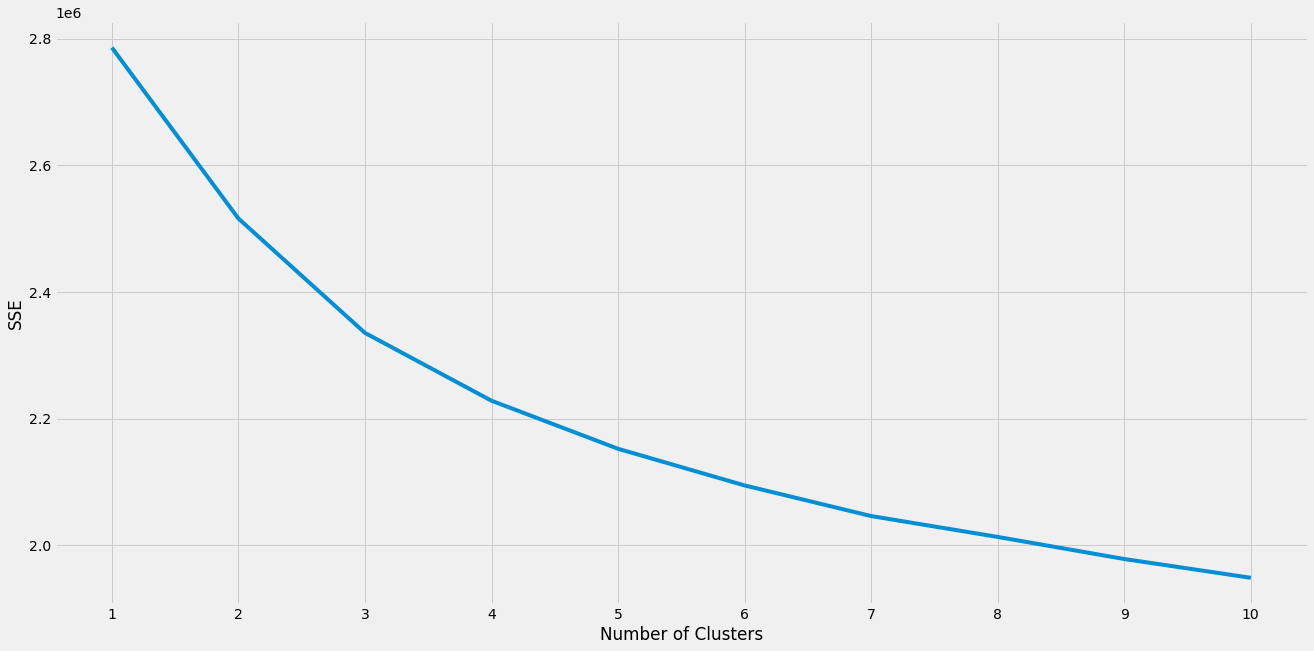

Elbow Point is  4


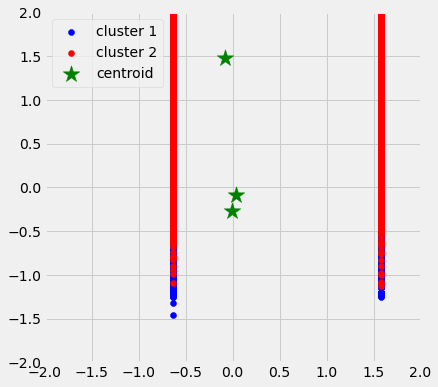

In [18]:
kmeansalgo(telchurn)

K Means Inertia =  2581224.3364519477 
K-Means Centroid Locations =  [[ 8.41398576e-01 -6.50521731e-01 -8.19333014e-01 -1.12243824e+00
  -3.07235349e-01 -1.76091102e-01 -1.24522141e-01 -1.09477728e-01
  -1.91006175e-01 -5.91363118e-01 -3.65542260e-01 -4.74548096e-01
  -3.66649469e-01 -2.54828252e-01 -5.16393932e-01 -6.85257448e-01
  -4.89167277e-01 -7.30884302e-01 -5.89255778e-01 -6.07051430e-01
  -2.02137117e-02 -3.28636492e-01  6.77925014e-01 -2.95585491e-01
  -2.75808213e-01 -4.77934973e-01 -3.54487908e-01 -6.16510947e-01
   1.18573366e+00  5.88242151e-01  2.44600965e-01  5.87881777e-01
  -4.01272130e-01 -3.04376305e+00 -6.04110566e-02 -3.00995375e-01
   6.89366443e-01 -4.17893468e-01 -4.46128993e-01 -1.23380006e-01
  -2.46780705e-01 -4.82142464e-01  6.73048993e-01 -1.75756261e-01
  -1.28320541e-01 -6.71531537e-02  8.25317974e-02 -1.93162107e-01
   7.81444158e-01 -1.17188911e-01 -1.40292947e-01 -1.83518168e-01
  -3.38640037e-01  1.83744756e-02  1.91181415e-01 -3.68167308e-01]
 [-2.4

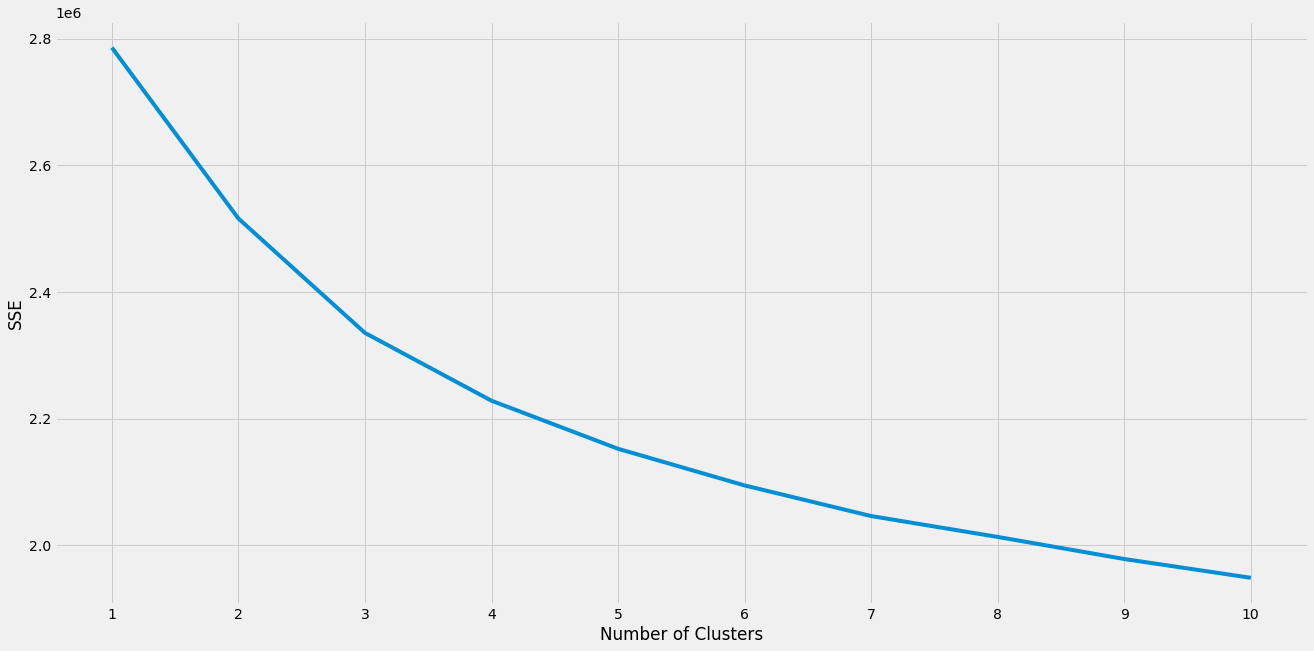

Elbow Point is  4


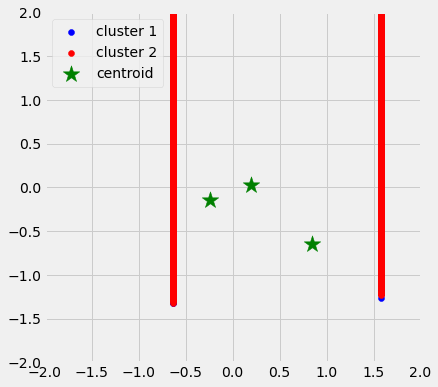

In [21]:
minibatch(telchurn)

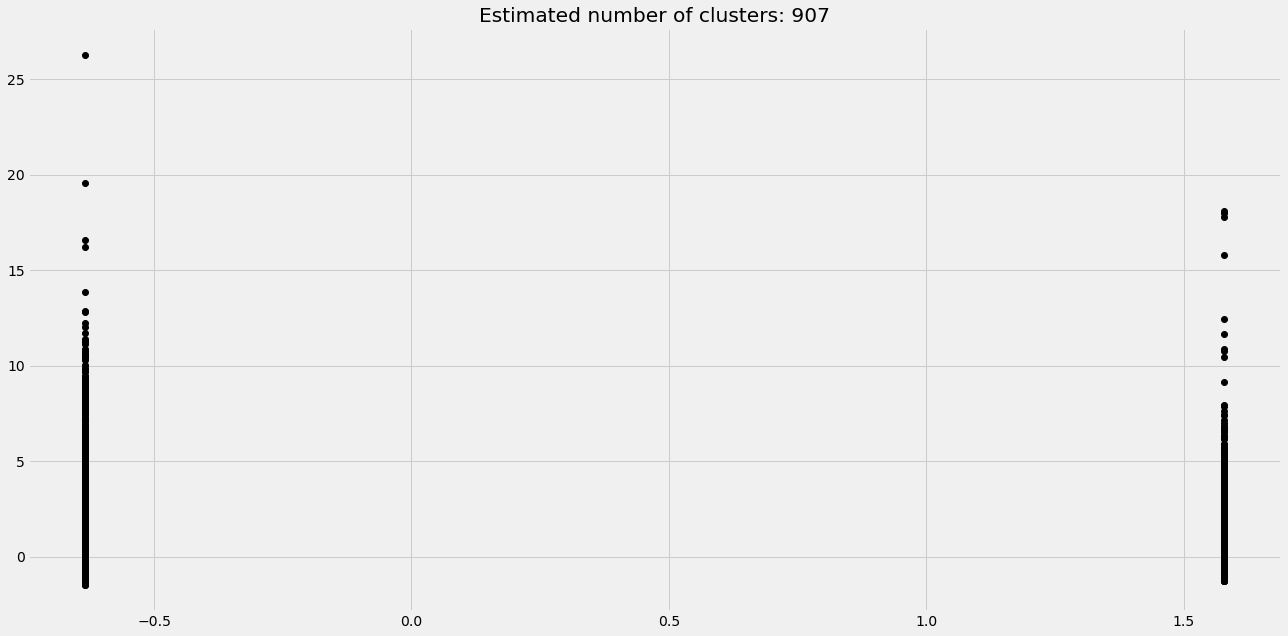

In [22]:
DB(telchurn)

Through clustering, and the elbow plot, it is apparent that there are 4 features within the telecom churn dataset which capture 90% of the variance and remain within 5% of the standard deviation. We'll need to find these 4 features. 

In [125]:
#Creating function to identify most important features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
X = X_train
Y = y_train
def featureextraction(features,dataset):
    y=str(input("What is the label column"))
    label=dataset[y]
    X=dataset.drop(columns=[y])
    test = SelectKBest(score_func=f_classif, k=features)
    fit = test.fit(X, label)
    np.set_printoptions(precision=3)
    print(fit.scores_)
    features = fit.transform(X)
    newtable = pd.DataFrame()
    newtable['columns'] = X.columns
    newtable['featurescores'] = fit.scores_
    newtable = newtable.sort_values(by=['featurescores'], ascending=False)
    return newtable
features = featureextraction(4, telchurn)

What is the label columnChurn
[7.242e+00 1.255e+02 1.735e+02 1.934e+01 1.165e+01 5.971e+00 5.488e+01
 8.428e+00 1.129e+01 9.959e-01 3.957e+01 6.218e+01 2.800e+01 6.856e+01
 5.257e+01 5.709e+01 7.785e+01 8.359e+01 7.593e+00 4.970e-01 3.239e+01
 1.532e+01 5.371e+01 8.473e+00 4.793e-01 5.667e+01 8.162e+01 5.284e+02
 4.119e+01 1.538e+01 4.495e+00 4.489e+01 1.945e+02 1.181e+00 5.353e-01
 9.361e+00 2.384e+01 2.652e+01 3.852e-02 3.944e-01 7.536e-02 4.215e+00
 1.704e+02 5.932e+01 2.903e+00 2.368e+00 6.455e+00 8.386e+00 2.950e+00
 1.294e+01 1.832e+02 1.136e+02 1.347e+00 1.385e+00 4.032e+01]


In [94]:
features.iloc[:4,:]
#These are the 4 features which have the greatest relation to the label 
#column (Churn).

columns  featurescores
27     CurrentEquipmentDays     528.375629
32        HandsetWebCapable     194.527957
50  MadeCallToRetentionTeam     183.235057
2      TotalRecurringCharge     173.460960

In [105]:
mcmctelchurn = telchurn[features]

In [108]:
mcmctelchurn['Churn'] = telchurn['Churn']

#### Oversampling MCMC Data since previous experiments have shown us that this approach generates better results. Undersampling overfits results.

In [52]:
X = mcmctelchurn
y = telchurn['Churn']

In [53]:
Xos, yos = Osampler(X,y)

Original dataset shape Counter({0.0: 35507, 1.0: 14245})
Resampled dataset shape Counter({1.0: 35507, 0.0: 35507})


In [54]:
mcmctelchurnos = pd.DataFrame(Xos)
mcmctelchurnos['Churn'] = yos

In [55]:
mcmctelchurnos

CurrentEquipmentDays  HandsetWebCapable  MadeCallToRetentionTeam  \
0                     361.0                1.0                      1.0   
1                    1504.0                0.0                      0.0   
2                    1812.0                0.0                      0.0   
3                     458.0                1.0                      0.0   
4                     852.0                0.0                      0.0   
...                     ...                ...                      ...   
71009                 305.0                1.0                      0.0   
71010                 733.0                1.0                      0.0   
71011                  31.0                1.0                      0.0   
71012                 514.0                0.0                      0.0   
71013                 388.0                0.0                      0.0   

       TotalRecurringCharge  Churn  
0                      22.0    1.0  
1                      17.0    1.0  
2                      38.0    0.0  
3                      75.0    0.0  
4                      17.0    1.0  
...                     ...    ...  
71009                  45.0    1.0  
71010                  30.0    1.0  
71011                  69.0    1.0  
71012                  15.0    1.0  
71013                   5.0    1.0  

[71014 rows x 5 columns]

These are all discrete values, hence they can be used in Gibbs sampling. 

Converting entire dataset to int type to make process easier

In [56]:
mcmctelchurnos = changedtype(mcmctelchurnos)

which column do you want to change the data type for? Press enter if you want to change the data type for the entire dataset. 
what data type do you want to set the column to? (string, numbers, datetime)numbers


## Beginning Gibbs Sampling Process

In [58]:
#Calculating means
mean1 = mcmctelchurnos['CurrentEquipmentDays'].values.sum()/len(mcmctelchurnos)
mean2 = mcmctelchurnos['HandsetWebCapable'].values.sum()/len(mcmctelchurnos)
mean3 = mcmctelchurnos['MadeCallToRetentionTeam'].values.sum()/len(mcmctelchurnos)
mean4 = mcmctelchurnos['TotalRecurringCharge'].values.sum()/len(mcmctelchurnos)
mean5 = mcmctelchurnos['Churn'].values.sum()/len(mcmctelchurnos)

In [59]:
means = [mean1,mean2,mean3,mean4,mean5]

Calculating covariances across all features for oversampled dataset.

In [60]:
covdata = np.array([mcmctelchurnos['CurrentEquipmentDays'].values, mcmctelchurnos['HandsetWebCapable'].values, mcmctelchurnos['MadeCallToRetentionTeam'].values, mcmctelchurnos['TotalRecurringCharge'].values, mcmctelchurnos['Churn'].values])

In [61]:
covariance = np.cov(covdata)

In [62]:
covariance

array([[ 6.50499225e+04, -3.11912797e+01, -1.80080901e+00,
        -1.50910328e+03,  1.42777942e+01],
       [-3.11912797e+01,  9.51370240e-02, -7.05237439e-04,
         1.05868157e+00, -1.03854224e-02],
       [-1.80080901e+00, -7.05237439e-04,  3.62632344e-02,
        -8.11776726e-02,  5.95665582e-03],
       [-1.50910328e+03,  1.05868157e+00, -8.11776726e-02,
         5.53425955e+02, -7.79807922e-01],
       [ 1.42777942e+01, -1.03854224e-02,  5.95665582e-03,
        -7.79807922e-01,  2.50003520e-01]])

In [98]:
def conditional_sampler(sampling_index, current_x, mean, cov):
    conditioned_index = 1 - sampling_index
    a = cov[sampling_index, sampling_index]
    b = cov[sampling_index, conditioned_index]
    c = cov[conditioned_index, conditioned_index]
    
    mu = mean[sampling_index] + (b * (current_x[conditioned_index] - mean[conditioned_index]))/c
    sigma = np.sqrt(a-(b**2)/c)
    new_x = np.copy(current_x)
    new_x[sampling_index] = np.random.randn()*sigma + mu
    return new_x

In [112]:
def gibbs_sampler(initial_point, num_samples, mean, cov):
    point = np.array(initial_point)
    samples = np.empty([num_samples+1, 5])  #sampled points
    samples[0] = point
    tmp_points = np.empty([num_samples, 5]) #inbetween points
    
    for i in range(num_samples):    
        point = conditional_sampler(0, point, mean, cov)
        tmp_points[i] = point
        point = conditional_sampler(1, point, mean, cov)
        samples[i+1] = point
        point = conditional_sampler(2, point, mean, cov)
        samples[i+1] = point
        point = conditional_sampler(3, point, mean, cov)
        samples[i+1] = point
        point = conditional_sampler(4, point, mean, cov)
        samples[i+1] = point
    return samples, tmp_points

#### For Oversampled Dataset

In [113]:
initial_point = [361,   1,   1,  22,   1]
#These are the first coordinates of the dataset.
num_samples = 100000
samples, tmp_points = gibbs_sampler(initial_point, num_samples, means, covariance)

In [114]:
samples

array([[361.,   1.,   1.,  22.,   1.],
       [328.,   0.,   0.,  22.,   1.],
       [332.,   1.,   0.,  22.,   0.],
       ...,
       [573.,   0.,   0.,  22.,   0.],
       [958.,   0.,   0.,  22.,   0.],
       [872.,   0.,   0.,  22.,   0.]])

In [115]:
telchurnosmcmc = pd.DataFrame(samples)

In [116]:
telchurnosmcmc=telchurnosmcmc.rename(columns={4:'Class'})

In [117]:
telchurnosmcmc

0    1    2     3  Class
0       361.0  1.0  1.0  22.0    1.0
1       328.0  0.0  0.0  22.0    1.0
2       332.0  1.0  0.0  22.0    0.0
3       571.0  0.0  0.0  22.0    0.0
4       396.0  0.0  0.0  22.0    0.0
...       ...  ...  ...   ...    ...
99996   276.0  1.0  0.0  22.0    0.0
99997   736.0  0.0  0.0  22.0    0.0
99998   573.0  0.0  0.0  22.0    0.0
99999   958.0  0.0  0.0  22.0    0.0
100000  872.0  0.0  0.0  22.0    0.0

[100001 rows x 5 columns]

## Applying Analysis Methods on Gibbs Sampled Dataset

In [93]:
ostrainX, ostestX, ostrainY, ostestY = splitting(telchurnosmcmc)

What is the label columnClass


In [94]:
RandFor(ostrainX, ostestX, ostrainY, ostestY)

These are the predicted values:  [0. 0. 0. ... 0. 0. 0.]
The Confusion Matrix is
 [[24702    74]
 [ 4335    14]]
The Accuracy Score is
 84.86180257510729
The Precision is 50.48993134151725
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.85      1.00      0.92     24776
         1.0       0.16      0.00      0.01      4349

    accuracy                           0.85     29125
   macro avg       0.50      0.50      0.46     29125
weighted avg       0.75      0.85      0.78     29125

The LogLoss is 5.228550190399005
The Area Under the Curve is 0.500116184726346
The Recall Score is 50.0116184726346
The Specificity is [0.         0.00298676 1.        ] and the Sensitivity is [0.         0.00321913 1.        ]
The F-Score is 0.006310570205093531


In [95]:
boostaway(ostrainX, ostestX, ostrainY, ostestY)

These are the predicted values:  [0. 0. 0. ... 0. 0. 0.]
The Confusion Matrix is
 [[24770     6]
 [ 4346     3]]
The Accuracy Score is
 85.05751072961374
The Precision is 59.20341622017676
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.85      1.00      0.92     24776
         1.0       0.33      0.00      0.00      4349

    accuracy                           0.85     29125
   macro avg       0.59      0.50      0.46     29125
weighted avg       0.77      0.85      0.78     29125

The LogLoss is 5.160953121656167
The Area Under the Curve is 0.5002238219542525
The Recall Score is 50.02238219542525
The F-Score is 0.0013767783386874715


array([0., 0., 0., ..., 0., 0., 0.])

In [96]:
supvec(ostrainX, ostestX, ostrainY, ostestY)

Which kernel do you want to apply? (linear, rbf)rbf
Value of c?2
These are the predicted values:  [0. 0. 0. ... 0. 0. 0.]
The Confusion Matrix is
 [[24776     0]
 [ 4349     0]]
The Accuracy Score is
 85.06781115879828
The Precision is 42.53390557939914
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.85      1.00      0.92     24776
         1.0       0.00      0.00      0.00      4349

    accuracy                           0.85     29125
   macro avg       0.43      0.50      0.46     29125
weighted avg       0.72      0.85      0.78     29125

The LogLoss is 5.157395314728466
The Area Under the Curve is 0.5
The Recall Score is 50.0
The Specificity is [0. 1.] and the Sensitivity is [0. 1.]
The F-Score is 0.0


In [97]:
LogisticRegression(ostrainX, ostestX, ostrainY, ostestY)

These are the predicted values:  [0. 0. 0. ... 0. 0. 0.]
The Confusion Matrix is
 [[24776     0]
 [ 4349     0]]
The Accuracy Score is
 85.06781115879828
The Precision is 42.53390557939914
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.85      1.00      0.92     24776
         1.0       0.00      0.00      0.00      4349

    accuracy                           0.85     29125
   macro avg       0.43      0.50      0.46     29125
weighted avg       0.72      0.85      0.78     29125

The LogLoss is 5.157395314728466
The Area Under the Curve is 0.5
The Recall Score is 50.0
The Specificity is [0. 1.] and the Sensitivity is [0. 1.]
The F-Score is 0.0


Gibbs Sampling yielded a lower classification accuracy than the best performing models using traditional Machine learning methods here. 

## Applying NUTS Method

Selecting most correlated column and label for this approach.

In [140]:
telchurn = telchurn[['CurrentEquipmentDays', 'Churn']]

In [141]:
telchurn

CurrentEquipmentDays  Churn
0                     361.0    1.0
1                    1504.0    1.0
2                    1812.0    0.0
3                     458.0    0.0
4                     852.0    1.0
...                     ...    ...
49747                 883.0    0.0
49748                 883.0    0.0
49749                 882.0    0.0
49750                 489.0    1.0
49751                 464.0    0.0

[49752 rows x 2 columns]

In [145]:
trainX, testX, trainY, testY = splitting(telchurn)

What is the label columnChurn


Estimating Priors and Standard Deviations for: 

1. CurrentEquipmentDays

According to https://www.statista.com/statistics/619788/average-smartphone-life/, the distribution of people keeping their phones mirrors a multimodal normal distribution. Hence, we'll assume a normal distribution.

Standard deviations for this distribution will be middling. They won't be very large or very small. Since the distribution is in days, we'll keep a margin of 50. 
We'll keep the mean 365 * 2 = 730 days since most people keep their phones for 2 years today. 

In [35]:
np.random.seed(1234)

Exploring Likelihood of CurrentEquipmentDays

<AxesSubplot:ylabel='Frequency'>

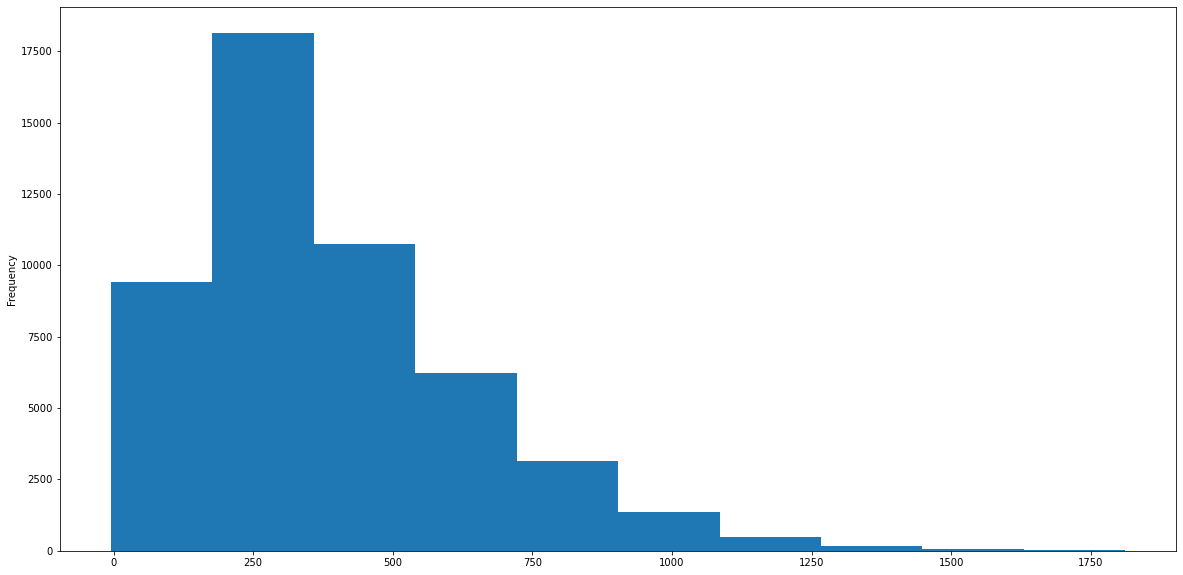

In [160]:
telchurn['CurrentEquipmentDays'].plot.hist()
#Very strange actual distribution. It sort of mirrors a very skewed normal 
#distribution.

In [163]:
stddev = np.std(telchurn['CurrentEquipmentDays'])
stddev

252.28753681826618

In [164]:
mean = np.mean(telchurn['CurrentEquipmentDays'])
mean

380.0208433831806

In [174]:
#reshaping values for easier calculation
trainX = trainX.values.reshape(trainX.shape[0])
testX = testX.values.reshape(testX.shape[0])
trainY = trainY.values
testY = testY.values

In [183]:
with pm.Model() as model:
    xtrain = pm.Data('x', trainX)
    ytrain = pm.Data('y', trainY)
    a = pm.Normal('a', mu = 730, sd=50)
    b = pm.Normal('b', mu = mean, sd = stddev)
    mu = a + np.dot(xtrain, b)
    theta = pm.Deterministic('theta', pm.math.sigmoid(mu))
    boundary = pm.Deterministic('boundary', -a/b)
    y = pm.Bernoulli('ypred', p=theta, observed=trainY)
    trace = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b, a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 352 seconds.
The acceptance probability does not match the target. It is 0.9282304245350586, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9501841124632093, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9674374701891436, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9490981729770739, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'b'}>,
        <AxesSubplot:title={'center':'b'}>],
       [<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'a'}>],
       [<AxesSubplot:title={'center':'boundary'}>,
        <AxesSubplot:title={'center':'boundary'}>]], dtype=object)

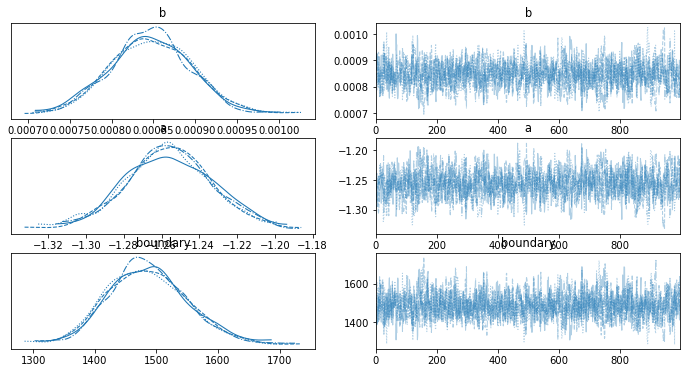

In [186]:
az.plot_trace(trace, var_names = ('b', 'a', 'boundary'))

Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'b'}>,
        <AxesSubplot:title={'center':'theta\n0'}>,
        <AxesSubplot:title={'center':'theta\n1'}>],
       [<AxesSubplot:title={'center':'theta\n2'}>,
        <AxesSubplot:title={'center':'theta\n3'}>,
        <AxesSubplot:title={'center':'theta\n4'}>,
        <AxesSubplot:title={'center':'theta\n5'}>],
       [<AxesSubplot:title={'center':'theta\n6'}>,
        <AxesSubplot:title={'center':'theta\n7'}>,
        <AxesSubplot:title={'center':'theta\n8'}>,
        <AxesSubplot:title={'center':'theta\n9'}>],
       [<AxesSubplot:title={'center':'theta\n10'}>,
        <AxesSubplot:title={'center':'theta\n11'}>,
        <AxesSubplot:title={'center':'theta\n12'}>,
        <AxesSubplot:title={'center':'theta\n13'}>],
       [<AxesSubplot:title={'center':'theta\n14'}>,
        <AxesSubplot:title={'center':'theta\n15'}>,
        <AxesSubplot:title={'center':'theta\n16'}>,
        <AxesSubplot:title={'cente

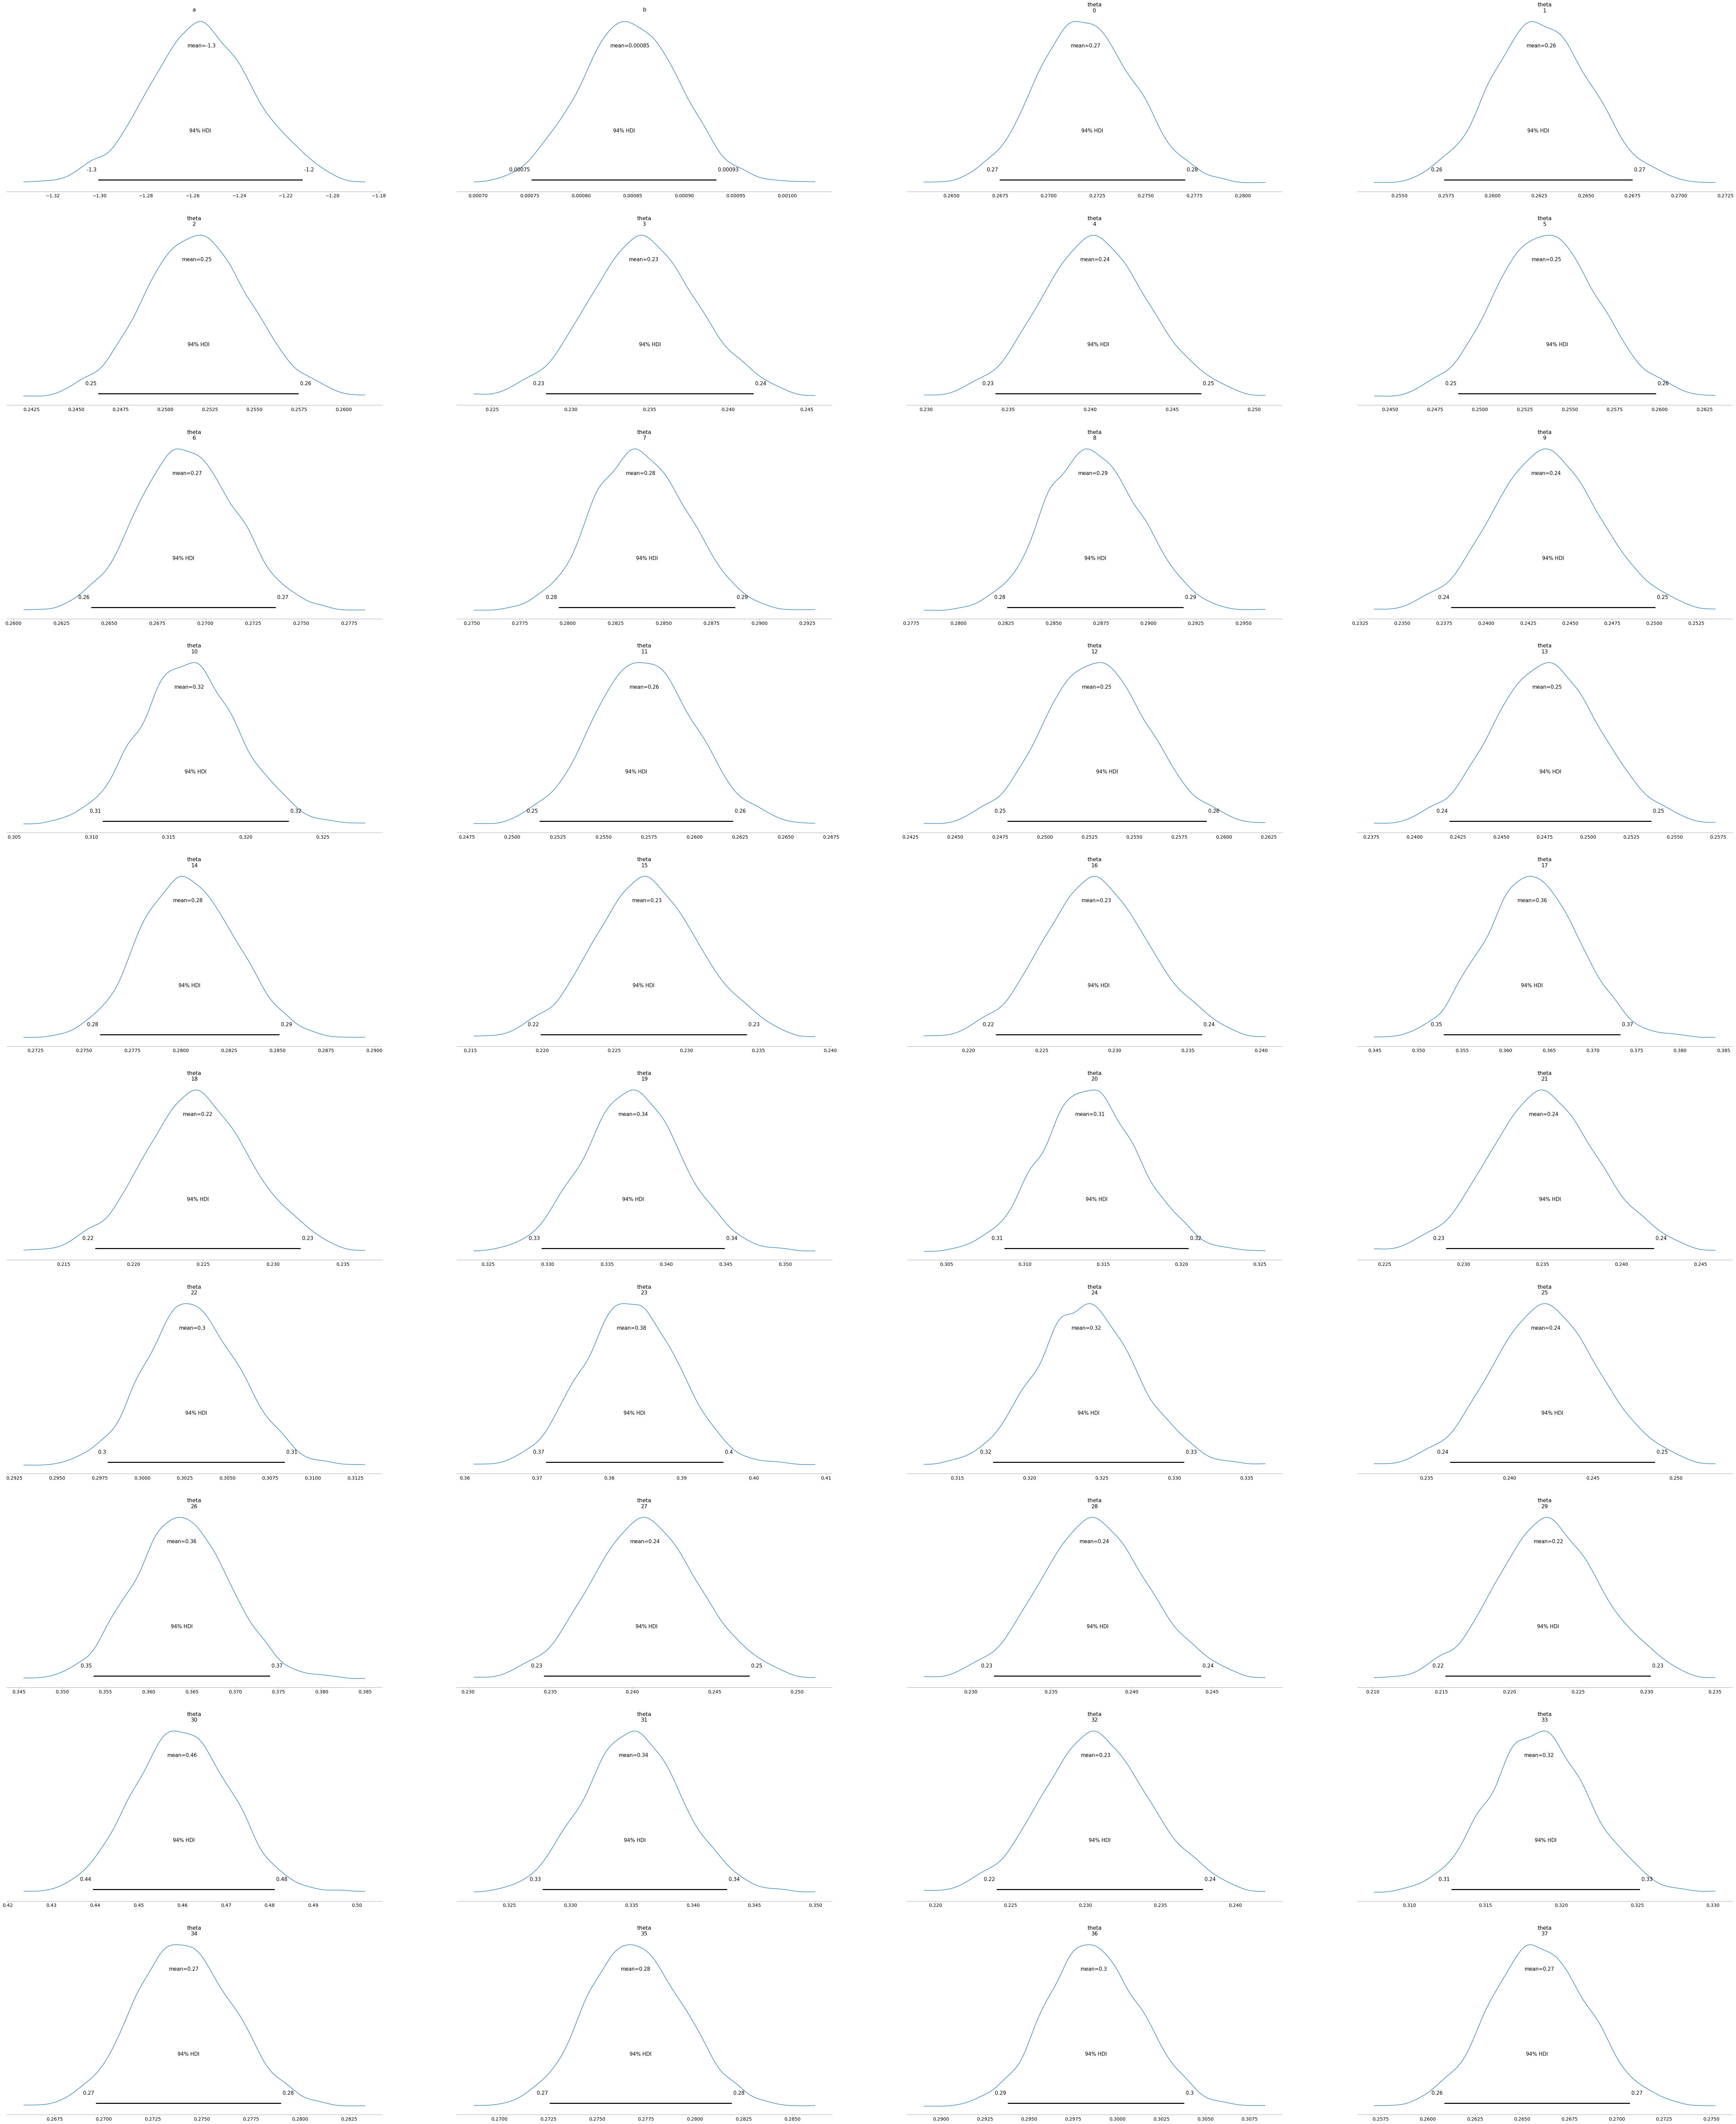

In [187]:
az.plot_posterior(trace)

Got error No model on context stack. trying to find log_likelihood in translation.


<AxesSubplot:xlabel='ypred / ypred'>

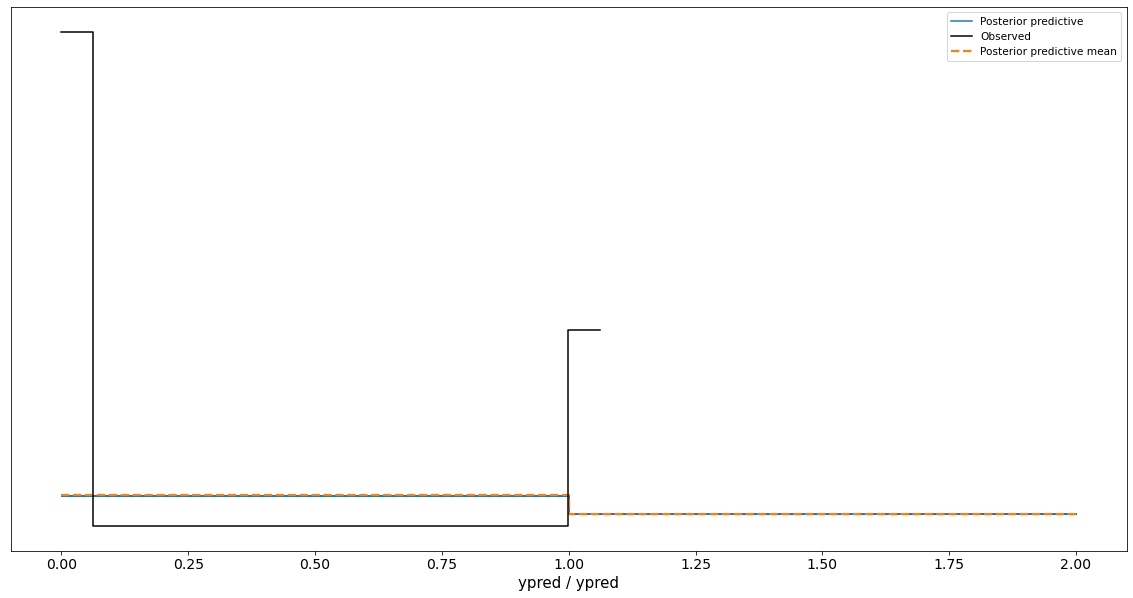

In [190]:
priorp = pm.sample_prior_predictive(model =model)
postp = pm.sample_posterior_predictive(model=model,trace=trace)
data = az.from_pymc3(trace=trace, posterior_predictive=postp, prior = priorp)
az.plot_ppc(data)

The plot shows that the class labels have been captured by the posterior. Though there has been an overshot. 

### Predicting for Test Data

In [198]:
with model:
    pm.set_data({'x':testX})
    predictions = pm.sample_posterior_predictive(trace)
pred = np.mean(predictions['ypred'],axis=0)
finalpredictions = []
for prediction in pred:
    if (prediction<0.5):
        finalpredictions.append(0)
    else:
        finalpredictions.append(1)

In [199]:
Accuracy_Score = acs(testY, finalpredictions)*100
print("The Accuracy Score is\n", Accuracy_Score)
precision = pscore(testY, finalpredictions, average = 'macro', labels = [0,1])*100
print("The Precision is", precision)
CReport = crep(testY, finalpredictions)
print("The Classification Report is\n", CReport)
RecallScore = rscore(testY, finalpredictions,average = 'macro',labels=[0,1])*100
print("The Recall Score is", RecallScore)
FScore = f1score(testY, finalpredictions, average = 'weighted')
print("The F-Score is", FScore)

The Accuracy Score is
 70.81430050551191
The Precision is 47.44284494327193
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.71      1.00      0.83     11640
         1.0       0.24      0.00      0.00      4779

    accuracy                           0.71     16419
   macro avg       0.47      0.50      0.42     16419
weighted avg       0.57      0.71      0.59     16419

The Recall Score is 49.98115951877091
The F-Score is 0.5884798552387497


Here we see that at least the NUTS method is yielding better results than Gibbs sampling in terms of F-Score. Which means the classificaiton is better. Otherwise, the results aren't better than the ones achieved through traditional machine learning methods.

## Credit Card Fraud Dataset

In [4]:
creditcard

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]

In [5]:
description(creditcard, 10)

The columns and rows of the dataset are (284807, 31)
The number of values in the dataset is 8829017
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6   4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7   7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8   7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   
9   9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

        

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

According to the information on Kaggle, the dataset features V1-V28 have been produced through PCA itself. Hence, the dataset doesn't require any further dimensionality reduction/feature selection processing. 

The information also mentions that there is a huge class imbalance, which is why the confusion matrix won't yield any useful results. Instead, the AUC is a better measure of classification accuracy. 

The dataset also seems to be clean and devoid of null values. The only useless column seems to be Time, which shows the gap between each transaction. We can delete this column.  

In [4]:
creditcard = loadfile()

What is the file type? (csv or excel)
csv
What encoding do you want? (latin1 or unicode_escape)
latin1
What is the filepath:creditcard.csv


In [5]:
remcol(creditcard)

which column do you want to remove?
Unnamed: 0
which column do you want to remove?



V1         V2        V3        V4        V5        V6  \
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...           ...        ...       ...       ...       ...       ...   
284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9       V10  ...       V21       V22  \
0       0.239599  0.098698  0.363787  0.090794  ... -0.018307  0.277838   
1      -0.078803  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672   
2       0.791461  0.247676 -1.514654  0.207643  ...  0.247998  0.771679   
3       0.237609  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274   
4       0.592941 -0.270533  0.817739  0.753074  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -4.918215  7.305334  1.914428  4.356170  ...  0.213454  0.111864   
284803  0.024330  0.294869  0.584800 -0.975926  ...  0.214205  0.924384   
284804 -0.296827  0.708417  0.432454 -0.484782  ...  0.232045  0.578229   
284805 -0.686180  0.679145  0.392087 -0.399126  ...  0.265245  0.800049   
284806  1.577006 -0.414650  0.486180 -0.915427  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 30 columns]

Checking for class imbalance

In [442]:
creditcard['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

There is massive class imbalance in the class label. We need to fix this.
Creating over and undersampled datasets.

In [6]:
X = creditcard.iloc[:,:-1]
y = creditcard['Class']

In [7]:
Xus, yus = Usampler(X,y)
Xos, yos = Osampler(X,y)

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 492, 1: 492})
Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 284315, 1: 284315})


In [8]:
creditcardus = Xus
creditcardus['Class'] = yus

creditcardos = Xos
creditcardos['Class'] = yos

Now we can proceed directly to analysis

### Splitting Dataset

In [9]:
ostrainX,ostestX,ostrainY,ostestY=splitting(creditcardos)
ustrainX,ustestX,ustrainY,ustestY=splitting(creditcardus)

What is the label columnClass
What is the label columnClass


## Applying Classification Algorithms on Both Over and Undersampled Dataset

### 1. Random Forest Algorithm: RandFor
### 2. XGBoost Algorithm: boostaway
### 3. SVM Algorithm: supvec
### 4. Logistic Regression Algorithm: LogisticRegression

#### Oversampled Data

In [449]:
RandFor(ostrainX,ostestX,ostrainY,ostestY)

These are the predicted values:  [1 1 0 ... 1 1 1]
The Confusion Matrix is
 [[93767     8]
 [    0 93873]]
The Accuracy Score is
 99.99573669849931
The Precision is 99.99573928696968
The Classification Report is
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     93775
           1       1.00      1.00      1.00     93873

    accuracy                           1.00    187648
   macro avg       1.00      1.00      1.00    187648
weighted avg       1.00      1.00      1.00    187648

The LogLoss is 0.0014725262616117117
The Area Under the Curve is 0.9999573447080778
The Recall Score is 99.99573447080779
The Specificity is [0.00000000e+00 8.53105838e-05 1.00000000e+00] and the Sensitivity is [0. 1. 1.]
The F-Score is 0.9999573910542519


In [450]:
boostaway(ostrainX,ostestX,ostrainY,ostestY) 

These are the predicted values:  [1 1 0 ... 1 1 1]
The Confusion Matrix is
 [[93756    19]
 [    0 93873]]
The Accuracy Score is
 99.98987465893589
The Precision is 99.98988199207601
The Classification Report is
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     93775
           1       1.00      1.00      1.00     93873

    accuracy                           1.00    187648
   macro avg       1.00      1.00      1.00    187648
weighted avg       1.00      1.00      1.00    187648

The LogLoss is 0.0034972498713264407
The Area Under the Curve is 0.9998986936816848
The Recall Score is 99.9898693681685
The F-Score is 0.9998988096823157


array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [ ]:
supvec(ostrainX,ostestX,ostrainY,ostestY)
#algorithm took too long to 

Which kernel do you want to apply? (linear, rbf)rbf
Value of c?2


In [10]:
LogisticRegression(ostrainX,ostestX,ostrainY,ostestY)

These are the predicted values:  [1 1 0 ... 1 0 1]
The Confusion Matrix is
 [[91413  2362]
 [ 7575 86298]]
The Accuracy Score is
 94.70444662346522
The Precision is 94.84172359810267
The Classification Report is
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     93775
           1       0.97      0.92      0.95     93873

    accuracy                           0.95    187648
   macro avg       0.95      0.95      0.95    187648
weighted avg       0.95      0.95      0.95    187648

The LogLoss is 1.8290294044453326
The Area Under the Curve is 0.9470589604088063
The Recall Score is 94.70589604088063
The Specificity is [0.         0.02518795 1.        ] and the Sensitivity is [0.         0.91930587 1.        ]
The F-Score is 0.9455605287810971


Oversampled data has given us pretty high performance. The data seems to be overfitted.

#### Undersampled Data

In [11]:
RandFor(ustrainX,ustestX,ustrainY,ustestY)

These are the predicted values:  [1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1
 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1
 0 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0
 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0
 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1
 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1
 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 1 0 1]
The Confusion Matrix is
 [[159   5]
 [ 16 145]]
The Accuracy Score is
 93.53846153846153
The Precision is 93.76190476190476
The Classification Report is
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       164
           1       0.97      0.90      0.93 

In [12]:
supvec(ustrainX,ustestX,ustrainY,ustestY)

Which kernel do you want to apply? (linear, rbf)rbf
Value of c?2
These are the predicted values:  [1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1
 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1
 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0
 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1
 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1]
The Confusion Matrix is
 [[162   2]
 [ 41 120]]
The Accuracy Score is
 86.76923076923076
The Precision is 89.08180570136477
The Classification Report is
               precision    recall  f1-score   support

           0       0.80      0.99

In [13]:
LogisticRegression(ustrainX,ustestX,ustrainY,ustestY)

These are the predicted values:  [1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1
 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1
 0 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0
 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1
 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1
 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 1 0 1]
The Confusion Matrix is
 [[157   7]
 [ 15 146]]
The Accuracy Score is
 93.23076923076923
The Precision is 93.35195318437452
The Classification Report is
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       164
           1       0.95      0.91      0.93 

In [14]:
boostaway(ustrainX,ustestX,ustrainY,ustestY)

These are the predicted values:  [1 0 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1
 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1
 0 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0
 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1
 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1
 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 1 0 1]
The Confusion Matrix is
 [[155   9]
 [ 12 149]]
The Accuracy Score is
 93.53846153846153
The Precision is 93.55908436291973
The Classification Report is
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       164
           1       0.94      0.93      0.93 

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,

The undersampled dataset has yielded pretty much similar performance. It is too high. The models are overfitting the data.

## Apply Clustering Before MCMC Methods

K Means Inertia =  7809463.291508743 
K-Means Centroid Locations =  [[ 5.53939236e-02 -8.76000362e-01 -7.29705730e-02 -7.07865873e-01
  -6.96028632e-01  1.43933761e-01 -2.19483504e-01 -6.24842657e-02
  -9.25068299e-01  6.48984829e-01 -1.79372174e-01 -2.33728163e-01
   2.36380195e-01 -9.58200095e-02 -1.03444841e-01 -1.01517094e+00
   1.73747080e-01  8.86349769e-01 -5.10083972e-01 -9.57808009e-02
  -1.60828805e-01 -3.58145730e-01 -1.95197842e-02 -1.67762492e-02
  -7.08436463e-02 -3.50015364e-03  1.61288038e-02  1.09879704e-02
   6.57889927e-01 -4.15989784e-02]
 [-2.66013019e+00  2.36960390e+00 -4.97804426e+00  3.26309733e+00
  -2.56659743e+00 -1.14444238e+00 -4.81130273e+00  8.20647837e-01
  -2.38236463e+00 -5.41867878e+00  3.92026469e+00 -6.55036624e+00
  -6.77744923e-02 -7.43338143e+00 -1.24032529e-01 -4.96406799e+00
  -8.32718786e+00 -2.84553222e+00  8.84595383e-01  5.67647472e-01
   1.01809413e+00 -5.00018334e-02 -9.45097168e-02 -1.61797403e-01
   1.56336749e-01  7.21962416e-02  6.25

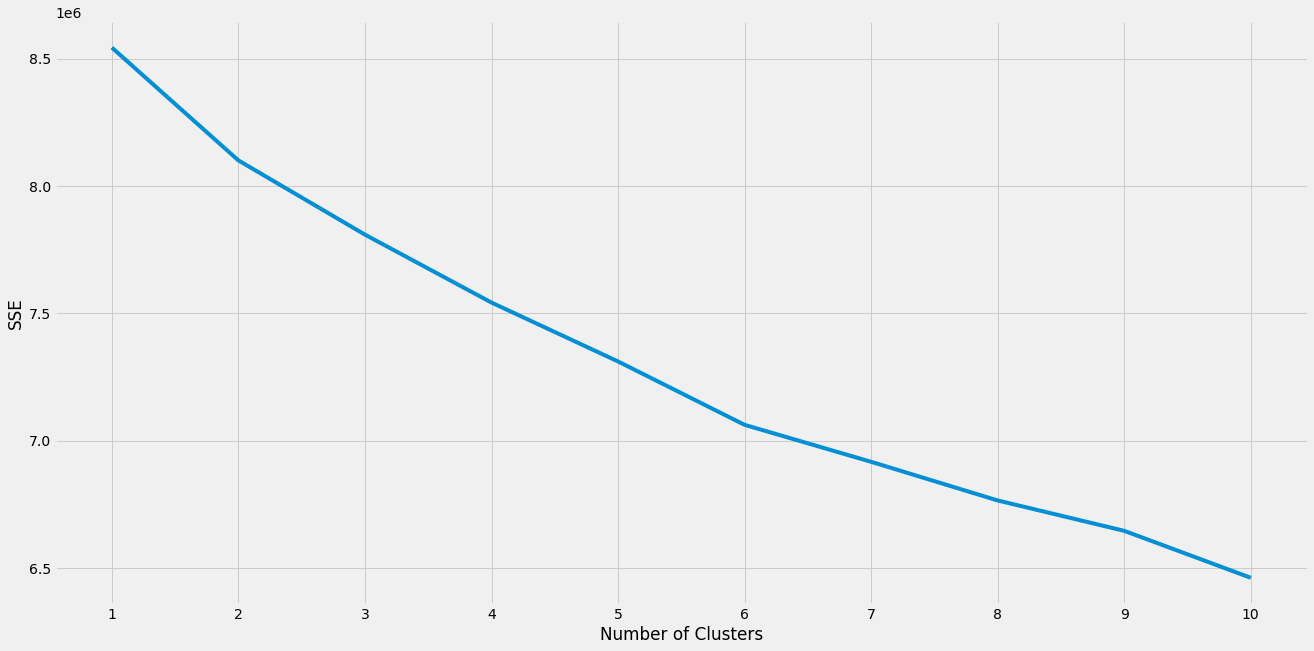

Elbow Point is  6


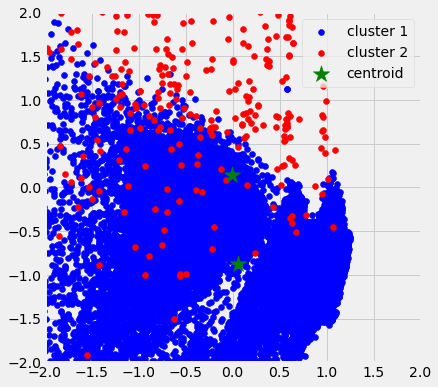

In [28]:
kmeansalgo(creditcard)

K Means Inertia =  8458201.406801833 
K-Means Centroid Locations =  [[-0.06879041 -0.05650578  0.52127802 -1.07178358  0.23810639  0.07910132
  -0.13542715 -0.5227493  -0.59845242 -0.16508326 -0.12345275 -0.7244364
  -1.04093869  0.28504972 -0.15002223  1.58737597 -0.99708788  0.19835335
   0.69650901  0.35275041 -0.3782464   0.03454839 -0.64798292 -1.72875864
   1.55679107  0.9640526  -0.36767333 -0.20489572 -0.21819403 -0.04159898]
 [-0.14172069  0.02470702  0.48246199 -0.07096763  0.11285133 -0.12198807
  -0.03616439 -0.00434113  0.05865561 -0.09033979  0.1764163  -0.0418002
  -0.23621345  0.09103226  0.27914722  0.08721722 -0.08590283 -0.16588919
   0.12920857 -0.04046681  0.03821579 -0.36436573  0.10133442 -0.11368218
  -0.08343797  0.45887823 -0.24423981 -0.07414699 -0.18323914 -0.04159898]
 [ 0.54401195 -0.32743328 -0.93749794  0.02487582  0.1154307   0.14364471
   0.08263617 -0.01144802 -0.18071778  0.75289462 -0.10692735 -0.07557778
  -0.07675369  0.18593515 -0.36540417 -0.201

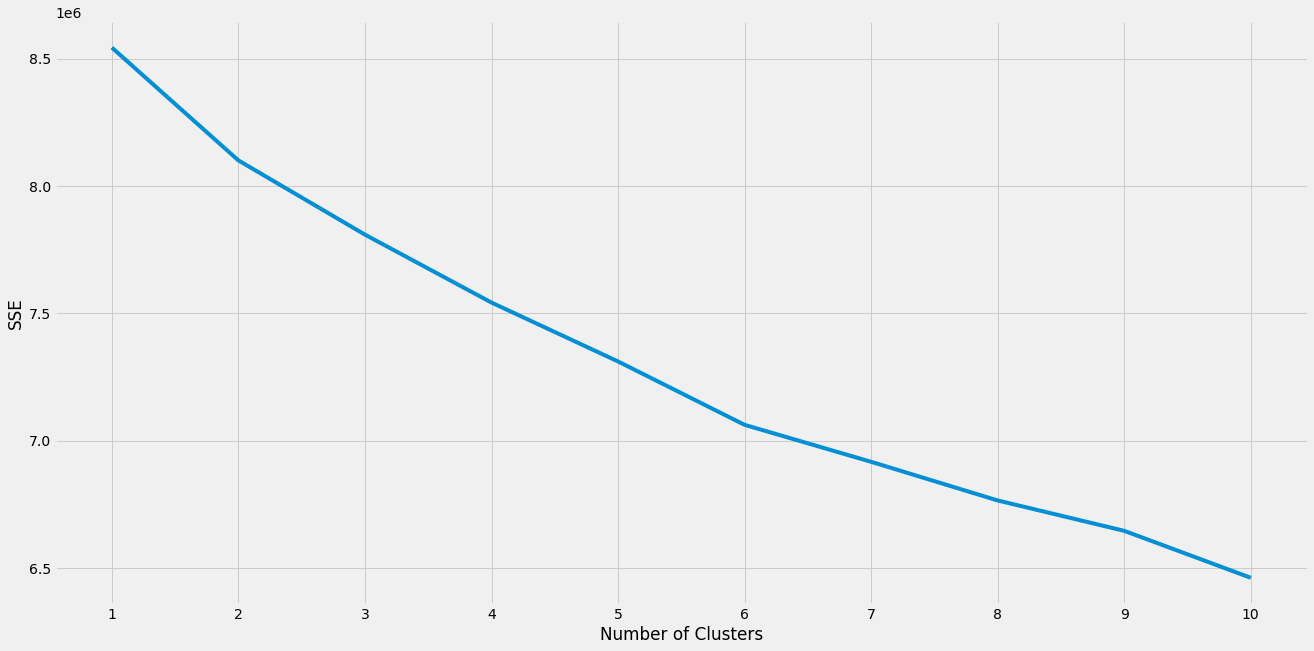

Elbow Point is  6


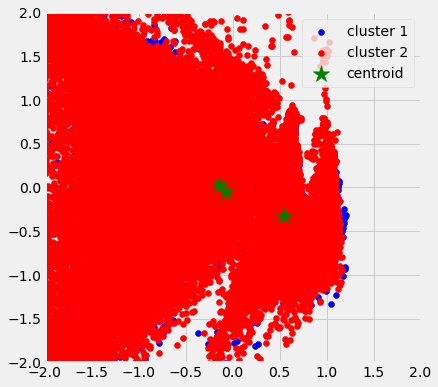

In [29]:
minibatch(creditcard)

Through clustering and the elbow plot, it is apparent that the credit card fraud dataset has 6 features which capture 90% of the variance and contribute to 5% of the standard deviation. 

Luckily, the credit card fraud dataset has already gone through PCA dimensionality reduction. The features are listed in order of decreasing variance. Hence features V1-V6 are the ones we need for effective MCMC. 

In [111]:
features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6']

In [118]:
creditcard[features]

V1         V2        V3        V4        V5        V6
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921
...           ...        ...       ...       ...       ...       ...
284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837
284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415
284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260
284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708
284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617

[284807 rows x 6 columns]

In [119]:
mcmccreditcard = creditcard[features]
mcmccreditcard['Class'] = creditcard['Class']

In [14]:
mcmccreditcard = loadfile()

What is the file type? (csv or excel)
csv
What encoding do you want? (latin1 or unicode_escape)
latin1
What is the filepath:mcmccreditcard.csv


In [15]:
remcol(mcmccreditcard)

which column do you want to remove?
Unnamed: 0
which column do you want to remove?



V1         V2        V3        V4        V5        V6  Class
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388      0
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361      0
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499      0
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203      0
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921      0
...           ...        ...       ...       ...       ...       ...    ...
284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837      0
284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415      0
284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260      0
284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708      0
284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617      0

[284807 rows x 7 columns]

In [65]:
trainX, testX, trainY, testY = splitting(mcmccreditcard)

What is the label columnClass


### Sampling Feature Values through PyMC3

In [16]:
#V1
max(mcmccreditcard['V1']), min(mcmccreditcard['V1'])
#Sampling from a uniform distribution between 25 and -75
mu = mean(mcmccreditcard['V1'])
sigma = np.std(mcmccreditcard['V1'])
#Sampling from a normal distribution with mean = mu

-0.003629244290831116

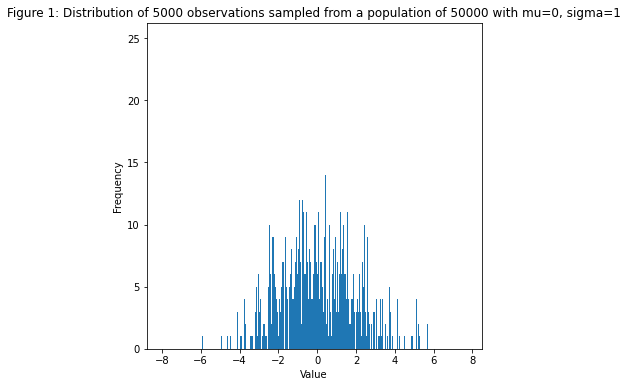

In [17]:
model = lambda t:np.random.normal(mu,sigma,t)
population = model(50000)
observation = population[np.random.randint(0,10000,10000)]
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.hist( observation,bins=5000 ,)
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")
ax.set_title("Figure 1: Distribution of 5000 observations sampled from a population of 50000 with mu=0, sigma=1")
mu_obs=observation.mean()
mu_obs

<AxesSubplot:ylabel='Frequency'>

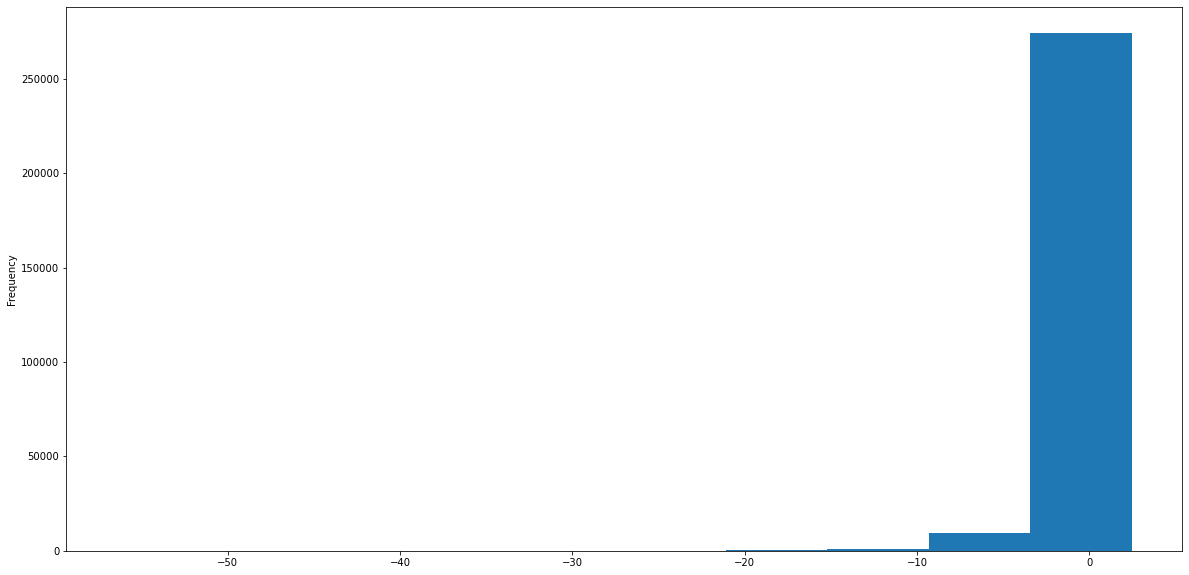

In [18]:
mcmccreditcard['V1'].plot.hist()

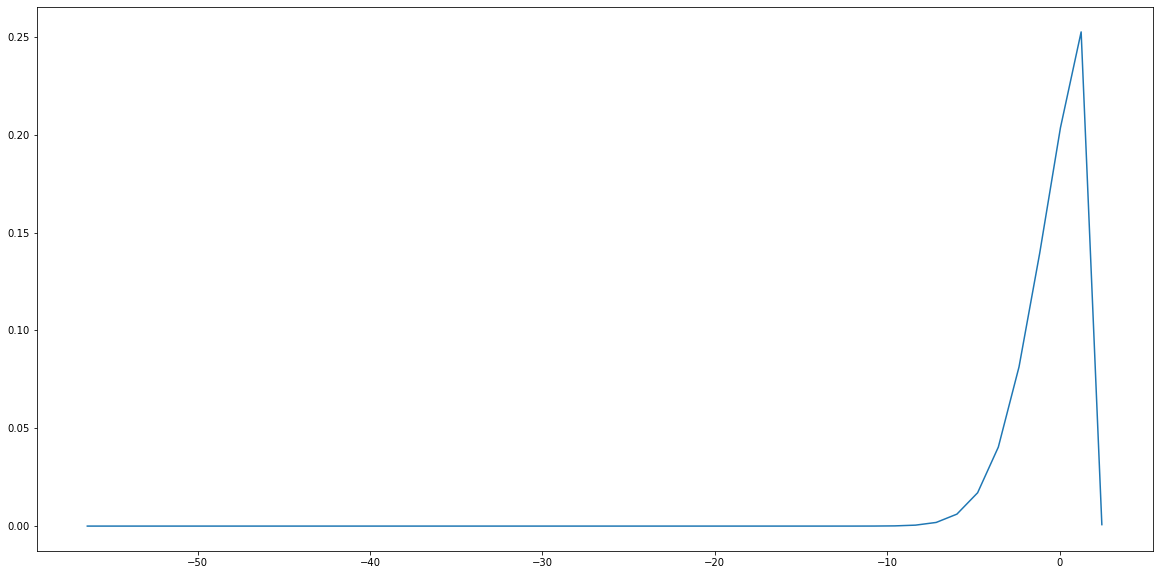

In [19]:
X = np.linspace(min(mcmccreditcard['V1']), max(mcmccreditcard['V1']))
plt.plot(X, skewnorm.pdf(X, *skewnorm.fit(mcmccreditcard['V1'])))

In [20]:
n = 300000
h = mcmccreditcard['Class']
niter = 1000
alpha = 5
beta = 5
with pm.Model() as model:
    p = pm.Beta('prior', alpha = alpha, beta = beta)
    y = pm.Binomial('y', n=n, p=p, observed=h)
    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(niter, step, start, random_seed=123, progressbar=True)
    print(pm.summary(trace))
    map_estimate = pm.find_MAP(model=model)
    print(map_estimate)
                     

Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [prior]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 29 seconds.
The number of effective samples is smaller than 25% for some parameters.


       mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
prior   0.0  0.0     0.0      0.0        0.0      0.0     521.0     485.0   

       r_hat  
prior   1.02  



{'prior_logodds__': array(-18.96452862), 'prior': array(5.80510217e-09)}


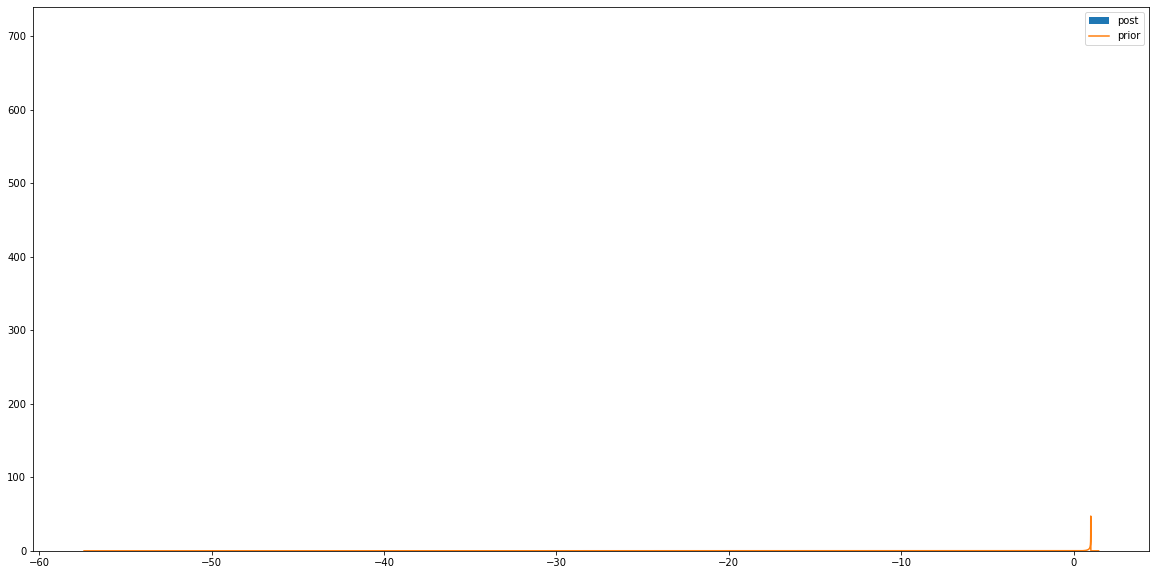

In [23]:
plt.hist(trace['prior'], 15, label='post');
x = np.linspace(min(mcmccreditcard['V1']),max(mcmccreditcard['V1']) , 50000)
plt.plot(x-1, stats.beta.pdf(x-1, 5, 0.5), label='prior');
plt.legend(loc='best');

In [24]:
V1 = x

In [25]:
#V2
max(mcmccreditcard['V2']), min(mcmccreditcard['V2'])
#Sampling from a uniform distribution between 25 and -75
mu = mean(mcmccreditcard['V2']) 
sigma = np.std(mcmccreditcard['V2'])
#Sampling from a normal distribution with mean = mu and std = sigma


0.021914726219826163

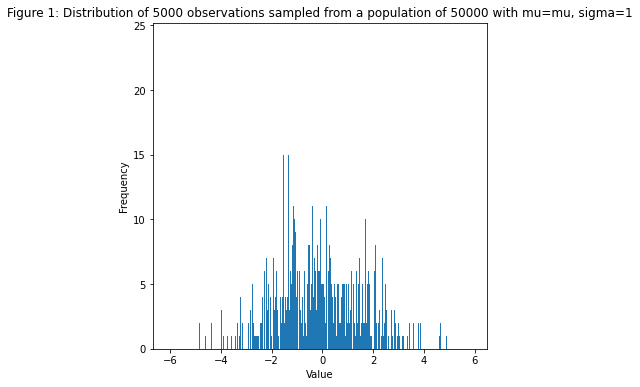

In [26]:
model = lambda t:np.random.normal(mu,sigma,t)
population = model(50000)
observation = population[np.random.randint(0,10000,10000)]
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.hist( observation,bins=5000 ,)
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")
ax.set_title("Figure 1: Distribution of 5000 observations sampled from a population of 50000 with mu=mu, sigma=1")
mu_obs=observation.mean()
mu_obs

<AxesSubplot:ylabel='Frequency'>

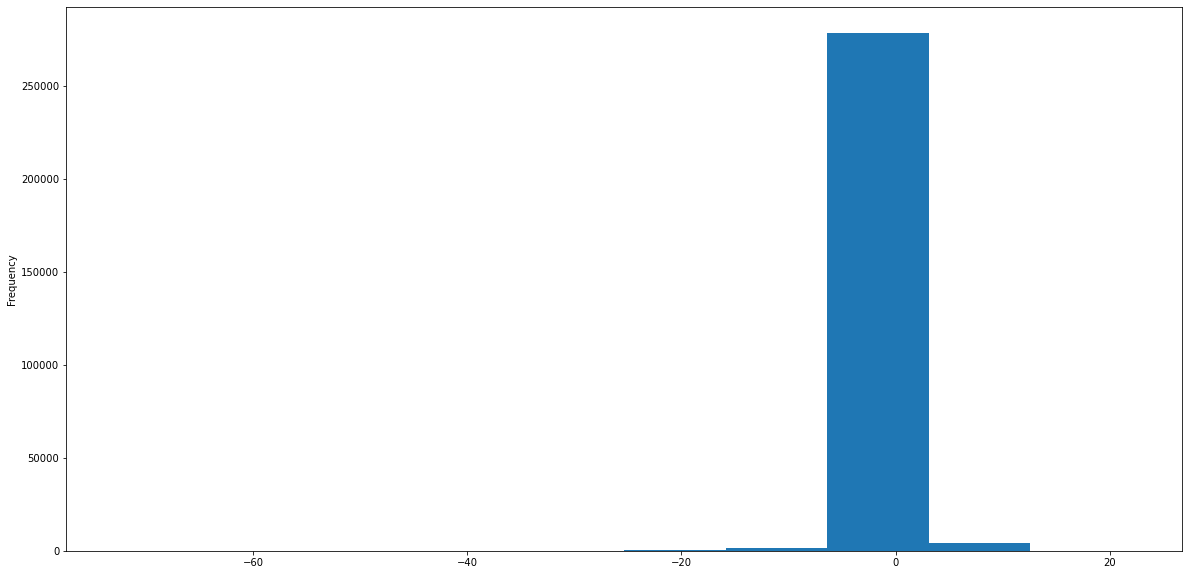

In [27]:
mcmccreditcard['V2'].plot.hist()

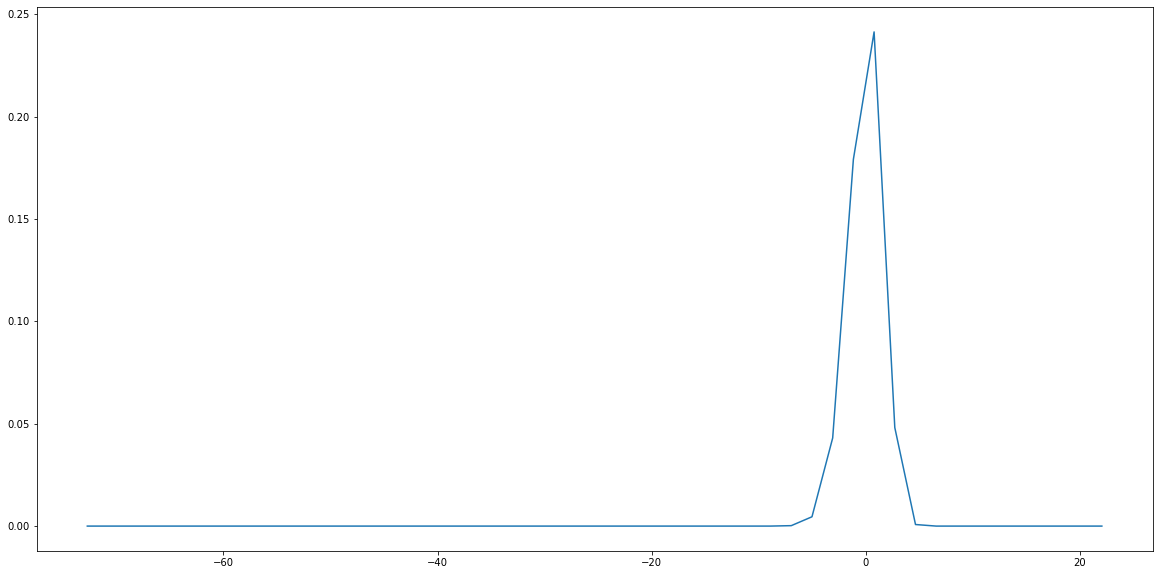

In [28]:
X = np.linspace(min(mcmccreditcard['V2']), max(mcmccreditcard['V2']))
plt.plot(X, skewnorm.pdf(X, *skewnorm.fit(mcmccreditcard['V2'])))

In [29]:
n = 300000
h = mcmccreditcard['Class']
niter = 1000
alpha = 5
beta = 5
with pm.Model() as model:
    p = pm.Beta('prior', alpha = alpha, beta = beta)
    y = pm.Binomial('y', n=n, p=p, observed=h)
    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(niter, step, start, random_seed=123, progressbar=True)
    print(pm.summary(trace))
    map_estimate = pm.find_MAP(model=model)
    print(map_estimate)
                     

Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [prior]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 30 seconds.
The number of effective samples is smaller than 25% for some parameters.


       mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
prior   0.0  0.0     0.0      0.0        0.0      0.0     521.0     485.0   

       r_hat  
prior   1.02  



{'prior_logodds__': array(-18.96452862), 'prior': array(5.80510217e-09)}


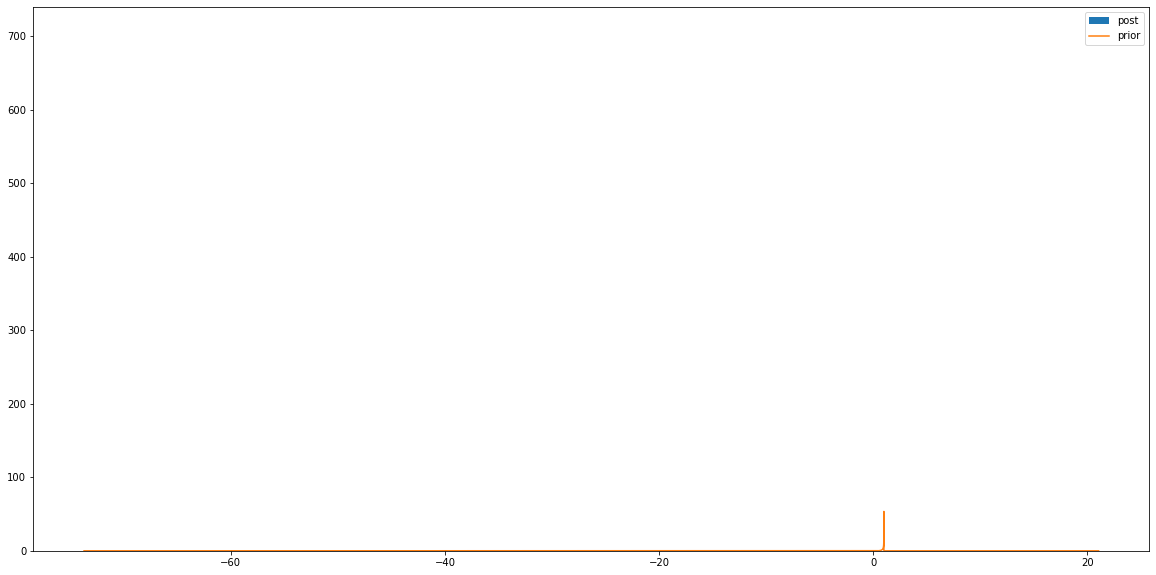

In [30]:
plt.hist(trace['prior'], 15, label='post');
x = np.linspace(min(mcmccreditcard['V2']),max(mcmccreditcard['V2']) , 50000)
plt.plot(x-1, stats.beta.pdf(x-1, 5, 0.5), label='prior');
plt.legend(loc='best');

In [31]:
V2 = x

In [32]:
#V3
max(mcmccreditcard['V3']), min(mcmccreditcard['V3'])
#Sampling from a uniform distribution between 10 and -50
mu = mean(mcmccreditcard['V3']) 
sigma = np.std(mcmccreditcard['V3'])
#Sampling from a normal distribution with mean = mu and std = sigma


0.020122413055246865

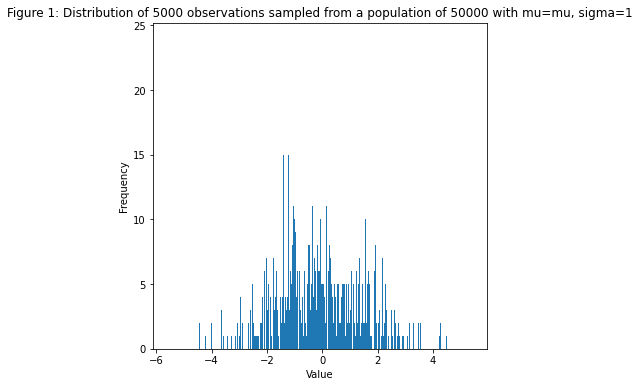

In [33]:
model = lambda t:np.random.normal(mu,sigma,t)
population = model(50000)
observation = population[np.random.randint(0,10000,10000)]
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.hist( observation,bins=5000 ,)
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")
ax.set_title("Figure 1: Distribution of 5000 observations sampled from a population of 50000 with mu=mu, sigma=1")
mu_obs=observation.mean()
mu_obs

<AxesSubplot:ylabel='Frequency'>

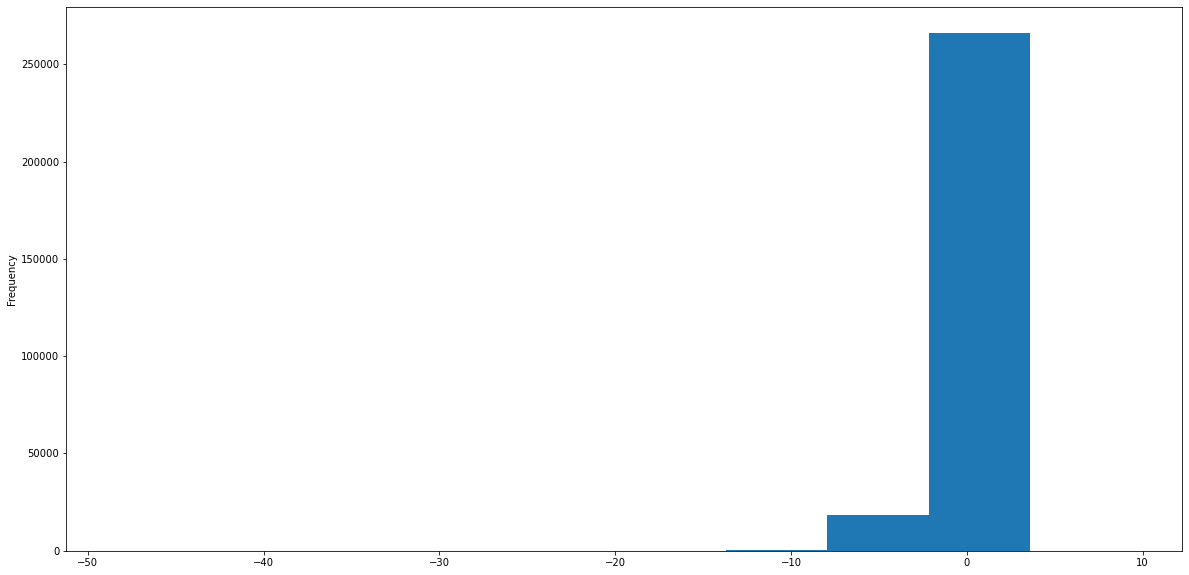

In [34]:
mcmccreditcard['V3'].plot.hist()

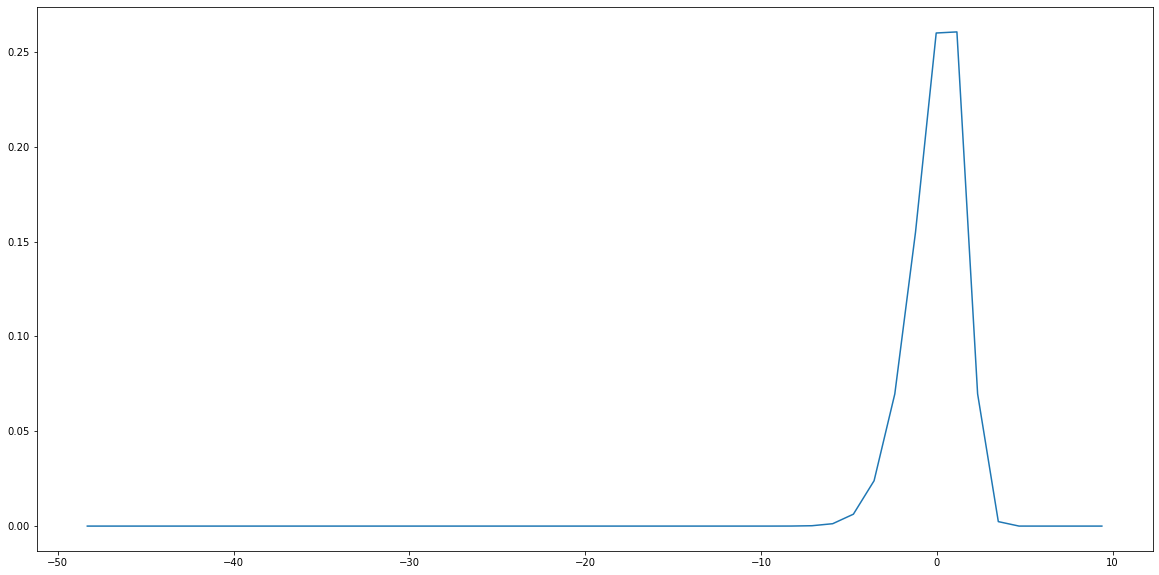

In [35]:
X = np.linspace(min(mcmccreditcard['V3']), max(mcmccreditcard['V3']))
plt.plot(X, skewnorm.pdf(X, *skewnorm.fit(mcmccreditcard['V3'])))

In [36]:
n = 300000
h = mcmccreditcard['Class']
niter = 1000
alpha = 5
beta = 5
with pm.Model() as model:
    p = pm.Beta('prior', alpha = alpha, beta = beta)
    y = pm.Binomial('y', n=n, p=p, observed=h)
    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(niter, step, start, random_seed=123, progressbar=True)
    print(pm.summary(trace))
    map_estimate = pm.find_MAP(model=model)
    print(map_estimate)
                     

Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [prior]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 31 seconds.
The number of effective samples is smaller than 25% for some parameters.


       mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
prior   0.0  0.0     0.0      0.0        0.0      0.0     521.0     485.0   

       r_hat  
prior   1.02  



{'prior_logodds__': array(-18.96452862), 'prior': array(5.80510217e-09)}


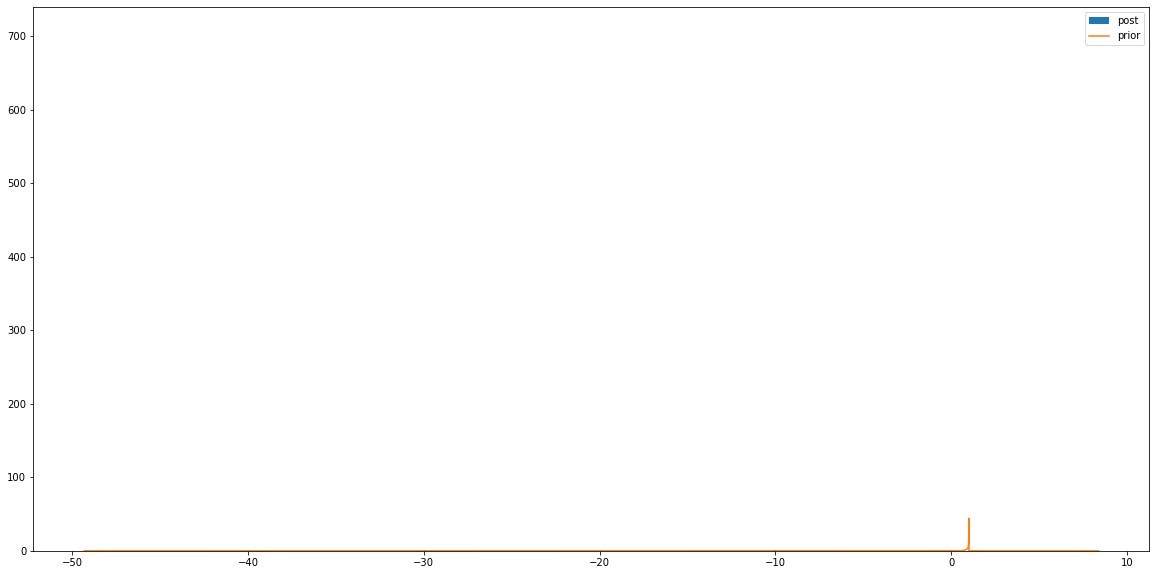

In [37]:
plt.hist(trace['prior'], 15, label='post');
x = np.linspace(min(mcmccreditcard['V3']),max(mcmccreditcard['V3']) , 50000)
plt.plot(x-1, stats.beta.pdf(x-1, 5, 0.5), label='prior');
plt.legend(loc='best');

In [39]:
V3 = x

In [40]:
#V4
max(mcmccreditcard['V4']), min(mcmccreditcard['V4'])
#Sampling from a uniform distribution between 20 and -10
mu = mean(mcmccreditcard['V4']) 
sigma = np.std(mcmccreditcard['V4'])
#Sampling from a normal distribution with mean = mu and std = sigma


0.018790171969503045

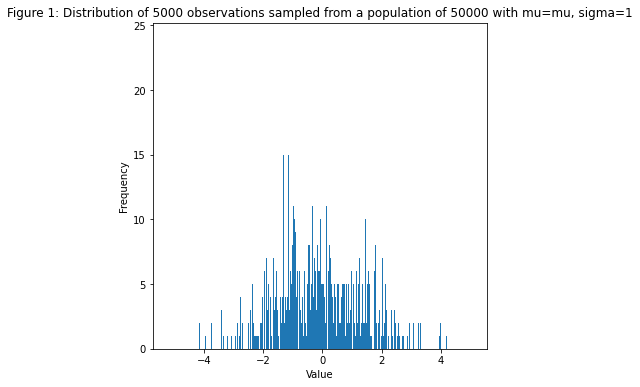

In [41]:
model = lambda t:np.random.normal(mu,sigma,t)
population = model(50000)
observation = population[np.random.randint(0,10000,10000)]
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.hist( observation,bins=5000 ,)
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")
ax.set_title("Figure 1: Distribution of 5000 observations sampled from a population of 50000 with mu=mu, sigma=1")
mu_obs=observation.mean()
mu_obs

<AxesSubplot:ylabel='Frequency'>

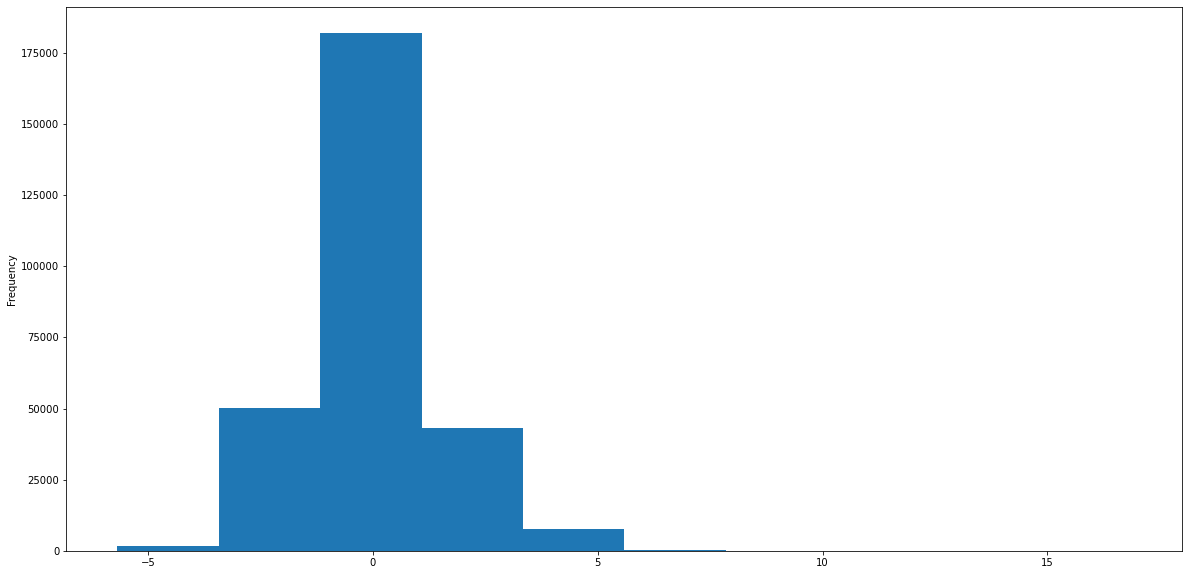

In [42]:
mcmccreditcard['V4'].plot.hist()

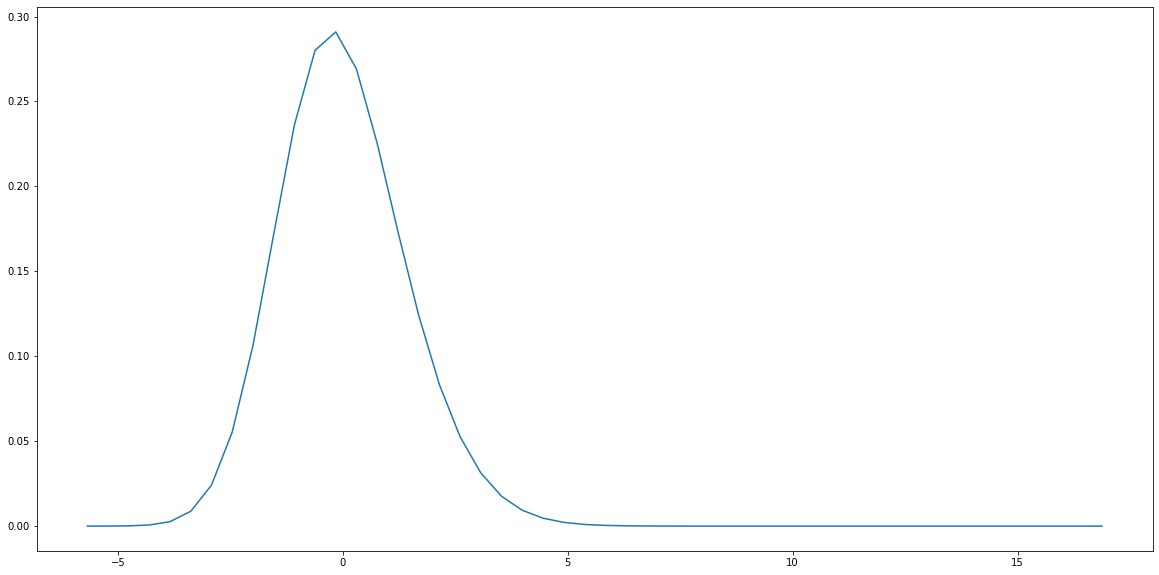

In [43]:
X = np.linspace(min(mcmccreditcard['V4']), max(mcmccreditcard['V4']))
plt.plot(X, skewnorm.pdf(X, *skewnorm.fit(mcmccreditcard['V4'])))

In [44]:
n = 300000
h = mcmccreditcard['Class']
niter = 1000
alpha = 5
beta = 5
with pm.Model() as model:
    p = pm.Beta('prior', alpha = alpha, beta = beta)
    y = pm.Binomial('y', n=n, p=p, observed=h)
    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(niter, step, start, random_seed=123, progressbar=True)
    print(pm.summary(trace))
    map_estimate = pm.find_MAP(model=model)
    print(map_estimate)
                     

Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [prior]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 30 seconds.
The number of effective samples is smaller than 25% for some parameters.


       mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
prior   0.0  0.0     0.0      0.0        0.0      0.0     521.0     485.0   

       r_hat  
prior   1.02  



{'prior_logodds__': array(-18.96452862), 'prior': array(5.80510217e-09)}


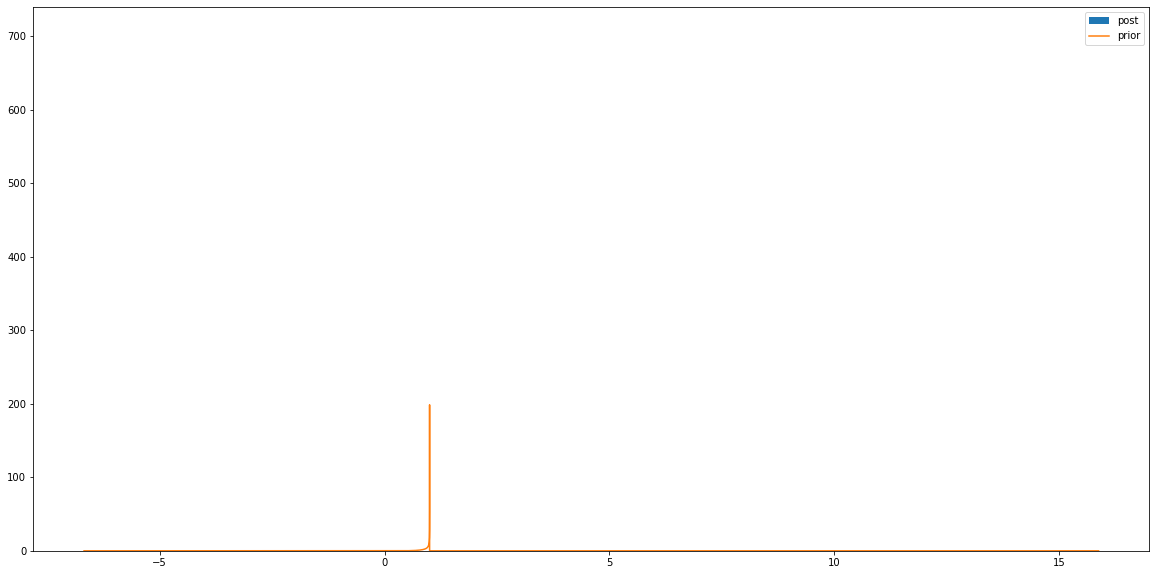

In [45]:
plt.hist(trace['prior'], 15, label='post');
x = np.linspace(min(mcmccreditcard['V4']),max(mcmccreditcard['V4']) , 50000)
plt.plot(x-1, stats.beta.pdf(x-1, 5, 0.5), label='prior');
plt.legend(loc='best');

In [46]:
V4 = x

In [47]:
#V5
max(mcmccreditcard['V5']), min(mcmccreditcard['V5'])
#Sampling from a uniform distribution between 35 and -115
mu = mean(mcmccreditcard['V5']) 
sigma = np.std(mcmccreditcard['V5'])
#Sampling from a normal distribution with mean = mu and std = sigma


0.018317429987367604

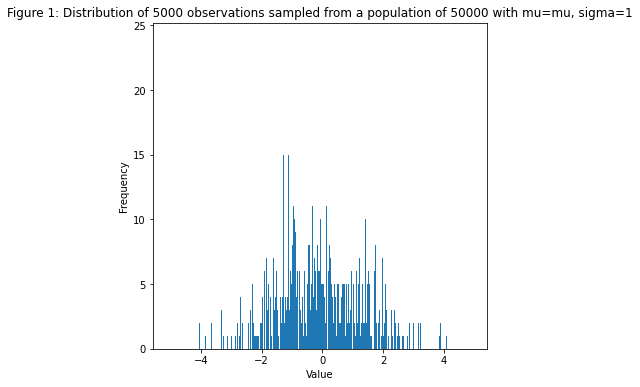

In [48]:
model = lambda t:np.random.normal(mu,sigma,t)
population = model(50000)
observation = population[np.random.randint(0,10000,10000)]
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.hist( observation,bins=5000 ,)
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")
ax.set_title("Figure 1: Distribution of 5000 observations sampled from a population of 50000 with mu=mu, sigma=1")
mu_obs=observation.mean()
mu_obs

<AxesSubplot:ylabel='Frequency'>

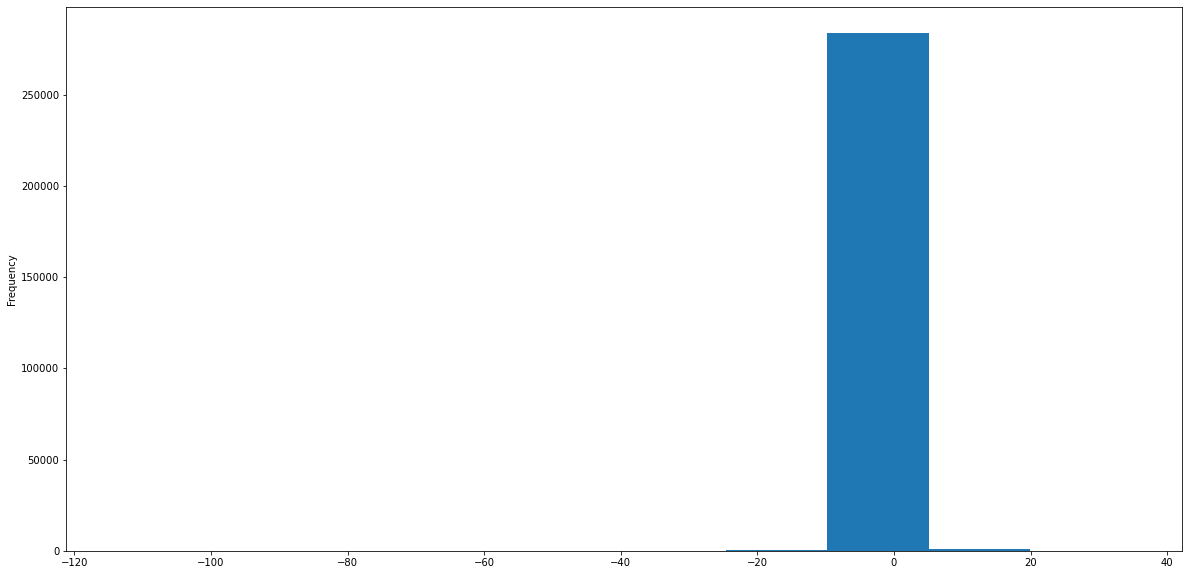

In [49]:
mcmccreditcard['V5'].plot.hist()

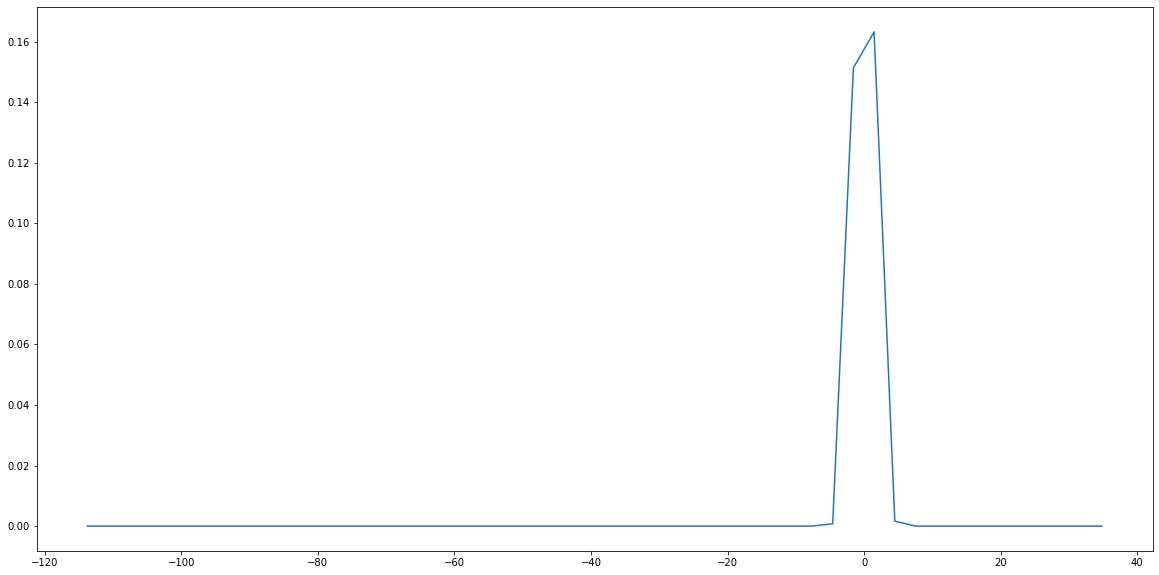

In [50]:
X = np.linspace(min(mcmccreditcard['V5']), max(mcmccreditcard['V5']))
plt.plot(X, skewnorm.pdf(X, *skewnorm.fit(mcmccreditcard['V5'])))

In [51]:
n = 300000
h = mcmccreditcard['Class']
niter = 1000
alpha = 5
beta = 5
with pm.Model() as model:
    p = pm.Beta('prior', alpha = alpha, beta = beta)
    y = pm.Binomial('y', n=n, p=p, observed=h)
    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(niter, step, start, random_seed=123, progressbar=True)
    print(pm.summary(trace))
    map_estimate = pm.find_MAP(model=model)
    print(map_estimate)
                     

Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [prior]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 31 seconds.
The number of effective samples is smaller than 25% for some parameters.


       mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
prior   0.0  0.0     0.0      0.0        0.0      0.0     521.0     485.0   

       r_hat  
prior   1.02  



{'prior_logodds__': array(-18.96452862), 'prior': array(5.80510217e-09)}


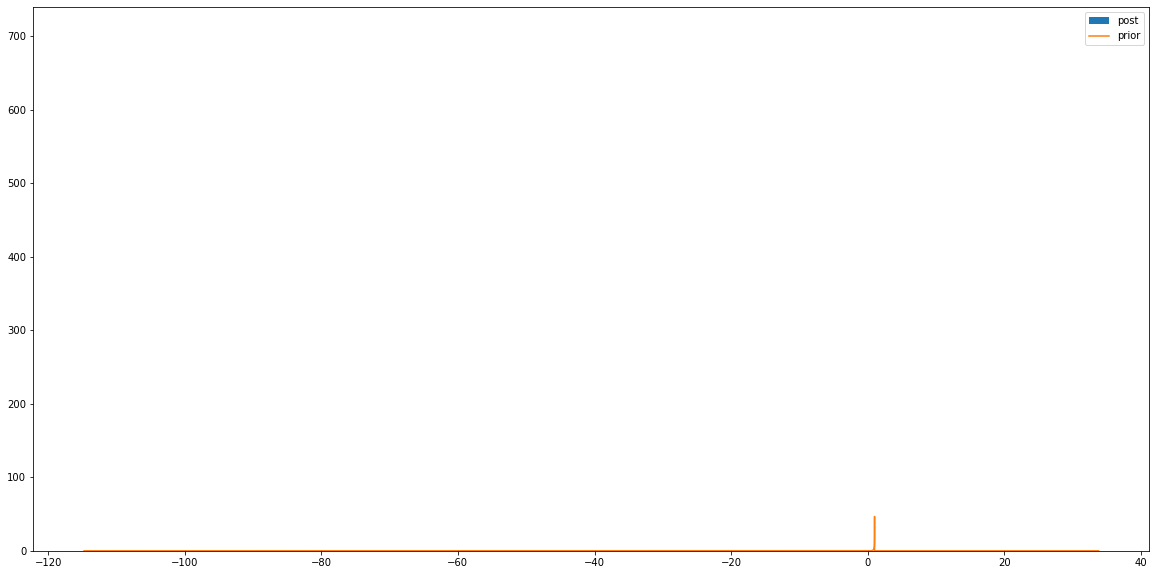

In [52]:
plt.hist(trace['prior'], 15, label='post');
x = np.linspace(min(mcmccreditcard['V5']),max(mcmccreditcard['V5']) , 50000)
plt.plot(x-1, stats.beta.pdf(x-1, 5, 0.5), label='prior');
plt.legend(loc='best');

In [53]:
V5 = x

In [54]:
#V6
max(mcmccreditcard['V6']), min(mcmccreditcard['V6'])
#Sampling from a uniform distribution between 75 and -30
mu = mean(mcmccreditcard['V6']) 
sigma = np.std(mcmccreditcard['V6'])
#Sampling from a normal distribution with mean = mu and std = sigma


0.01768073910926794

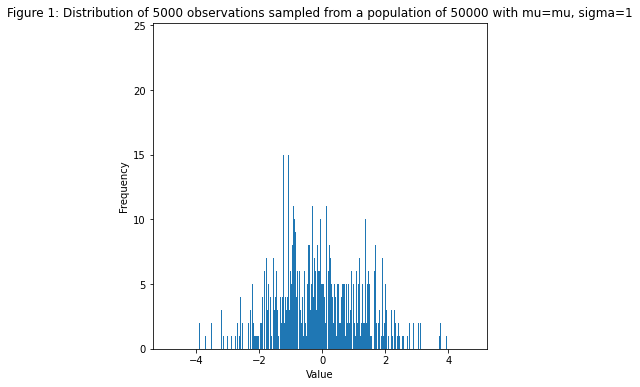

In [55]:
model = lambda t:np.random.normal(mu,sigma,t)
population = model(50000)
observation = population[np.random.randint(0,10000,10000)]
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.hist( observation,bins=5000 ,)
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")
ax.set_title("Figure 1: Distribution of 5000 observations sampled from a population of 50000 with mu=mu, sigma=1")
mu_obs=observation.mean()
mu_obs

<AxesSubplot:ylabel='Frequency'>

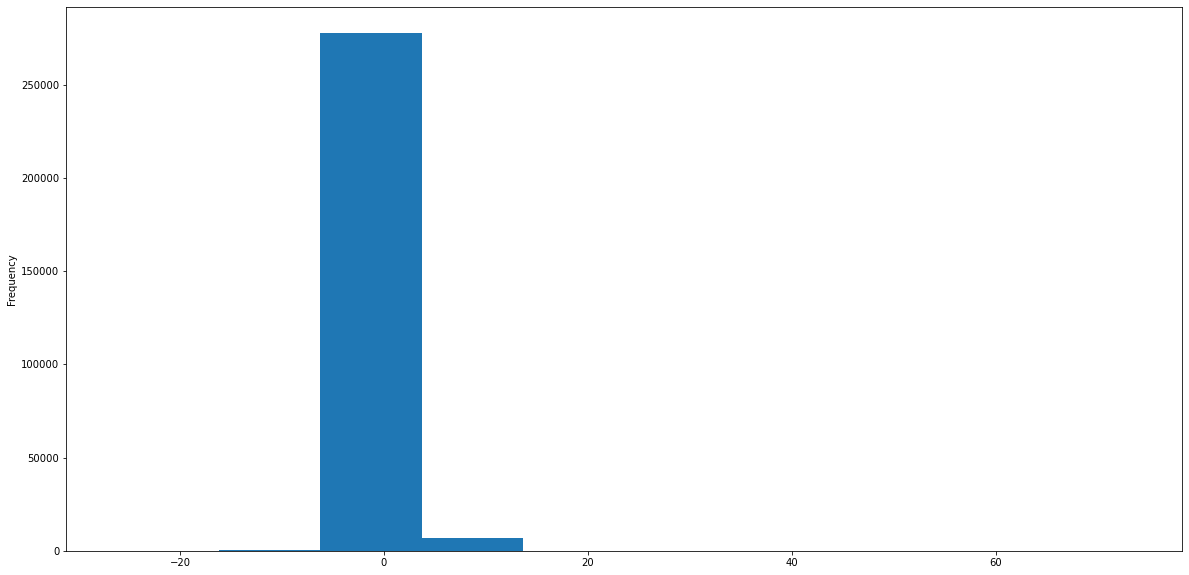

In [56]:
mcmccreditcard['V6'].plot.hist()

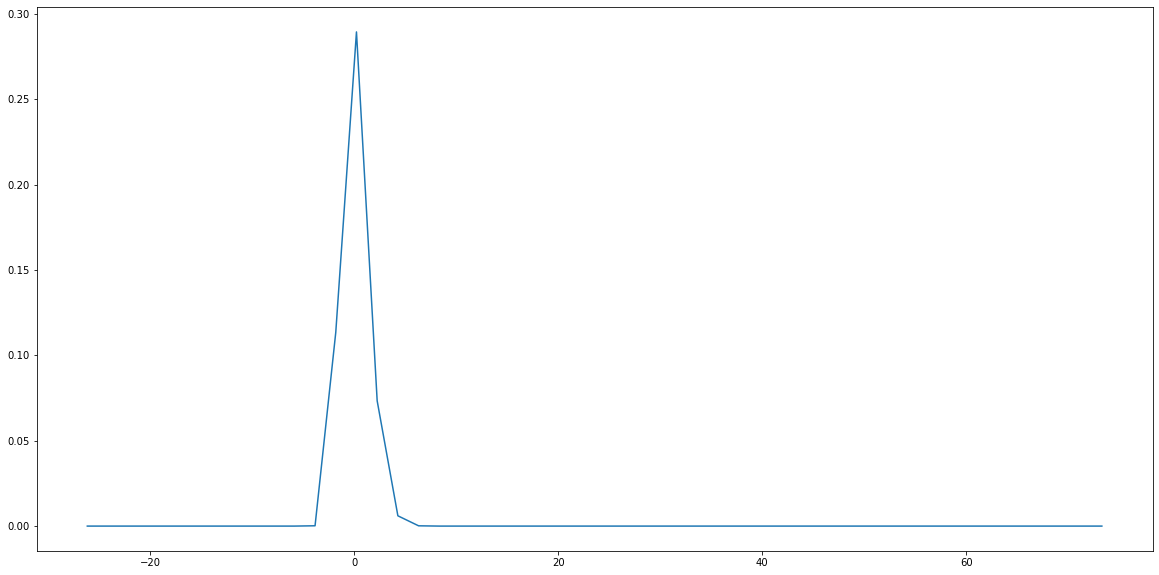

In [57]:
X = np.linspace(min(mcmccreditcard['V6']), max(mcmccreditcard['V6']))
plt.plot(X, skewnorm.pdf(X, *skewnorm.fit(mcmccreditcard['V6'])))

In [58]:
n = 300000
h = mcmccreditcard['Class']
niter = 1000
alpha = 5
beta = 5
with pm.Model() as model:
    p = pm.Beta('prior', alpha = alpha, beta = beta)
    y = pm.Binomial('y', n=n, p=p, observed=h)
    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(niter, step, start, random_seed=123, progressbar=True)
    print(pm.summary(trace))
    map_estimate = pm.find_MAP(model=model)
    print(map_estimate)
                     

Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [prior]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 31 seconds.
The number of effective samples is smaller than 25% for some parameters.


       mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
prior   0.0  0.0     0.0      0.0        0.0      0.0     521.0     485.0   

       r_hat  
prior   1.02  



{'prior_logodds__': array(-18.96452862), 'prior': array(5.80510217e-09)}


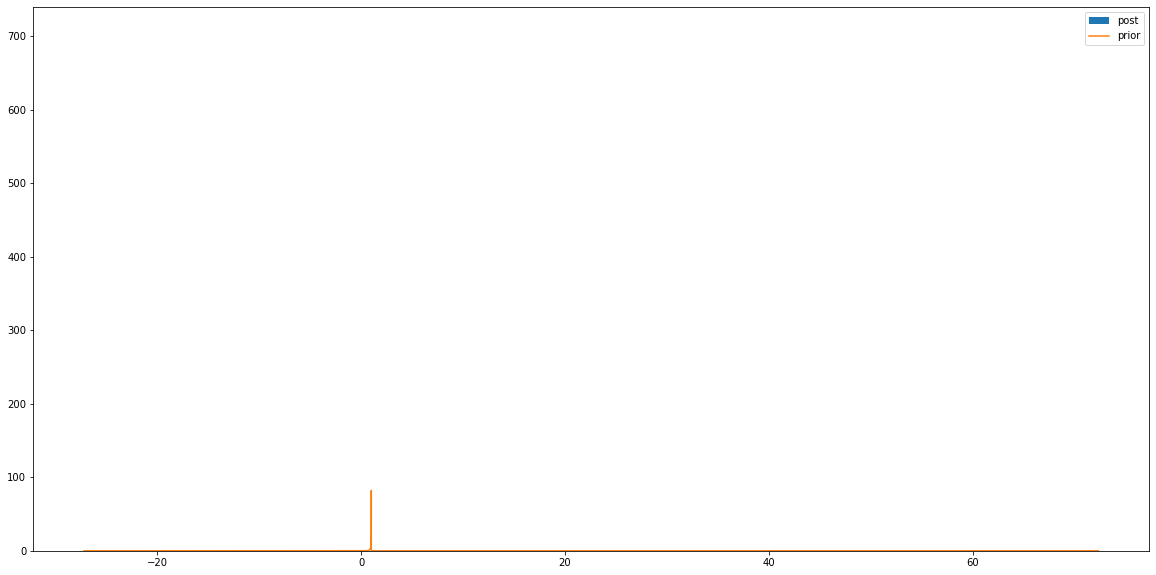

In [59]:
plt.hist(trace['prior'], 15, label='post');
x = np.linspace(min(mcmccreditcard['V6']),max(mcmccreditcard['V6']) , 50000)
plt.plot(x-1, stats.beta.pdf(x-1, 5, 0.5), label='prior');
plt.legend(loc='best');

In [60]:
V6 = x

In [63]:
np.random.shuffle(V1)
np.random.shuffle(V2)
np.random.shuffle(V3)
np.random.shuffle(V4)
np.random.shuffle(V5)
np.random.shuffle(V6)

In [64]:
sampledcreditcard = pd.DataFrame()
sampledcreditcard['V1'] = V1
sampledcreditcard['V2'] = V2
sampledcreditcard['V3'] = V3
sampledcreditcard['V4'] = V4
sampledcreditcard['V5'] = V5
sampledcreditcard['V6'] = V6

In [188]:
sampledcreditcard['Class'] = mcmccreditcard['Class']

In [189]:
sampledcreditcard

V1         V2         V3         V4          V5         V6  \
0     -42.430932  -6.328557 -17.586627  14.741717 -111.626771  29.255543   
1      -8.340657 -43.457749 -33.650589   7.130322  -53.122649  45.856105   
2     -13.554797  15.773055 -31.307591  16.387168  -66.747466  71.060313   
3     -50.325721 -25.188852   7.252610  -0.626804  -38.654079  17.671952   
4     -20.767944 -18.764978 -26.427693  -3.491793    1.510314   7.906564   
...          ...        ...        ...        ...         ...        ...   
49995 -30.223796  10.221115 -49.063589  16.784206  -76.471415  71.792369   
49996 -28.428455 -24.239203 -43.526959   7.273797  -72.499243  19.907905   
49997  -2.013996 -36.340120  -0.846313  -2.187885  -68.702357 -11.443186   
49998 -47.268344 -39.331230 -27.591112   9.642939  -92.603721  18.360244   
49999 -38.304593 -11.740229 -11.886103   9.676327 -109.900644  -7.482524   

       Class  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
49995      0  
49996      0  
49997      0  
49998      0  
49999      0  

[50000 rows x 7 columns]

In [190]:
trainX,testX,trainY,testY=splitting(sampledcreditcard)

What is the label columnClass


In [191]:
RandFor(trainX,testX,trainY,testY)

These are the predicted values:  [0 0 0 ... 0 0 0]
The Confusion Matrix is
 [[16443     0]
 [   57     0]]
The Accuracy Score is
 99.65454545454546
The Precision is 49.82727272727273
The Classification Report is
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     16443
           1       0.00      0.00      0.00        57

    accuracy                           1.00     16500
   macro avg       0.50      0.50      0.50     16500
weighted avg       0.99      1.00      0.99     16500

The LogLoss is 0.11931577300060153
The Area Under the Curve is 0.5
The Recall Score is 50.0
The Specificity is [0. 1.] and the Sensitivity is [0. 1.]
The F-Score is 0.0


In [192]:
supvec(trainX,testX,trainY,testY)

Which kernel do you want to apply? (linear, rbf)rbf
Value of c?2
These are the predicted values:  [0 0 0 ... 0 0 0]
The Confusion Matrix is
 [[16443     0]
 [   57     0]]
The Accuracy Score is
 99.65454545454546
The Precision is 49.82727272727273
The Classification Report is
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     16443
           1       0.00      0.00      0.00        57

    accuracy                           1.00     16500
   macro avg       0.50      0.50      0.50     16500
weighted avg       0.99      1.00      0.99     16500

The LogLoss is 0.11931577300060153
The Area Under the Curve is 0.5
The Recall Score is 50.0
The Specificity is [0. 1.] and the Sensitivity is [0. 1.]
The F-Score is 0.0


In [193]:
boostaway(trainX,testX,trainY,testY)

These are the predicted values:  [0 0 0 ... 0 0 0]
The Confusion Matrix is
 [[16443     0]
 [   57     0]]
The Accuracy Score is
 99.65454545454546
The Precision is 49.82727272727273
The Classification Report is
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     16443
           1       0.00      0.00      0.00        57

    accuracy                           1.00     16500
   macro avg       0.50      0.50      0.50     16500
weighted avg       0.99      1.00      0.99     16500

The LogLoss is 0.11931577300060153
The Area Under the Curve is 0.5
The Recall Score is 50.0
The F-Score is 0.0


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [194]:
LogisticRegression(trainX,testX,trainY,testY)

These are the predicted values:  [0 0 0 ... 0 0 0]
The Confusion Matrix is
 [[16443     0]
 [   57     0]]
The Accuracy Score is
 99.65454545454546
The Precision is 49.82727272727273
The Classification Report is
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     16443
           1       0.00      0.00      0.00        57

    accuracy                           1.00     16500
   macro avg       0.50      0.50      0.50     16500
weighted avg       0.99      1.00      0.99     16500

The LogLoss is 0.11931577300060153
The Area Under the Curve is 0.5
The Recall Score is 50.0
The Specificity is [0. 1.] and the Sensitivity is [0. 1.]
The F-Score is 0.0


The simple pym3 methods aren't yielding great results. Even though the accuracy and precision may be high, the F-Score is 0. This indicates an extremely poor performance. 

Moving on to multidimensional Gibbs Sampling

## Multidimensional Gibbs Sampling

In [132]:
mcmccreditcard['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

There is massive class imbalance in the dataset. Hence, without correcting for it, gibbs sampling will yield a dataset with only one class label.

In [133]:
X = mcmccreditcard.iloc[:,:-1]
y = mcmccreditcard['Class']
X1,y1 = Usampler(X,y)
X2,y2 = Osampler(X,y)

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 492, 1: 492})
Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 284315, 1: 284315})


In [134]:
#created undersampled and oversampled dataset
ucreditcard = pd.DataFrame(X1)
ucreditcard['Class'] = y1
ocreditcard = pd.DataFrame(X2)
ocreditcard['Class'] = y2

In [135]:
ucreditcard.iloc[:1,:].values

array([[ 1.31453919,  0.59064276, -0.66659342,  0.71656434,  0.30197787,
        -1.12546747,  0.        ]])

In [136]:
ocreditcard.iloc[:1,:].values

array([[-1.35980713, -0.07278117,  2.53634674,  1.37815522, -0.33832077,
         0.46238778,  0.        ]])

Calculating means of all features for both over and undersampled datasets.

In [137]:
#Undersampled
mean1 = ucreditcard['V1'].values.sum()/len(ucreditcard)
mean2 = ucreditcard['V2'].values.sum()/len(ucreditcard)
mean3 = ucreditcard['V3'].values.sum()/len(ucreditcard)
mean4 = ucreditcard['V4'].values.sum()/len(ucreditcard)
mean5 = ucreditcard['V5'].values.sum()/len(ucreditcard)
mean6 = ucreditcard['V6'].values.sum()/len(ucreditcard)
mean7 = ucreditcard['Class'].values.sum()/len(ucreditcard)

#Oversampled
mean8 = ocreditcard['V1'].values.sum()/len(ocreditcard)
mean9 = ocreditcard['V2'].values.sum()/len(ocreditcard)
mean10 = ocreditcard['V3'].values.sum()/len(ocreditcard)
mean11 = ocreditcard['V4'].values.sum()/len(ocreditcard)
mean12 = ocreditcard['V5'].values.sum()/len(ocreditcard)
mean13 = ocreditcard['V6'].values.sum()/len(ocreditcard)
mean14 = ocreditcard['Class'].values.sum()/len(ocreditcard)

In [138]:
means1 = [mean1,mean2,mean3,mean4,mean5,mean6,mean7]
means2 = [mean8,mean9,mean10,mean11,mean12,mean13,mean14]

Calculating covariances across all features for both over and undersampled datasets.

In [139]:
covdata1 = np.array([ucreditcard['V1'].values, ucreditcard['V2'].values, ucreditcard['V3'].values, ucreditcard['V4'].values, ucreditcard['V5'].values, ucreditcard['V6'].values, ucreditcard['Class'].values])
covdata2 = np.array([ocreditcard['V1'].values, ocreditcard['V2'].values, ocreditcard['V3'].values, ocreditcard['V4'].values, ocreditcard['V5'].values, ocreditcard['V6'].values, ocreditcard['Class'].values])

In [140]:
covariance1 = np.cov(covdata1)
covariance2 = np.cov(covdata2)

In [141]:
covariance1, covariance2

(array([[ 30.50627007, -16.58442614,  30.22209423, -10.98387064,
          20.09658911,   3.14108667,  -1.23256764],
        [-16.58442614,  13.50917318, -19.76824462,   8.03826475,
         -12.44749066,  -1.78877661,   0.90445153],
        [ 30.22209423, -19.76824462,  38.44669163, -15.35163747,
          22.36320248,   4.94378127,  -1.75059198],
        [-10.98387064,   8.03826475, -15.35163747,  10.2893311 ,
          -7.84904191,  -2.43202244,   1.14350002],
        [ 20.09658911, -12.44749066,  22.36320248,  -7.84904191,
          17.68467952,   2.13444904,  -0.804115  ],
        [  3.14108667,  -1.78877661,   4.94378127,  -2.43202244,
           2.13444904,   2.98236566,  -0.33628536],
        [ -1.23256764,   0.90445153,  -1.75059198,   1.14350002,
          -0.804115  ,  -0.33628536,   0.25025432]]),
 array([[ 30.68596472, -16.29658166,  30.31550003, -10.87705413,
          20.11256274,   3.0631641 ,  -1.19641107],
        [-16.29658166,  13.86988674, -19.76917948,   7.9873638

### Commencing Gibbs Sampling

In [142]:
def conditional_sampler(sampling_index, current_x, mean, cov):
    conditioned_index = 1 - sampling_index
    a = cov[sampling_index, sampling_index]
    b = cov[sampling_index, conditioned_index]
    c = cov[conditioned_index, conditioned_index]
    
    mu = mean[sampling_index] + (b * (current_x[conditioned_index] - mean[conditioned_index]))/c
    sigma = np.sqrt(a-(b**2)/c)
    new_x = np.copy(current_x)
    new_x[sampling_index] = np.random.randn()*sigma + mu
    return new_x

In [143]:
def gibbs_sampler(initial_point, num_samples, mean, cov):
    point = np.array(initial_point)
    samples = np.empty([num_samples+1, 7])  #sampled points
    samples[0] = point
    tmp_points = np.empty([num_samples, 7]) #inbetween points
    
    for i in range(num_samples):    
        point = conditional_sampler(0, point, mean, cov)
        tmp_points[i] = point
        point = conditional_sampler(1, point, mean, cov)
        samples[i+1] = point
        point = conditional_sampler(2, point, mean, cov)
        samples[i+1] = point
        point = conditional_sampler(3, point, mean, cov)
        samples[i+1] = point
        point = conditional_sampler(4, point, mean, cov)
        samples[i+1] = point
        point = conditional_sampler(5, point, mean, cov)
        samples[i+1] = point
        point = conditional_sampler(6, point, mean, cov)
        samples[i+1] = point
    return samples, tmp_points

#### For Undersampled Dataset

In [144]:
initial_point = [ 1.31453919,  0.59064276, -0.66659342,  0.71656434,  0.30197787,
        -1.12546747,  0]
#These are the first coordinates of the dataset.
num_samples = 100000
samples, tmp_points = gibbs_sampler(initial_point, num_samples, means1, covariance1)

In [145]:
uscreditcard = pd.DataFrame(samples)

In [146]:
uscreditcard

0         1          2         3         4         5         6
0       1.314539  0.590643  -0.666593  0.716564  0.301978 -1.125467  0.000000
1      -0.362332  0.932761   2.791150  4.917977  0.301978 -2.591831  0.471646
2      -0.293805  0.868007  -2.003006  9.420188  0.301978  0.298907  0.244442
3      -0.683320  2.394577  -4.491280  1.832898  0.301978 -3.865585  1.212524
4       3.885073 -3.137969 -18.471575  6.712591  0.301978 -1.769793  0.932463
...          ...       ...        ...       ...       ...       ...       ...
99996   1.854429 -0.155919  -2.640361  5.330622  0.301978 -0.974581  0.459407
99997  -3.551683  0.688845   5.237711 -0.182926  0.301978  1.547164  0.848278
99998  -0.149411  2.660980  -9.768765 -0.917270  0.301978  0.647596  0.448569
99999  -4.494215  3.460654  -5.721373 -2.155356  0.301978  0.715640  0.959400
100000 -6.639552  4.740069  -4.541810  2.118236  0.301978 -2.718452  0.830621

[100001 rows x 7 columns]

In [147]:
uscreditcard=uscreditcard.rename(columns={6:'Class'})

In [148]:
uscreditcard
#This dataset's Class column doesn't have binary values. Applying a fix.

0         1          2         3         4         5     Class
0       1.314539  0.590643  -0.666593  0.716564  0.301978 -1.125467  0.000000
1      -0.362332  0.932761   2.791150  4.917977  0.301978 -2.591831  0.471646
2      -0.293805  0.868007  -2.003006  9.420188  0.301978  0.298907  0.244442
3      -0.683320  2.394577  -4.491280  1.832898  0.301978 -3.865585  1.212524
4       3.885073 -3.137969 -18.471575  6.712591  0.301978 -1.769793  0.932463
...          ...       ...        ...       ...       ...       ...       ...
99996   1.854429 -0.155919  -2.640361  5.330622  0.301978 -0.974581  0.459407
99997  -3.551683  0.688845   5.237711 -0.182926  0.301978  1.547164  0.848278
99998  -0.149411  2.660980  -9.768765 -0.917270  0.301978  0.647596  0.448569
99999  -4.494215  3.460654  -5.721373 -2.155356  0.301978  0.715640  0.959400
100000 -6.639552  4.740069  -4.541810  2.118236  0.301978 -2.718452  0.830621

[100001 rows x 7 columns]

In [149]:
for i in range(len(uscreditcard)):
    if uscreditcard['Class'][i]<=0:
        uscreditcard['Class'] = uscreditcard['Class'].replace(uscreditcard['Class'][i],0)
        


In [150]:
for i in range(len(uscreditcard)):
    if uscreditcard['Class'][i]>=1:
        uscreditcard['Class'] = uscreditcard['Class'].replace(uscreditcard['Class'][i],1)
        


In [151]:
for i in range(len(uscreditcard)):
    if uscreditcard['Class'][i]>=0.9:
        uscreditcard['Class'] = uscreditcard['Class'].replace(uscreditcard['Class'][i],1)
        
for i in range(len(uscreditcard)):
    if uscreditcard['Class'][i]<=0.1:
        uscreditcard['Class'] = uscreditcard['Class'].replace(uscreditcard['Class'][i],0)

In [152]:
uszero = uscreditcard[uscreditcard['Class']==1]

In [153]:
usone = uscreditcard[uscreditcard['Class']==0]

In [154]:
uscreditcard = pd.concat([uszero,usone])
#Taking sliced dataset for better representation of features corresponding
#to binary labels. 

#### For Oversampled Dataset

In [385]:
initial_point = [-1.35980713, -0.07278117,  2.53634674,  1.37815522, -0.33832077,
         0.46238778,  0.        ]
#These are the first coordinates of the dataset.
num_samples = 100000
samples, tmp_points = gibbs_sampler(initial_point, num_samples, means2, covariance2)

In [386]:
oscreditcard = pd.DataFrame(samples)

In [387]:
oscreditcard

0         1          2         3         4         5         6
0       -1.359807 -0.072781   2.536347  1.378155 -0.338321  0.462388  0.000000
1       -1.380535  1.471034  -0.746543 -2.088322 -0.338321 -0.139609  0.733534
2       -1.768577  2.852602  -3.839251 -1.645504 -0.338321  0.676688  0.515881
3       -2.867071  2.090432  -0.118229  1.863111 -0.338321  0.706910  0.111190
4        0.190115  2.235860  -3.617267  5.512438 -0.338321 -2.940589  0.777864
...           ...       ...        ...       ...       ...       ...       ...
99996   -2.449940  2.159021   4.789175 -4.194990 -0.338321  0.986775 -0.022354
99997   -4.089825  4.968184  -2.080605  5.234401 -0.338321 -0.445367 -0.096447
99998   -9.431391  7.214940   5.577122  2.488475 -0.338321 -2.018657  0.690909
99999  -11.151193  9.294878  -6.318232 -0.598085 -0.338321 -0.926298  0.965198
100000  -9.103368  6.787286 -14.719369  3.207390 -0.338321  0.894381  1.543841

[100001 rows x 7 columns]

In [421]:
oscreditcard=oscreditcard.rename(columns={6:'Class'})

In [422]:
for i in range(len(oscreditcard)):
    if oscreditcard['Class'][i]<=0:
        oscreditcard['Class'] = oscreditcard['Class'].replace(oscreditcard['Class'][i],0)
        
for i in range(len(oscreditcard)):
    if oscreditcard['Class'][i]>=1:
        oscreditcard['Class'] = oscreditcard['Class'].replace(oscreditcard['Class'][i],1)
        
for i in range(len(oscreditcard)):
    if oscreditcard['Class'][i]>=0.9:
        oscreditcard['Class'] = oscreditcard['Class'].replace(oscreditcard['Class'][i],1)
        
for i in range(len(oscreditcard)):
    if oscreditcard['Class'][i]<=0.1:
        oscreditcard['Class'] = oscreditcard['Class'].replace(oscreditcard['Class'][i],0)

In [424]:
oszero = oscreditcard[oscreditcard['Class']==1]

In [425]:
osone = oscreditcard[oscreditcard['Class']==0]

In [426]:
oscreditcard = pd.concat([oszero,osone])
#Taking sliced dataset for better representation of features corresponding
#to binary labels. 

In [429]:
uscreditcard.to_csv('uscreditcard.csv')
oscreditcard.to_csv('oscreditcard.csv')

### Analyzing Datasets

#### Undersampled Dataset

In [87]:
ustrainX, ustestX, ustrainY, ustestY = splitting(uscreditcard)

What is the label columnClass


In [88]:
RandFor(ustrainX, ustestX, ustrainY, ustestY)

These are the predicted values:  [0. 1. 0. ... 1. 1. 1.]
The Confusion Matrix is
 [[5545 1404]
 [1300 5758]]
The Accuracy Score is
 80.69536660241307
The Precision is 80.70228617108923
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.81      0.80      0.80      6949
         1.0       0.80      0.82      0.81      7058

    accuracy                           0.81     14007
   macro avg       0.81      0.81      0.81     14007
weighted avg       0.81      0.81      0.81     14007

The LogLoss is 6.6676643111751615
The Area Under the Curve is 0.8068841926123212
The Recall Score is 80.68841926123213
The Specificity is [0.         0.20204346 1.        ] and the Sensitivity is [0.         0.81581184 1.        ]
The F-Score is 0.809845288326301


In [89]:
supvec(ustrainX, ustestX, ustrainY, ustestY)

Which kernel do you want to apply? (linear, rbf)rbf
Value of c?2
These are the predicted values:  [0. 1. 0. ... 1. 1. 1.]
The Confusion Matrix is
 [[5572 1377]
 [1203 5855]]
The Accuracy Score is
 81.58063825230242
The Precision is 81.60158316461484
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.82      0.80      0.81      6949
         1.0       0.81      0.83      0.82      7058

    accuracy                           0.82     14007
   macro avg       0.82      0.82      0.82     14007
weighted avg       0.82      0.82      0.82     14007

The LogLoss is 6.361900774222242
The Area Under the Curve is 0.8156985532084322
The Recall Score is 81.56985532084322
The Specificity is [0.         0.19815801 1.        ] and the Sensitivity is [0.         0.82955511 1.        ]
The F-Score is 0.8194541637508748


In [90]:
LogisticRegression(ustrainX, ustestX, ustrainY, ustestY)

These are the predicted values:  [0. 1. 0. ... 1. 1. 1.]
The Confusion Matrix is
 [[5600 1349]
 [1206 5852]]
The Accuracy Score is
 81.7591204397801
The Precision is 81.7734158204347
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.82      0.81      0.81      6949
         1.0       0.81      0.83      0.82      7058

    accuracy                           0.82     14007
   macro avg       0.82      0.82      0.82     14007
weighted avg       0.82      0.82      0.82     14007

The LogLoss is 6.300253612188914
The Area Under the Curve is 0.8175007067848615
The Recall Score is 81.75007067848614
The Specificity is [0.         0.19412865 1.        ] and the Sensitivity is [0.         0.82913007 1.        ]
The F-Score is 0.8208149239077074


In [91]:
boostaway(ustrainX, ustestX, ustrainY, ustestY)

These are the predicted values:  [0. 1. 0. ... 1. 1. 1.]
The Confusion Matrix is
 [[5507 1442]
 [1268 5790]]
The Accuracy Score is
 80.65253087741844
The Precision is 80.67248677464652
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.81      0.79      0.80      6949
         1.0       0.80      0.82      0.81      7058

    accuracy                           0.81     14007
   macro avg       0.81      0.81      0.81     14007
weighted avg       0.81      0.81      0.81     14007

The LogLoss is 6.682461415699457
The Area Under the Curve is 0.8064169173936605
The Recall Score is 80.64169173936604
The F-Score is 0.8103568929321203


array([0., 1., 0., ..., 1., 1., 1.])

#### Oversampled Dataset

In [92]:
ostrainX, ostestX, ostrainY, ostestY = splitting(oscreditcard)

What is the label columnClass


In [93]:
RandFor(ostrainX, ostestX, ostrainY, ostestY)

These are the predicted values:  [0. 1. 0. ... 0. 1. 0.]
The Confusion Matrix is
 [[5573 1390]
 [1414 5709]]
The Accuracy Score is
 80.09371006673292
The Precision is 80.09109667435628
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.80      0.80      0.80      6963
         1.0       0.80      0.80      0.80      7123

    accuracy                           0.80     14086
   macro avg       0.80      0.80      0.80     14086
weighted avg       0.80      0.80      0.80     14086

The LogLoss is 6.875467872480302
The Area Under the Curve is 0.8009307696450276
The Recall Score is 80.09307696450276
The Specificity is [0.        0.1996266 1.       ] and the Sensitivity is [0.         0.80148814 1.        ]
The F-Score is 0.8028406693854592


In [94]:
supvec(ostrainX, ostestX, ostrainY, ostestY)

Which kernel do you want to apply? (linear, rbf)rbf
Value of c?2
These are the predicted values:  [0. 1. 0. ... 0. 1. 0.]
The Confusion Matrix is
 [[5634 1329]
 [1323 5800]]
The Accuracy Score is
 81.17279568365753
The Precision is 81.17050830227718
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.81      0.81      0.81      6963
         1.0       0.81      0.81      0.81      7123

    accuracy                           0.81     14086
   macro avg       0.81      0.81      0.81     14086
weighted avg       0.81      0.81      0.81     14086

The LogLoss is 6.502761441451644
The Area Under the Curve is 0.8116988234616664
The Recall Score is 81.16988234616663
The Specificity is [0.         0.19086601 1.        ] and the Sensitivity is [0.         0.81426365 1.        ]
The F-Score is 0.813920853213584


In [95]:
LogisticRegression(ostrainX, ostestX, ostrainY, ostestY)

These are the predicted values:  [0. 1. 0. ... 0. 1. 0.]
The Confusion Matrix is
 [[5633 1330]
 [1326 5797]]
The Accuracy Score is
 81.14439869373847
The Precision is 81.14205489052489
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.81      0.81      0.81      6963
         1.0       0.81      0.81      0.81      7123

    accuracy                           0.81     14086
   macro avg       0.81      0.81      0.81     14086
weighted avg       0.81      0.81      0.81     14086

The LogLoss is 6.512569471068078
The Area Under the Curve is 0.8114164299054978
The Recall Score is 81.14164299054978
The Specificity is [0.         0.19100962 1.        ] and the Sensitivity is [0.         0.81384248 1.        ]
The F-Score is 0.8136140350877193


In [96]:
boostaway(ostrainX, ostestX, ostrainY, ostestY)

These are the predicted values:  [0. 1. 0. ... 0. 1. 0.]
The Confusion Matrix is
 [[5568 1395]
 [1381 5742]]
The Accuracy Score is
 80.29248899616641
The Precision is 80.29030459171369
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.80      0.80      0.80      6963
         1.0       0.80      0.81      0.81      7123

    accuracy                           0.80     14086
   macro avg       0.80      0.80      0.80     14086
weighted avg       0.80      0.80      0.80     14086

The LogLoss is 6.8068123463500765
The Area Under the Curve is 0.8028881687039993
The Recall Score is 80.28881687039993
The F-Score is 0.8053295932678821


array([0., 1., 0., ..., 0., 1., 0.])

The combination of both Undersampled and Oversampled Gibbs Sampled datasets are giving us good performance. However, it has to be noted that these datasets are slices of the ones sampled originally. Further research and work is required to sample binary class labels from a nonbinary feature set. 

## Applying NUTS Method

Selecting most correlated column and label for this approach.

In [5]:
mcmccreditcard = loadfile() #leftoff

What is the file type? (csv or excel)
csv
What encoding do you want? (latin1 or unicode_escape)
latin1
What is the filepath:mcmccreditcard.csv


In [6]:
mcmccreditcard = mcmccreditcard[['V1', 'Class']]

In [7]:
mcmccreditcard

V1  Class
0       -1.359807      0
1        1.191857      0
2       -1.358354      0
3       -0.966272      0
4       -1.158233      0
...           ...    ...
284802 -11.881118      0
284803  -0.732789      0
284804   1.919565      0
284805  -0.240440      0
284806  -0.533413      0

[284807 rows x 2 columns]

In [8]:
trainX, testX, trainY, testY = splitting(mcmccreditcard)

What is the label columnClass


Estimating Priors and Standard Deviations for: 

1. V1

Since we haven't been given any information about the features other than they've been produced through PCA, it's unwise to relate them to any real life distribution for any quantity. 

Instead, we will simply sample from a standard normal distribution with high kurtosis since there are highly negative and positive values in the feature set. 

In [9]:
np.random.seed(1234)

Exploring Likelihood of V1

<AxesSubplot:ylabel='Frequency'>

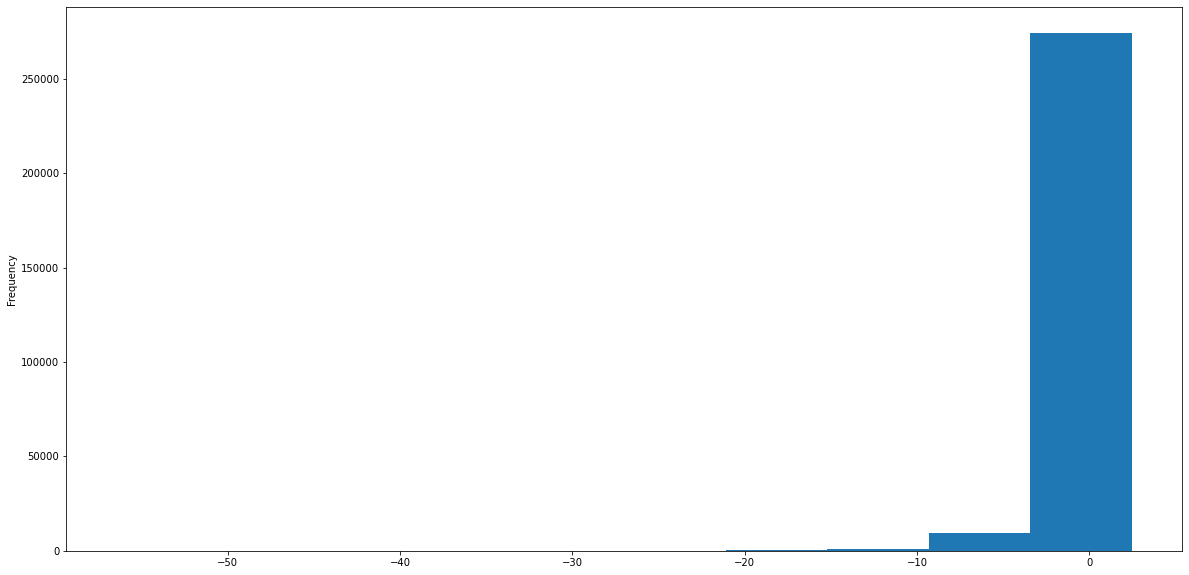

In [10]:
mcmccreditcard['V1'].plot.hist()
#Very strange actual distribution. It sort of mirrors a very skewed beta 
#distribution.

In [13]:
stddev = np.std(mcmccreditcard['V1'])
stddev

1.9586923652174186

In [14]:
mean = np.mean(mcmccreditcard['V1'])
mean

1.1683749838001528e-15

In [15]:
#reshaping values for easier calculation
trainX = trainX.values.reshape(trainX.shape[0])
testX = testX.values.reshape(testX.shape[0])
trainY = trainY.values
testY = testY.values

In [16]:
with pm.Model() as model:
    xtrain = pm.Data('x', trainX)
    ytrain = pm.Data('y', trainY)
    a = pm.Normal('a', mu = 0, sd=10)
    b = pm.Beta('b', alpha = 5, beta = 1)
    mu = a + np.dot(xtrain, b)
    theta = pm.Deterministic('theta', pm.math.sigmoid(mu))
    boundary = pm.Deterministic('boundary', -a/b)
    y = pm.Bernoulli('ypred', p=theta, observed=trainY)
    trace = pm.sample(500, tune=500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b, a]


Sampling 4 chains for 500 tune and 500 draw iterations (2_000 + 2_000 draws total) took 174 seconds.
The acceptance probability does not match the target. It is 0.8967063491257788, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8883342029028738, but should be close to 0.8. Try to increase the number of tuning steps.


Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'b'}>,
        <AxesSubplot:title={'center':'b'}>],
       [<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'a'}>],
       [<AxesSubplot:title={'center':'boundary'}>,
        <AxesSubplot:title={'center':'boundary'}>]], dtype=object)

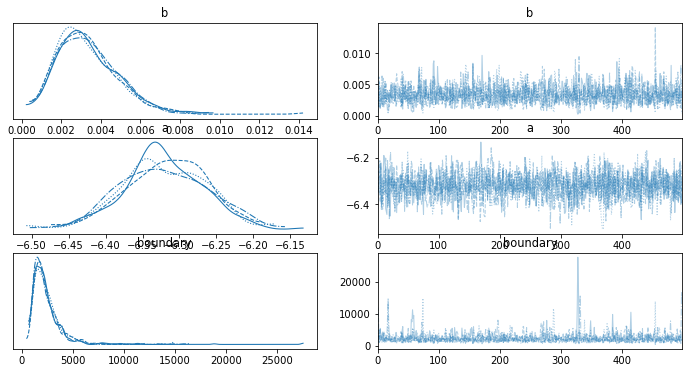

In [17]:
az.plot_trace(trace, var_names = ('b', 'a', 'boundary'))

Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'b'}>,
        <AxesSubplot:title={'center':'theta\n0'}>,
        <AxesSubplot:title={'center':'theta\n1'}>],
       [<AxesSubplot:title={'center':'theta\n2'}>,
        <AxesSubplot:title={'center':'theta\n3'}>,
        <AxesSubplot:title={'center':'theta\n4'}>,
        <AxesSubplot:title={'center':'theta\n5'}>],
       [<AxesSubplot:title={'center':'theta\n6'}>,
        <AxesSubplot:title={'center':'theta\n7'}>,
        <AxesSubplot:title={'center':'theta\n8'}>,
        <AxesSubplot:title={'center':'theta\n9'}>],
       [<AxesSubplot:title={'center':'theta\n10'}>,
        <AxesSubplot:title={'center':'theta\n11'}>,
        <AxesSubplot:title={'center':'theta\n12'}>,
        <AxesSubplot:title={'center':'theta\n13'}>],
       [<AxesSubplot:title={'center':'theta\n14'}>,
        <AxesSubplot:title={'center':'theta\n15'}>,
        <AxesSubplot:title={'center':'theta\n16'}>,
        <AxesSubplot:title={'cente

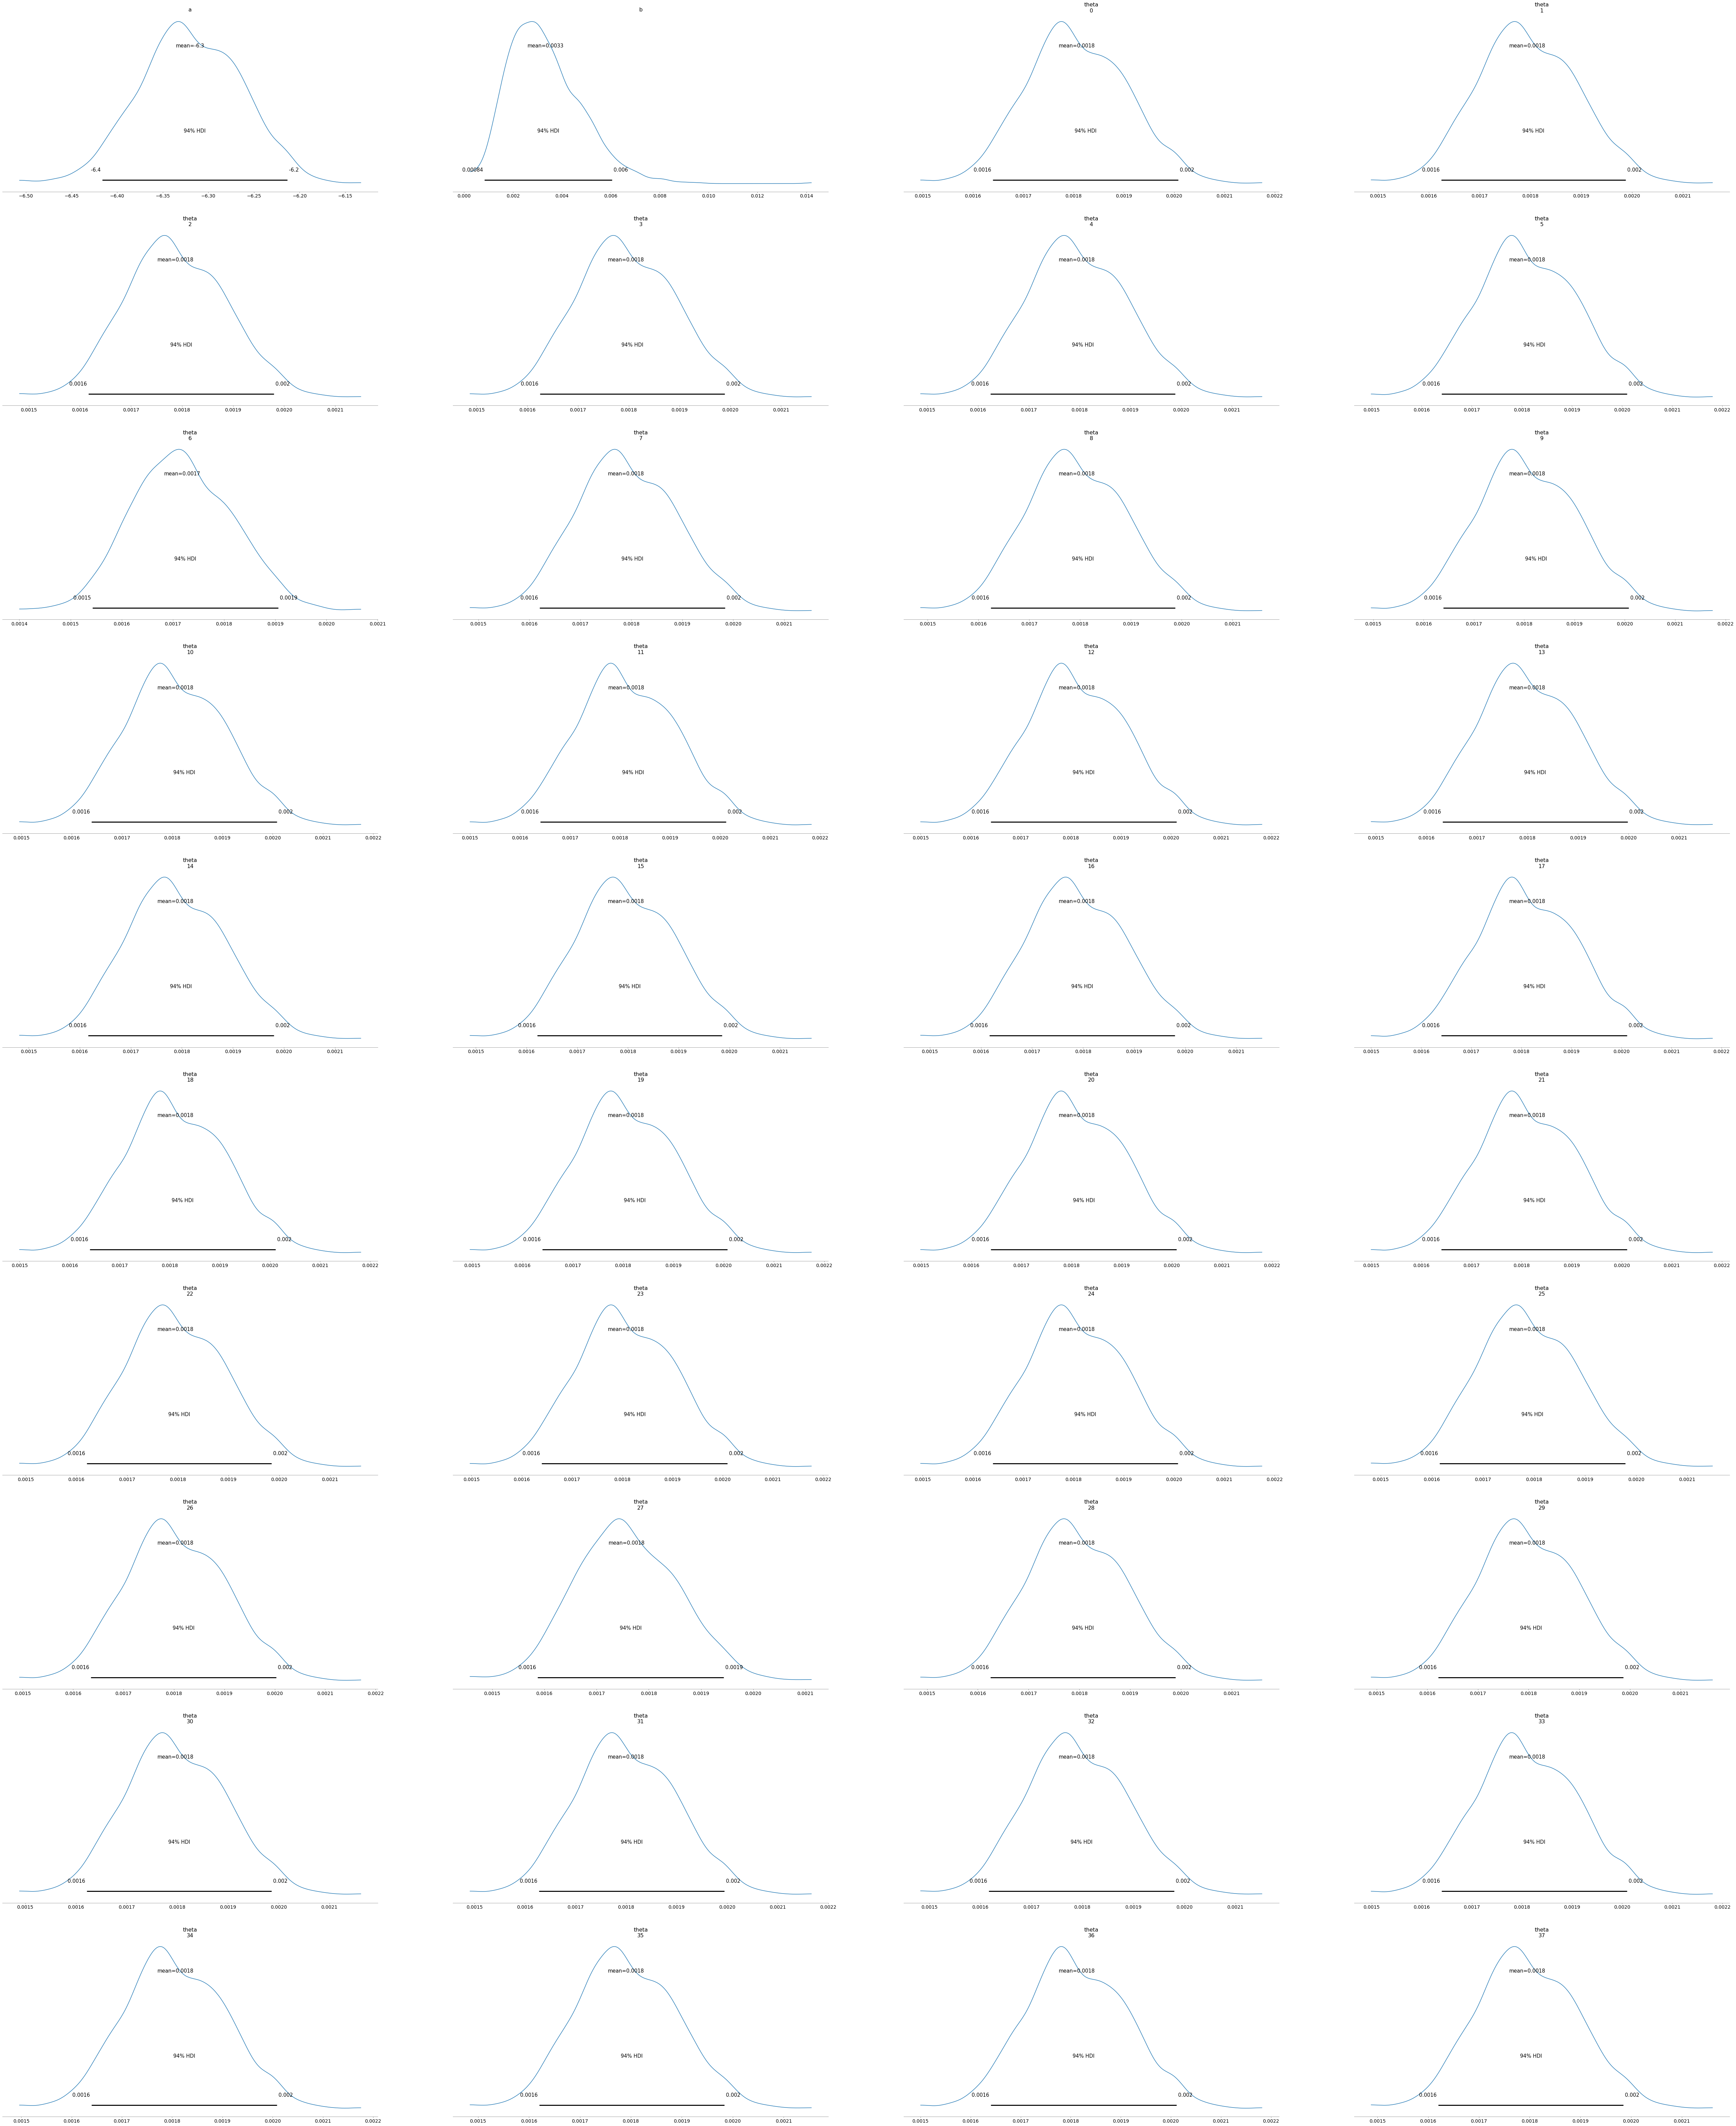

In [18]:
az.plot_posterior(trace)

Got error No model on context stack. trying to find log_likelihood in translation.


<AxesSubplot:xlabel='ypred / ypred'>

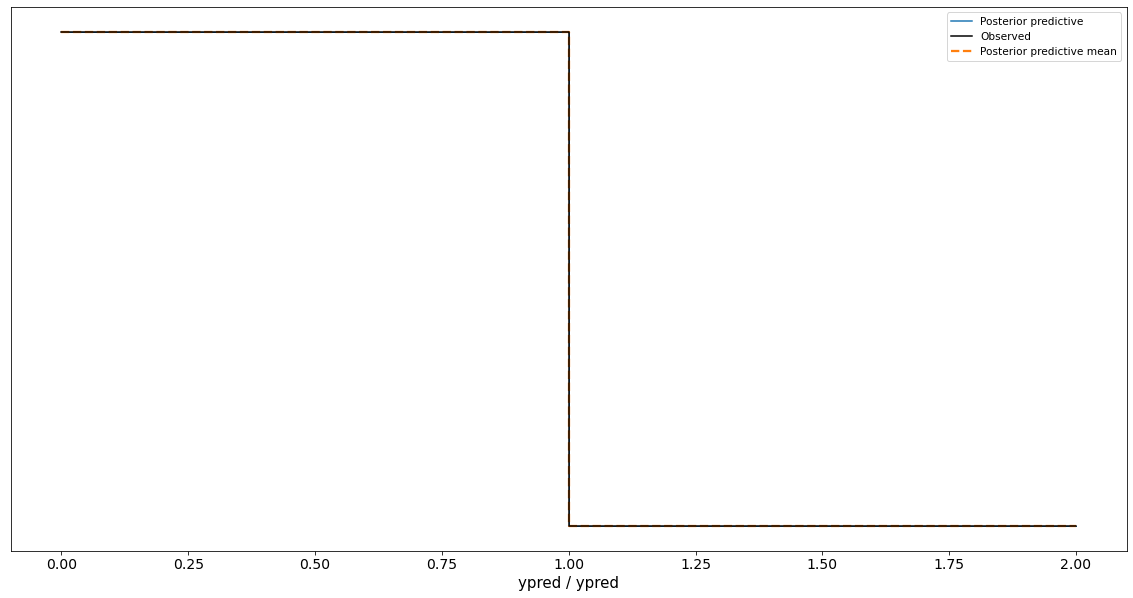

In [19]:
priorp = pm.sample_prior_predictive(model =model)
postp = pm.sample_posterior_predictive(model=model,trace=trace)
data = az.from_pymc3(trace=trace, posterior_predictive=postp, prior = priorp)
az.plot_ppc(data)

The plot shows that the class labels have been captured by the posterior.

### Predicting for Test Data

In [20]:
with model:
    pm.set_data({'x':testX})
    predictions = pm.sample_posterior_predictive(trace)
pred = np.mean(predictions['ypred'],axis=0)
finalpredictions = []
for prediction in pred:
    if (prediction<0.5):
        finalpredictions.append(0)
    else:
        finalpredictions.append(1)

In [23]:
Accuracy_Score = acs(testY, finalpredictions)*100
print("The Accuracy Score is\n", Accuracy_Score)
precision = pscore(testY, finalpredictions, average = 'macro', labels = [0,1])*100
print("The Precision is", precision)
CReport = crep(testY, finalpredictions)
print("The Classification Report is\n", CReport)
RecallScore = rscore(testY, finalpredictions,average = 'macro',labels=[0,1])*100
print("The Recall Score is", RecallScore)
FScore = f1score(testY, finalpredictions, average = 'weighted')
print("The F-Score is", FScore)
fpr, tpr, _ = roccurve(testY, finalpredictions)
AreaUnderCurve = auc(fpr, tpr)
print("The Area Under the Curve is", AreaUnderCurve)

The Accuracy Score is
 99.84146743698597
The Precision is 49.92073371849298
The Classification Report is
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.00      0.00      0.00       149

    accuracy                           1.00     93987
   macro avg       0.50      0.50      0.50     93987
weighted avg       1.00      1.00      1.00     93987

The Recall Score is 50.0
The F-Score is 0.9976226403675644
The Area Under the Curve is 0.5


Here we see that at least the NUTS method is yielding better results than Gibbs sampling in terms of F-Score. Which means the classificaiton is better. Otherwise, the results aren't better than the ones achieved through traditional machine learning methods.

## Predictive Maintenance Dataset

In [241]:
predmaint

ï»¿UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0          1     M14860    M                298.1                    308.6   
1          2     L47181    L                298.2                    308.7   
2          3     L47182    L                298.1                    308.5   
3          4     L47183    L                298.2                    308.6   
4          5     L47184    L                298.2                    308.7   
...      ...        ...  ...                  ...                      ...   
9995    9996     M24855    M                298.8                    308.4   
9996    9997     H39410    H                298.9                    308.4   
9997    9998     M24857    M                299.0                    308.6   
9998    9999     H39412    H                299.0                    308.7   
9999   10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                       1551         42.8                0                0   
1                       1408         46.3                3                0   
2                       1498         49.4                5                0   
3                       1433         39.5                7                0   
4                       1408         40.0                9                0   
...                      ...          ...              ...              ...   
9995                    1604         29.5               14                0   
9996                    1632         31.8               17                0   
9997                    1645         33.4               22                0   
9998                    1408         48.5               25                0   
9999                    1500         40.2               30                0   

      TWF  HDF  PWF  OSF  RNF  
0       0    0    0    0    0  
1       0    0    0    0    0  
2       0    0    0    0    0  
3       0    0    0    0    0  
4       0    0    0    0    0  
...   ...  ...  ...  ...  ...  
9995    0    0    0    0    0  
9996    0    0    0    0    0  
9997    0    0    0    0    0  
9998    0    0    0    0    0  
9999    0    0    0    0    0  

[10000 rows x 14 columns]

In [140]:
means

[1.1683749838001528e-15,
 3.416908049651284e-16,
 -1.379536707896593e-15,
 2.0740951198584196e-15,
 9.604066317127324e-16,
 1.4873130132010145e-15]

In [242]:
#removing unnecessary column
predmaint = remcol(predmaint)

which column do you want to remove?
ï»¿UDI
which column do you want to remove?



In [243]:
predmaint

Product ID Type  Air temperature [K]  Process temperature [K]  \
0        M14860    M                298.1                    308.6   
1        L47181    L                298.2                    308.7   
2        L47182    L                298.1                    308.5   
3        L47183    L                298.2                    308.6   
4        L47184    L                298.2                    308.7   
...         ...  ...                  ...                      ...   
9995     M24855    M                298.8                    308.4   
9996     H39410    H                298.9                    308.4   
9997     M24857    M                299.0                    308.6   
9998     H39412    H                299.0                    308.7   
9999     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                       1551         42.8                0                0   
1                       1408         46.3                3                0   
2                       1498         49.4                5                0   
3                       1433         39.5                7                0   
4                       1408         40.0                9                0   
...                      ...          ...              ...              ...   
9995                    1604         29.5               14                0   
9996                    1632         31.8               17                0   
9997                    1645         33.4               22                0   
9998                    1408         48.5               25                0   
9999                    1500         40.2               30                0   

      TWF  HDF  PWF  OSF  RNF  
0       0    0    0    0    0  
1       0    0    0    0    0  
2       0    0    0    0    0  
3       0    0    0    0    0  
4       0    0    0    0    0  
...   ...  ...  ...  ...  ...  
9995    0    0    0    0    0  
9996    0    0    0    0    0  
9997    0    0    0    0    0  
9998    0    0    0    0    0  
9999    0    0    0    0    0  

[10000 rows x 13 columns]

In [244]:
#Checking for class imbalance in label column
predmaint[predmaint['Machine failure']==1]
#severe class imbalance in label (approx. 96%/4% split in favour of 0/1)

Product ID Type  Air temperature [K]  Process temperature [K]  \
50       L47230    L                298.9                    309.1   
69       L47249    L                298.9                    309.0   
77       L47257    L                298.8                    308.9   
160      L47340    L                298.4                    308.2   
161      L47341    L                298.3                    308.1   
...         ...  ...                  ...                      ...   
9758     L56938    L                298.6                    309.8   
9764     L56944    L                298.5                    309.5   
9822     L57002    L                298.5                    309.4   
9830     L57010    L                298.3                    309.3   
9974     L57154    L                298.6                    308.2   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
50                      2861          4.6              143                1   
69                      1410         65.7              191                1   
77                      1455         41.3              208                1   
160                     1282         60.7              216                1   
161                     1412         52.3              218                1   
...                      ...          ...              ...              ...   
9758                    2271         16.2              218                1   
9764                    1294         66.7               12                1   
9822                    1360         60.9              187                1   
9830                    1337         56.1              206                1   
9974                    1361         68.2              172                1   

      TWF  HDF  PWF  OSF  RNF  
50      0    0    1    0    0  
69      0    0    1    1    0  
77      1    0    0    0    0  
160     0    0    0    1    0  
161     0    0    0    1    0  
...   ...  ...  ...  ...  ...  
9758    1    0    0    0    0  
9764    0    0    1    0    0  
9822    0    0    0    1    0  
9830    0    0    0    1    0  
9974    0    0    1    1    0  

[339 rows x 13 columns]

In [245]:
description(predmaint, 15)

The columns and rows of the dataset are (10000, 13)
The number of values in the dataset is 130000
   Product ID Type  Air temperature [K]  Process temperature [K]  \
0      M14860    M                298.1                    308.6   
1      L47181    L                298.2                    308.7   
2      L47182    L                298.1                    308.5   
3      L47183    L                298.2                    308.6   
4      L47184    L                298.2                    308.7   
5      M14865    M                298.1                    308.6   
6      L47186    L                298.1                    308.6   
7      L47187    L                298.1                    308.6   
8      M14868    M                298.3                    308.7   
9      M14869    M                298.5                    309.0   
10     H29424    H                298.4                    308.9   
11     H29425    H                298.6                    309.1   
12     M14872    M

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
count         10000.000000             10000.000000            10000.000000   
mean            300.004930               310.005560             1538.776100   
std               2.000259                 1.483734              179.284096   
min             295.300000               305.700000             1168.000000   
25%             298.300000               308.800000             1423.000000   
50%             300.100000               310.100000             1503.000000   
75%             301.500000               311.100000             1612.000000   
max             304.500000               313.800000             2886.000000   

        Torque [Nm]  Tool wear [min]  Machine failure           TWF  \
count  10000.000000     10000.000000     10000.000000  10000.000000   
mean      39.986910       107.951000         0.033900      0.004600   
std        9.968934        63.654147         0.180981      0.067671   
min        3.800000         0.000000         0.000000      0.000000   
25%       33.200000        53.000000         0.000000      0.000000   
50%       40.100000       108.000000         0.000000      0.000000   
75%       46.800000       162.000000         0.000000      0.000000   
max       76.600000       253.000000         1.000000      1.000000   

                HDF           PWF           OSF          RNF  
count  10000.000000  10000.000000  10000.000000  10000.00000  
mean       0.011500      0.009500      0.009800      0.00190  
std        0.106625      0.097009      0.098514      0.04355  
min        0.000000      0.000000      0.000000      0.00000  
25%        0.000000      0.000000      0.000000      0.00000  
50%        0.000000      0.000000      0.000000      0.00000  
75%        0.000000      0.000000      0.000000      0.00000  
max        1.000000      1.000000      1.000000      1.00000

In [246]:
null(predmaint)
#no null values

Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

What analysis do you want to do? (missingval, totalmissingval, or correlation, dendogram)missingval


<AxesSubplot:>

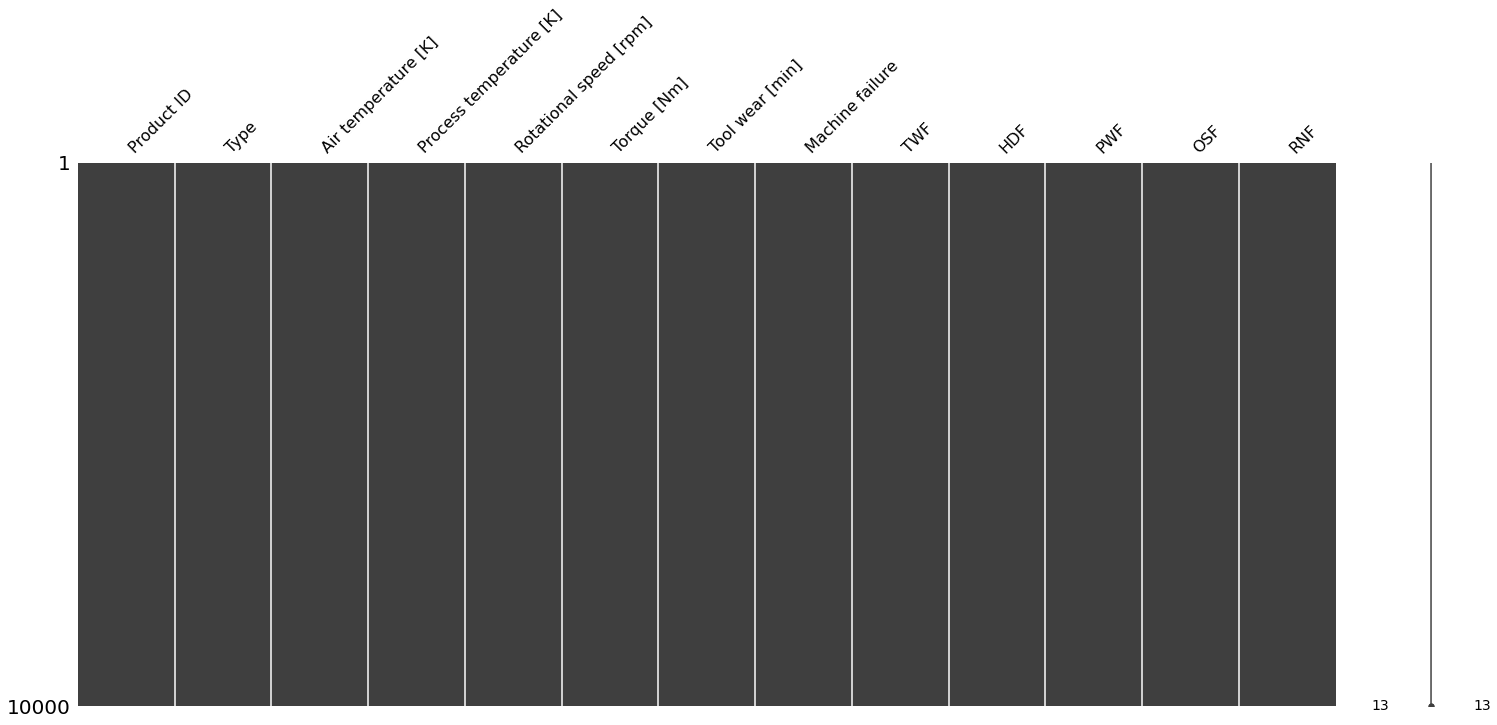

In [247]:
missval(predmaint)
#no null values

In [249]:
np.where(pd.isnull(predmaint))
#no blank values

(array([], dtype=int64), array([], dtype=int64))

In [250]:
#Removing Product ID since it's of no consequence to us in the analysis
predmaint = remcol(predmaint)

which column do you want to remove?
Product ID
which column do you want to remove?



In [251]:
#Analyzing columns
predmaint

Type  Air temperature [K]  Process temperature [K]  \
0       M                298.1                    308.6   
1       L                298.2                    308.7   
2       L                298.1                    308.5   
3       L                298.2                    308.6   
4       L                298.2                    308.7   
...   ...                  ...                      ...   
9995    M                298.8                    308.4   
9996    H                298.9                    308.4   
9997    M                299.0                    308.6   
9998    H                299.0                    308.7   
9999    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                       1551         42.8                0                0   
1                       1408         46.3                3                0   
2                       1498         49.4                5                0   
3                       1433         39.5                7                0   
4                       1408         40.0                9                0   
...                      ...          ...              ...              ...   
9995                    1604         29.5               14                0   
9996                    1632         31.8               17                0   
9997                    1645         33.4               22                0   
9998                    1408         48.5               25                0   
9999                    1500         40.2               30                0   

      TWF  HDF  PWF  OSF  RNF  
0       0    0    0    0    0  
1       0    0    0    0    0  
2       0    0    0    0    0  
3       0    0    0    0    0  
4       0    0    0    0    0  
...   ...  ...  ...  ...  ...  
9995    0    0    0    0    0  
9996    0    0    0    0    0  
9997    0    0    0    0    0  
9998    0    0    0    0    0  
9999    0    0    0    0    0  

[10000 rows x 12 columns]

In [252]:
predmaint['Tool wear [min]'].value_counts()
#numerical column

0      120
2       69
5       63
7       58
59      58
      ... 
237      1
239      1
241      1
251      1
253      1
Name: Tool wear [min], Length: 246, dtype: int64

In [253]:
predmaint['Type'].value_counts()
#column has values pertaining to low, medium, and high quality variants of car models. Can be encoded.

L    6000
M    2997
H    1003
Name: Type, dtype: int64

In [254]:
def labelencoder(dataset):
    colname = str(input("Which column do you want to encode?"))
    le = preprocessing.LabelEncoder()
    le.fit(dataset[colname])
    dataset[colname] = le.transform(dataset[colname])
    return dataset

In [255]:
predmaint = labelencoder(predmaint)

Which column do you want to encode?Type


In [257]:
predmaint['Type'].value_counts()
#column encoded

1    6000
2    2997
0    1003
Name: Type, dtype: int64

In [258]:
predmaint

Type  Air temperature [K]  Process temperature [K]  \
0        2                298.1                    308.6   
1        1                298.2                    308.7   
2        1                298.1                    308.5   
3        1                298.2                    308.6   
4        1                298.2                    308.7   
...    ...                  ...                      ...   
9995     2                298.8                    308.4   
9996     0                298.9                    308.4   
9997     2                299.0                    308.6   
9998     0                299.0                    308.7   
9999     2                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                       1551         42.8                0                0   
1                       1408         46.3                3                0   
2                       1498         49.4                5                0   
3                       1433         39.5                7                0   
4                       1408         40.0                9                0   
...                      ...          ...              ...              ...   
9995                    1604         29.5               14                0   
9996                    1632         31.8               17                0   
9997                    1645         33.4               22                0   
9998                    1408         48.5               25                0   
9999                    1500         40.2               30                0   

      TWF  HDF  PWF  OSF  RNF  
0       0    0    0    0    0  
1       0    0    0    0    0  
2       0    0    0    0    0  
3       0    0    0    0    0  
4       0    0    0    0    0  
...   ...  ...  ...  ...  ...  
9995    0    0    0    0    0  
9996    0    0    0    0    0  
9997    0    0    0    0    0  
9998    0    0    0    0    0  
9999    0    0    0    0    0  

[10000 rows x 12 columns]

In [259]:
description(predmaint, 5)
#Dataset seems clean. All values are numeric. Changing to float just to be safe. 

The columns and rows of the dataset are (10000, 12)
The number of values in the dataset is 120000
   Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0     2                298.1                    308.6                    1551   
1     1                298.2                    308.7                    1408   
2     1                298.1                    308.5                    1498   
3     1                298.2                    308.6                    1433   
4     1                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Machine failure  TWF  HDF  PWF  OSF  RNF  
0         42.8                0                0    0    0    0    0    0  
1         46.3                3                0    0    0    0    0    0  
2         49.4                5                0    0    0    0    0    0  
3         39.5                7                0    0    0    0    0    0  
4         40.0                9    

Type  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean       1.19940           300.004930               310.005560   
std        0.60023             2.000259                 1.483734   
min        0.00000           295.300000               305.700000   
25%        1.00000           298.300000               308.800000   
50%        1.00000           300.100000               310.100000   
75%        2.00000           301.500000               311.100000   
max        2.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]  Machine failure  \
count            10000.000000  10000.000000     10000.000000     10000.000000   
mean              1538.776100     39.986910       107.951000         0.033900   
std                179.284096      9.968934        63.654147         0.180981   
min               1168.000000      3.800000         0.000000         0.000000   
25%               1423.000000     33.200000        53.000000         0.000000   
50%               1503.000000     40.100000       108.000000         0.000000   
75%               1612.000000     46.800000       162.000000         0.000000   
max               2886.000000     76.600000       253.000000         1.000000   

                TWF           HDF           PWF           OSF          RNF  
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.00000  
mean       0.004600      0.011500      0.009500      0.009800      0.00190  
std        0.067671      0.106625      0.097009      0.098514      0.04355  
min        0.000000      0.000000      0.000000      0.000000      0.00000  
25%        0.000000      0.000000      0.000000      0.000000      0.00000  
50%        0.000000      0.000000      0.000000      0.000000      0.00000  
75%        0.000000      0.000000      0.000000      0.000000      0.00000  
max        1.000000      1.000000      1.000000      1.000000      1.00000

Columns TWF, HDF, PWF, OSF, and RNF all correspond to types of failure. Incorporating all of them into a single columncan result in multiclass labeling. Otherwise, we will have no choice but to delete these columns because they will directly skew the results in favor of overfitting. They are classifications after the fact of Machine Failure. Notfeatures of the problem. 

In [260]:
#Creating a subdataset to analyze whether columns TWF, HDF, PWF, OSF, and RNF all correspond to Machine Failure
nofailure = predmaint[predmaint['Machine failure']==0]

In [261]:
nofailure

Type  Air temperature [K]  Process temperature [K]  \
0        2                298.1                    308.6   
1        1                298.2                    308.7   
2        1                298.1                    308.5   
3        1                298.2                    308.6   
4        1                298.2                    308.7   
...    ...                  ...                      ...   
9995     2                298.8                    308.4   
9996     0                298.9                    308.4   
9997     2                299.0                    308.6   
9998     0                299.0                    308.7   
9999     2                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                       1551         42.8                0                0   
1                       1408         46.3                3                0   
2                       1498         49.4                5                0   
3                       1433         39.5                7                0   
4                       1408         40.0                9                0   
...                      ...          ...              ...              ...   
9995                    1604         29.5               14                0   
9996                    1632         31.8               17                0   
9997                    1645         33.4               22                0   
9998                    1408         48.5               25                0   
9999                    1500         40.2               30                0   

      TWF  HDF  PWF  OSF  RNF  
0       0    0    0    0    0  
1       0    0    0    0    0  
2       0    0    0    0    0  
3       0    0    0    0    0  
4       0    0    0    0    0  
...   ...  ...  ...  ...  ...  
9995    0    0    0    0    0  
9996    0    0    0    0    0  
9997    0    0    0    0    0  
9998    0    0    0    0    0  
9999    0    0    0    0    0  

[9661 rows x 12 columns]

In [262]:
nofailure['TWF'].value_counts()

0    9661
Name: TWF, dtype: int64

In [263]:
nofailure['HDF'].value_counts()

0    9661
Name: HDF, dtype: int64

In [264]:
nofailure['PWF'].value_counts()

0    9661
Name: PWF, dtype: int64

In [265]:
nofailure['OSF'].value_counts()

0    9661
Name: OSF, dtype: int64

In [266]:
nofailure['RNF'].value_counts()
#here we see discrepancy in the dataset. 18 positive instances of RNF (random failure) fall within negative instances 
#of Machine Failure. This needs fixing. 

0    9643
1      18
Name: RNF, dtype: int64

In [267]:
idx = nofailure[nofailure['RNF']==1].index
#getting index values of dataset rows where discrepancy has occurred

In [268]:
idx
#index values

Int64Index([1221, 1302, 1748, 2072, 2559, 3065, 3452, 5471, 5489, 5495, 5509,
            5553, 5639, 6091, 6913, 6960, 7488, 7868],
           dtype='int64')

In [269]:
predmaint.loc[idx, 'Machine failure']=1
#setting values of Machine failure column rows to 1 where discrepancy occurred

In [270]:
#Rechecking
nofailure = predmaint[predmaint['Machine failure']==0]

In [271]:
nofailure['RNF'].value_counts()
#problem solved here, ehecking other columns again

0    9643
Name: RNF, dtype: int64

In [272]:
nofailure['TWF'].value_counts()

0    9643
Name: TWF, dtype: int64

In [273]:
nofailure['HDF'].value_counts()

0    9643
Name: HDF, dtype: int64

In [274]:
nofailure['PWF'].value_counts()

0    9643
Name: PWF, dtype: int64

In [275]:
nofailure['OSF'].value_counts()
#Discrepancy fixed.

0    9643
Name: OSF, dtype: int64

### Creating New Label Column

In [276]:
predmaint['Machine Failure Type'] = 0
#Right now the label column is filled with 0 values

In [277]:
predmaint

Type  Air temperature [K]  Process temperature [K]  \
0        2                298.1                    308.6   
1        1                298.2                    308.7   
2        1                298.1                    308.5   
3        1                298.2                    308.6   
4        1                298.2                    308.7   
...    ...                  ...                      ...   
9995     2                298.8                    308.4   
9996     0                298.9                    308.4   
9997     2                299.0                    308.6   
9998     0                299.0                    308.7   
9999     2                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                       1551         42.8                0                0   
1                       1408         46.3                3                0   
2                       1498         49.4                5                0   
3                       1433         39.5                7                0   
4                       1408         40.0                9                0   
...                      ...          ...              ...              ...   
9995                    1604         29.5               14                0   
9996                    1632         31.8               17                0   
9997                    1645         33.4               22                0   
9998                    1408         48.5               25                0   
9999                    1500         40.2               30                0   

      TWF  HDF  PWF  OSF  RNF  Machine Failure Type  
0       0    0    0    0    0                     0  
1       0    0    0    0    0                     0  
2       0    0    0    0    0                     0  
3       0    0    0    0    0                     0  
4       0    0    0    0    0                     0  
...   ...  ...  ...  ...  ...                   ...  
9995    0    0    0    0    0                     0  
9996    0    0    0    0    0                     0  
9997    0    0    0    0    0                     0  
9998    0    0    0    0    0                     0  
9999    0    0    0    0    0                     0  

[10000 rows x 13 columns]

In [278]:
#Creating subset of original dataset with all positive failure values
failure = predmaint[predmaint['Machine failure']==1]

In [279]:
failure

Type  Air temperature [K]  Process temperature [K]  \
50       1                298.9                    309.1   
69       1                298.9                    309.0   
77       1                298.8                    308.9   
160      1                298.4                    308.2   
161      1                298.3                    308.1   
...    ...                  ...                      ...   
9758     1                298.6                    309.8   
9764     1                298.5                    309.5   
9822     1                298.5                    309.4   
9830     1                298.3                    309.3   
9974     1                298.6                    308.2   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
50                      2861          4.6              143                1   
69                      1410         65.7              191                1   
77                      1455         41.3              208                1   
160                     1282         60.7              216                1   
161                     1412         52.3              218                1   
...                      ...          ...              ...              ...   
9758                    2271         16.2              218                1   
9764                    1294         66.7               12                1   
9822                    1360         60.9              187                1   
9830                    1337         56.1              206                1   
9974                    1361         68.2              172                1   

      TWF  HDF  PWF  OSF  RNF  Machine Failure Type  
50      0    0    1    0    0                     0  
69      0    0    1    1    0                     0  
77      1    0    0    0    0                     0  
160     0    0    0    1    0                     0  
161     0    0    0    1    0                     0  
...   ...  ...  ...  ...  ...                   ...  
9758    1    0    0    0    0                     0  
9764    0    0    1    0    0                     0  
9822    0    0    0    1    0                     0  
9830    0    0    0    1    0                     0  
9974    0    0    1    1    0                     0  

[357 rows x 13 columns]

#### Setting number for each type of Machine failure
#### TWF = 1
#### HDF = 2
#### PWF = 3
#### OSF = 4
#### RNF = 5

In [280]:
#Extracting indexes of dataset which correspond to different types of machine failure
idx1 = failure[failure['TWF']==1].index
idx2 = failure[failure['HDF']==1].index
idx3 = failure[failure['PWF']==1].index
idx4 = failure[failure['OSF']==1].index
idx5 = failure[failure['RNF']==1].index

Replacing rows in Machine Failure Type column with assigned values for each machine failure type at the extracted indexes.

In [281]:
predmaint.loc[idx1, 'Machine Failure Type']=1
predmaint.loc[idx2, 'Machine Failure Type']=2
predmaint.loc[idx3, 'Machine Failure Type']=3
predmaint.loc[idx4, 'Machine Failure Type']=4
predmaint.loc[idx5, 'Machine Failure Type']=5

In [282]:
predmaint['Machine Failure Type'].value_counts()

0    9652
2     106
4      98
3      83
1      42
5      19
Name: Machine Failure Type, dtype: int64

In [283]:
predmaint['Machine failure'].value_counts()

0    9643
1     357
Name: Machine failure, dtype: int64

There are discrepancies between the Machine failure and Machine Failure Type columns

In [284]:
nofail = predmaint[predmaint['Machine Failure Type']==0]

In [285]:
nofail[nofail['Machine failure']==1]
#Aha! So there is still a discrepancy. This may perhaps be a machine failure type that doesn't fall into either TWF, 
#HDF, PWF, OSF, or RNF. Signifying this type of machine failure type (other) in Machine Failure Type column with '6'. 

Type  Air temperature [K]  Process temperature [K]  \
1437     0                298.8                    309.9   
2749     2                299.7                    309.2   
4044     2                301.9                    310.9   
4684     2                303.6                    311.8   
5536     2                302.3                    311.8   
5941     1                300.6                    310.7   
6478     1                300.5                    309.8   
8506     1                298.4                    309.6   
9015     1                297.2                    308.1   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
1437                    1439         45.2               40                1   
2749                    1685         28.9              179                1   
4044                    1419         47.7               20                1   
4684                    1421         44.8              101                1   
5536                    1363         54.0              119                1   
5941                    1438         48.5               78                1   
6478                    1663         29.1              145                1   
8506                    1710         27.3              163                1   
9015                    1431         49.7              210                1   

      TWF  HDF  PWF  OSF  RNF  Machine Failure Type  
1437    0    0    0    0    0                     0  
2749    0    0    0    0    0                     0  
4044    0    0    0    0    0                     0  
4684    0    0    0    0    0                     0  
5536    0    0    0    0    0                     0  
5941    0    0    0    0    0                     0  
6478    0    0    0    0    0                     0  
8506    0    0    0    0    0                     0  
9015    0    0    0    0    0                     0

In [286]:
idx6 = nofail[nofail['Machine failure']==1].index

In [287]:
predmaint.loc[idx6, 'Machine Failure Type']=6

In [288]:
predmaint['Machine Failure Type'].value_counts()

0    9643
2     106
4      98
3      83
1      42
5      19
6       9
Name: Machine Failure Type, dtype: int64

In [289]:
predmaint['Machine failure'].value_counts()

0    9643
1     357
Name: Machine failure, dtype: int64

Discrepancy fully rectified

In [290]:
#Deleting all other label columns which feature machine failure types
predmaint = remcol(predmaint)

which column do you want to remove?
Machine failure
which column do you want to remove?
TWF
which column do you want to remove?
HDF
which column do you want to remove?
PWF
which column do you want to remove?
OSF
which column do you want to remove?
RNF
which column do you want to remove?



In [291]:
predmaint

Type  Air temperature [K]  Process temperature [K]  \
0        2                298.1                    308.6   
1        1                298.2                    308.7   
2        1                298.1                    308.5   
3        1                298.2                    308.6   
4        1                298.2                    308.7   
...    ...                  ...                      ...   
9995     2                298.8                    308.4   
9996     0                298.9                    308.4   
9997     2                299.0                    308.6   
9998     0                299.0                    308.7   
9999     2                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  \
0                       1551         42.8                0   
1                       1408         46.3                3   
2                       1498         49.4                5   
3                       1433         39.5                7   
4                       1408         40.0                9   
...                      ...          ...              ...   
9995                    1604         29.5               14   
9996                    1632         31.8               17   
9997                    1645         33.4               22   
9998                    1408         48.5               25   
9999                    1500         40.2               30   

      Machine Failure Type  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  
...                    ...  
9995                     0  
9996                     0  
9997                     0  
9998                     0  
9999                     0  

[10000 rows x 7 columns]

In [292]:
predmaint = changedtype(predmaint)
#dataset clean and ready for analysis

which column do you want to change the data type for? Press enter if you want to change the data type for the entire dataset. 
what data type do you want to set the column to? (string, numbers, datetime)float


In [308]:
#saving cleaned dataset
predmaint.to_csv('predmaint.csv')

### Accounting for Class Imbalance
There is a huge class imbalance in the dataset. Let's try to cater for it. 

In [298]:
#Splitting dataset
X = predmaint.iloc[:, :-1]
y = predmaint['Machine Failure Type']

In [299]:
X

Type  Air temperature [K]  Process temperature [K]  \
0      2.0                298.1                    308.6   
1      1.0                298.2                    308.7   
2      1.0                298.1                    308.5   
3      1.0                298.2                    308.6   
4      1.0                298.2                    308.7   
...    ...                  ...                      ...   
9995   2.0                298.8                    308.4   
9996   0.0                298.9                    308.4   
9997   2.0                299.0                    308.6   
9998   0.0                299.0                    308.7   
9999   2.0                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  
0                     1551.0         42.8              0.0  
1                     1408.0         46.3              3.0  
2                     1498.0         49.4              5.0  
3                     1433.0         39.5              7.0  
4                     1408.0         40.0              9.0  
...                      ...          ...              ...  
9995                  1604.0         29.5             14.0  
9996                  1632.0         31.8             17.0  
9997                  1645.0         33.4             22.0  
9998                  1408.0         48.5             25.0  
9999                  1500.0         40.2             30.0  

[10000 rows x 6 columns]

In [300]:
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9995    0.0
9996    0.0
9997    0.0
9998    0.0
9999    0.0
Name: Machine Failure Type, Length: 10000, dtype: float64

In [305]:
#Undersampling
X,y = Usampler(X,y)

Original dataset shape Counter({0.0: 9, 1.0: 9, 2.0: 9, 3.0: 9, 4.0: 9, 5.0: 9, 6.0: 9})
Resampled dataset shape Counter({0.0: 9, 1.0: 9, 2.0: 9, 3.0: 9, 4.0: 9, 5.0: 9, 6.0: 9})


In [306]:
#reconstructing dataset
usampled = X
usampled['Machine Failure Type'] = y

In [307]:
usampled
#This dataset is extremely small. It won't do for analysis purposes. It won't capture the full extent of the dataset's
#variance or complexity. Discarding

Type  Air temperature [K]  Process temperature [K]  \
0    2.0                300.5                    311.3   
1    2.0                298.1                    308.3   
2    2.0                300.4                    309.9   
3    1.0                303.7                    313.0   
4    1.0                297.6                    308.4   
..   ...                  ...                      ...   
58   2.0                303.6                    311.8   
59   2.0                299.7                    309.2   
60   0.0                298.8                    309.9   
61   2.0                302.3                    311.8   
62   1.0                300.5                    309.8   

    Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine Failure Type  
0                   1507.0         43.4             41.0                   0.0  
1                   1453.0         41.5            204.0                   0.0  
2                   1415.0         31.8            192.0                   0.0  
3                   1753.0         29.0             42.0                   0.0  
4                   1460.0         40.3            195.0                   0.0  
..                     ...          ...              ...                   ...  
58                  1421.0         44.8            101.0                   6.0  
59                  1685.0         28.9            179.0                   6.0  
60                  1439.0         45.2             40.0                   6.0  
61                  1363.0         54.0            119.0                   6.0  
62                  1663.0         29.1            145.0                   6.0  

[63 rows x 7 columns]

In [311]:
#Splitting dataset
X = predmaint.iloc[:, :-1]
y = predmaint['Machine Failure Type']

In [312]:
#Oversampling
X,y = Osampler(X,y)

Original dataset shape Counter({0.0: 9643, 2.0: 106, 4.0: 98, 3.0: 83, 1.0: 42, 5.0: 19, 6.0: 9})
Resampled dataset shape Counter({0.0: 9643, 3.0: 9643, 4.0: 9643, 1.0: 9643, 5.0: 9643, 6.0: 9643, 2.0: 9643})


In [313]:
#reconstructing dataset
Osampled = X
Osampled['Machine Failure Type'] = y

In [314]:
Osampled
#This dataset is of a size that is appropriate for analysis.

Type  Air temperature [K]  Process temperature [K]  \
0       2.0                298.1                    308.6   
1       1.0                298.2                    308.7   
2       1.0                298.1                    308.5   
3       1.0                298.2                    308.6   
4       1.0                298.2                    308.7   
...     ...                  ...                      ...   
67496   2.0                303.6                    311.8   
67497   2.0                303.6                    311.8   
67498   1.0                300.5                    309.8   
67499   1.0                300.5                    309.8   
67500   1.0                300.6                    310.7   

       Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  \
0                      1551.0         42.8              0.0   
1                      1408.0         46.3              3.0   
2                      1498.0         49.4              5.0   
3                      1433.0         39.5              7.0   
4                      1408.0         40.0              9.0   
...                       ...          ...              ...   
67496                  1421.0         44.8            101.0   
67497                  1421.0         44.8            101.0   
67498                  1663.0         29.1            145.0   
67499                  1663.0         29.1            145.0   
67500                  1438.0         48.5             78.0   

       Machine Failure Type  
0                       0.0  
1                       0.0  
2                       0.0  
3                       0.0  
4                       0.0  
...                     ...  
67496                   6.0  
67497                   6.0  
67498                   6.0  
67499                   6.0  
67500                   6.0  

[67501 rows x 7 columns]

In [315]:
predmaint = Osampled

### Applying DR and FS Techniques
#### 1. Linear Discriminant Analysis
#### 2. Principle Component Analysis
#### 3. t-SNE
#### 4. Lasso Regularization
#### 5. Random Forest Feature Selection

In [317]:
predmaintLDA = lda(predmaint)

What is the label column?Machine Failure Type


In [318]:
predmaintLDA

0         1         2         3         4         5  label
0     -0.206996 -2.696915 -1.383546 -0.425303 -2.022683 -0.082089    0.0
1      0.599078 -2.394581 -0.991797 -1.159851 -0.866241 -1.119120    0.0
2     -0.994694 -2.137290 -0.813486 -0.969544 -0.811203 -1.214433    0.0
3      1.766641 -2.633612 -1.144116 -0.881959 -0.867687 -1.227710    0.0
4      1.934171 -2.573990 -1.203522 -0.999608 -0.865743 -1.148302    0.0
...         ...       ...       ...       ...       ...       ...    ...
67496  1.123340 -1.362333  1.085494  0.614514 -0.461462  1.395227    6.0
67497  1.123340 -1.362333  1.085494  0.614514 -0.461462  1.395227    6.0
67498  1.905375 -0.511530 -0.226040  0.856570  0.236812 -0.589875    6.0
67499  1.905375 -0.511530 -0.226040  0.856570  0.236812 -0.589875    6.0
67500  0.152756 -0.881017 -0.370702 -0.889215  0.190586  0.076898    6.0

[67501 rows x 7 columns]

In [319]:
predmaintpca = pca(predmaint, 5)

What is the label column?Machine Failure Type


In [320]:
predmaintpca

0           1          2         3         4  label
0       33.444217  137.117598  -4.004758  3.670932 -0.410523    0.0
1     -109.602956  135.409438  -6.218172  3.703269  0.121486    0.0
2      -19.822537  132.706827   0.550156  3.724177  0.009891    0.0
3      -84.388517  131.056474 -11.921045  3.778200  0.052446    0.0
4     -109.406063  129.280495 -12.389498  3.742562  0.126309    0.0
...           ...         ...        ...       ...       ...    ...
67496  -97.475619   37.324257  -5.272146 -3.035778 -0.705453    6.0
67497  -97.475619   37.324257  -5.272146 -3.035778 -0.705453    6.0
67498  144.540958   -9.068540 -10.263742  0.276917 -0.224919    6.0
67499  144.540958   -9.068540 -10.263742  0.276917 -0.224919    6.0
67500  -80.420775   60.234413  -1.322640  0.144659  0.409755    6.0

[67501 rows x 6 columns]

In [321]:
predmainttsne = tdsne(predmaint,3)

What is the label column?Machine Failure Type


In [322]:
predmainttsne

0          1          2  label
0     -18.236397   1.939988  -0.554800    0.0
1       3.376060  11.195508  10.791866    0.0
2     -14.979232   0.252357   4.392533    0.0
3      -8.907598   3.863457  10.094201    0.0
4       2.978203  10.815405  10.839556    0.0
...          ...        ...        ...    ...
67496  -0.388009 -11.399419  -0.904784    6.0
67497  -1.159243  -9.284191  -4.044556    6.0
67498   5.490381   7.438942  -3.408771    6.0
67499   3.495539   7.999135  -3.148088    6.0
67500   1.802787  -0.241157   3.319134    6.0

[67501 rows x 4 columns]

In [323]:
predmaintlasso = lasso(predmaint)

What is the label columnMachine Failure Type
What is the label column?Machine Failure Type


In [324]:
predmaintlasso

0      1      2       3     4      5  label
0      2.0  298.1  308.6  1551.0  42.8    0.0    0.0
1      1.0  298.2  308.7  1408.0  46.3    3.0    0.0
2      1.0  298.1  308.5  1498.0  49.4    5.0    0.0
3      1.0  298.2  308.6  1433.0  39.5    7.0    0.0
4      1.0  298.2  308.7  1408.0  40.0    9.0    0.0
...    ...    ...    ...     ...   ...    ...    ...
67496  2.0  303.6  311.8  1421.0  44.8  101.0    6.0
67497  2.0  303.6  311.8  1421.0  44.8  101.0    6.0
67498  1.0  300.5  309.8  1663.0  29.1  145.0    6.0
67499  1.0  300.5  309.8  1663.0  29.1  145.0    6.0
67500  1.0  300.6  310.7  1438.0  48.5   78.0    6.0

[67501 rows x 7 columns]

In [325]:
predmaintrfs = RFSelector(predmaint)

What is the label columnMachine Failure Type
What is the label column?Machine Failure Type


In [326]:
predmaintrfs

0     1      2  label
0      1551.0  42.8    0.0    0.0
1      1408.0  46.3    3.0    0.0
2      1498.0  49.4    5.0    0.0
3      1433.0  39.5    7.0    0.0
4      1408.0  40.0    9.0    0.0
...       ...   ...    ...    ...
67496  1421.0  44.8  101.0    6.0
67497  1421.0  44.8  101.0    6.0
67498  1663.0  29.1  145.0    6.0
67499  1663.0  29.1  145.0    6.0
67500  1438.0  48.5   78.0    6.0

[67501 rows x 4 columns]

In [327]:
#Saving DR and FS datasets
predmaintLDA.to_csv('predmaintlda.csv')
predmaintpca.to_csv('predmaintpca.csv')
predmainttsne.to_csv('predmainttsne.csv')
predmaintrfs.to_csv('predmaintrfs.csv')
predmaintlasso.to_csv('predmaintlasso.csv')

## Splitting Datasets for Training and Testing

In [328]:
ldatrainX,ldatestX,ldatrainY,ldatestY=splitting(predmaintLDA)

What is the label columnlabel


In [329]:
pcatrainX,pcatestX,pcatrainY,pcatestY=splitting(predmaintpca)

What is the label columnlabel


In [330]:
tsnetrainX,tsnetestX,tsnetrainY,tsnetestY=splitting(predmainttsne)

What is the label columnlabel


In [331]:
rfstrainX,rfstestX,rfstrainY,rfstestY=splitting(predmaintrfs)

What is the label columnlabel


In [332]:
lassotrainX,lassotestX,lassotrainY,lassotestY=splitting(predmaintlasso)

What is the label columnlabel


## Applying Classification Algorithms on all DR & FS Datasets 

### 1. Random Forest Algorithm: randfor
### 2. XGBoost Algorithm: XGBOOST
### 3. SVM Algorithm: supportvector
### 4. Logistic Regression Algorithm: logisticregression

### Altering Original functions for multiclass classification

In [197]:
from sklearn.multioutput import MultiOutputClassifier as MOC

def randfor(X_train, X_test, y_train, y_test):
    clf = RFC(random_state=1)
    multiforest = MOC(clf,n_jobs=-1)
    multiforest.fit(X_train, y_train.values.reshape(-1,1))
    y_pred = multiforest.predict(X_test)
    confmatrix = confm(y_test.values.reshape(-1,1), y_pred)
    print("The Confusion Matrix is\n", confmatrix)
    Accuracy_Score = acs(y_test, y_pred)*100
    print("The Accuracy Score is\n", Accuracy_Score)
    precision = pscore(y_test, y_pred, average = 'macro', labels = [0,1,2,3,4,5,6])*100
    print("The Precision is", precision)
    CReport = crep(y_test, y_pred)
    print("The Classification Report is\n", CReport)
    RecallScore = rscore(y_test, y_pred,average = 'macro',labels=[0,1,2,3,4,5,6])*100
    print("The Recall Score is", RecallScore)
    FScore = f1score(y_test, y_pred, average = 'weighted')
    print("The F-Score is", FScore)
    
def XGBOOST(X_train, X_test, y_train, y_test):
    clf = XGBC(disable_default_eval_metric=1)
    multiforest = MOC(clf,n_jobs=-1)
    multiforest.fit(X_train, y_train.values.reshape(-1,1))
    y_pred = multiforest.predict(X_test)
    confmatrix = confm(y_test.values.reshape(-1,1), y_pred)
    print("The Confusion Matrix is\n", confmatrix)
    Accuracy_Score = acs(y_test, y_pred)*100
    print("The Accuracy Score is\n", Accuracy_Score)
    precision = pscore(y_test, y_pred, average = 'macro', labels = [0,1,2,3,4,5,6])*100
    print("The Precision is", precision)
    CReport = crep(y_test, y_pred)
    print("The Classification Report is\n", CReport)
    RecallScore = rscore(y_test, y_pred,average = 'macro',labels=[0,1,2,3,4,5,6])*100
    print("The Recall Score is", RecallScore)
    FScore = f1score(y_test, y_pred, average = 'weighted')
    print("The F-Score is", FScore)

def supportvector(X_train, X_test, y_train, y_test):
    knl = str(input('Which kernel do you want to apply? (linear, rbf)'))
    c= int(input('Value of c?' ))
    clf = svm.SVC(kernel = knl, C = c, random_state = 42)
    multiforest = MOC(clf,n_jobs=-1)
    multiforest.fit(X_train, y_train.values.reshape(-1,1))
    y_pred = multiforest.predict(X_test)
    confmatrix = confm(y_test.values.reshape(-1,1), y_pred)
    print("The Confusion Matrix is\n", confmatrix)
    Accuracy_Score = acs(y_test, y_pred)*100
    print("The Accuracy Score is\n", Accuracy_Score)
    precision = pscore(y_test, y_pred, average = 'macro', labels = [0,1,2,3,4,5,6])*100
    print("The Precision is", precision)
    CReport = crep(y_test, y_pred)
    print("The Classification Report is\n", CReport)
    RecallScore = rscore(y_test, y_pred,average = 'macro',labels=[0,1,2,3,4,5,6])*100
    print("The Recall Score is", RecallScore)
    FScore = f1score(y_test, y_pred, average = 'weighted')
    print("The F-Score is", FScore)

def logisticregression(X_train, X_test, y_train, y_test):
    clf = LogR()
    multiforest = MOC(clf,n_jobs=-1)
    multiforest.fit(X_train, y_train.values.reshape(-1,1))
    y_pred = multiforest.predict(X_test)
    confmatrix = confm(y_test.values.reshape(-1,1), y_pred)
    print("The Confusion Matrix is\n", confmatrix)
    Accuracy_Score = acs(y_test, y_pred)*100
    print("The Accuracy Score is\n", Accuracy_Score)
    precision = pscore(y_test, y_pred, average = 'macro', labels = [0,1,2,3,4,5,6])*100
    print("The Precision is", precision)
    CReport = crep(y_test, y_pred)
    print("The Classification Report is\n", CReport)
    RecallScore = rscore(y_test, y_pred,average = 'macro',labels=[0,1,2,3,4,5,6])*100
    print("The Recall Score is", RecallScore)
    FScore = f1score(y_test, y_pred, average = 'weighted')
    print("The F-Score is", FScore)

## LDA Dataset

In [435]:
randfor(ldatrainX,ldatestX,ldatrainY,ldatestY)

The Confusion Matrix is
 [[3165    1    9    6    6    0    0]
 [   0 3145    0    0    0    0    0]
 [   0    0 3137    0    0    0    0]
 [   0    0    0 3252    0    0    0]
 [   0    0    0    0 3207    0    0]
 [   0    0    0    0    0 3112    0]
 [   0    0    0    0    0    0 3236]]
The Accuracy Score is
 99.90123900161609
The Precision is 99.90160465999219
The Classification Report is
               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      3187
         1.0       1.00      1.00      1.00      3145
         2.0       1.00      1.00      1.00      3137
         3.0       1.00      1.00      1.00      3252
         4.0       1.00      1.00      1.00      3207
         5.0       1.00      1.00      1.00      3112
         6.0       1.00      1.00      1.00      3236

    accuracy                           1.00     22276
   macro avg       1.00      1.00      1.00     22276
weighted avg       1.00      1.00      1.00     22276

The R

In [437]:
XGBOOST(ldatrainX,ldatestX,ldatrainY,ldatestY)

The Confusion Matrix is
 [[3143    5   21    5   10    3    0]
 [   0 3145    0    0    0    0    0]
 [   0    0 3137    0    0    0    0]
 [   0    0    0 3252    0    0    0]
 [   0    0    0    0 3207    0    0]
 [   0    0    0    0    0 3112    0]
 [   0    0    0    0    0    0 3236]]
The Accuracy Score is
 99.80247800323218
The Precision is 99.80223138560174
The Classification Report is
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      3187
         1.0       1.00      1.00      1.00      3145
         2.0       0.99      1.00      1.00      3137
         3.0       1.00      1.00      1.00      3252
         4.0       1.00      1.00      1.00      3207
         5.0       1.00      1.00      1.00      3112
         6.0       1.00      1.00      1.00      3236

    accuracy                           1.00     22276
   macro avg       1.00      1.00      1.00     22276
weighted avg       1.00      1.00      1.00     22276

The R

In [438]:
supportvector(ldatrainX,ldatestX,ldatrainY,ldatestY)

Which kernel do you want to apply? (linear, rbf)rbf
Value of c?2
The Confusion Matrix is
 [[2823  103   38   10   16  136   61]
 [   0 3145    0    0    0    0    0]
 [   0    0 3137    0    0    0    0]
 [   0    0    0 3252    0    0    0]
 [   0    0    0    0 3207    0    0]
 [   0    0    0    0    0 3112    0]
 [   0    0    0    0    0    0 3236]]
The Accuracy Score is
 98.3659543903753
The Precision is 98.39880230222805
The Classification Report is
               precision    recall  f1-score   support

         0.0       1.00      0.89      0.94      3187
         1.0       0.97      1.00      0.98      3145
         2.0       0.99      1.00      0.99      3137
         3.0       1.00      1.00      1.00      3252
         4.0       1.00      1.00      1.00      3207
         5.0       0.96      1.00      0.98      3112
         6.0       0.98      1.00      0.99      3236

    accuracy                           0.98     22276
   macro avg       0.98      0.98      0.98     22

In [439]:
logisticregression(ldatrainX,ldatestX,ldatrainY,ldatestY)

The Confusion Matrix is
 [[1428  222   92   34   25  735  651]
 [   0 3001    0    0   72   72    0]
 [   0   65 2979   28   29   36    0]
 [  44    0   42 3115   51    0    0]
 [   0    0   64   29 3114    0    0]
 [ 643  338    0    0    0 1802  329]
 [ 734  358  355    0    0  741 1048]]
The Accuracy Score is
 74.0123900161609
The Precision is 72.35303393034303
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.50      0.45      0.47      3187
         1.0       0.75      0.95      0.84      3145
         2.0       0.84      0.95      0.89      3137
         3.0       0.97      0.96      0.96      3252
         4.0       0.95      0.97      0.96      3207
         5.0       0.53      0.58      0.55      3112
         6.0       0.52      0.32      0.40      3236

    accuracy                           0.74     22276
   macro avg       0.72      0.74      0.73     22276
weighted avg       0.72      0.74      0.73     22276

The Re

## PCA Dataset

In [440]:
randfor(pcatrainX,pcatestX,pcatrainY,pcatestY)

The Confusion Matrix is
 [[3161    0   16    6    4    0    0]
 [   0 3145    0    0    0    0    0]
 [   0    0 3137    0    0    0    0]
 [   0    0    0 3252    0    0    0]
 [   0    0    0    0 3207    0    0]
 [   0    0    0    0    0 3112    0]
 [   0    0    0    0    0    0 3236]]
The Accuracy Score is
 99.88328245645538
The Precision is 99.88340184767681
The Classification Report is
               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      3187
         1.0       1.00      1.00      1.00      3145
         2.0       0.99      1.00      1.00      3137
         3.0       1.00      1.00      1.00      3252
         4.0       1.00      1.00      1.00      3207
         5.0       1.00      1.00      1.00      3112
         6.0       1.00      1.00      1.00      3236

    accuracy                           1.00     22276
   macro avg       1.00      1.00      1.00     22276
weighted avg       1.00      1.00      1.00     22276

The R

In [441]:
XGBOOST(pcatrainX,pcatestX,pcatrainY,pcatestY)

The Confusion Matrix is
 [[3141   13   20    6    7    0    0]
 [   0 3145    0    0    0    0    0]
 [   0    0 3137    0    0    0    0]
 [   0    0    0 3252    0    0    0]
 [   0    0    0    0 3207    0    0]
 [   0    0    0    0    0 3112    0]
 [   0    0    0    0    0    0 3236]]
The Accuracy Score is
 99.79349973065183
The Precision is 99.79326786090355
The Classification Report is
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      3187
         1.0       1.00      1.00      1.00      3145
         2.0       0.99      1.00      1.00      3137
         3.0       1.00      1.00      1.00      3252
         4.0       1.00      1.00      1.00      3207
         5.0       1.00      1.00      1.00      3112
         6.0       1.00      1.00      1.00      3236

    accuracy                           1.00     22276
   macro avg       1.00      1.00      1.00     22276
weighted avg       1.00      1.00      1.00     22276

The R

In [442]:
supportvector(pcatrainX,pcatestX,pcatrainY,pcatestY)

Which kernel do you want to apply? (linear, rbf)rbf
Value of c?2
The Confusion Matrix is
 [[1353  246  375   48   48  556  561]
 [   0 2996   77    0   72    0    0]
 [   0  121 2821   94  101    0    0]
 [   0    0    0 3252    0    0    0]
 [   0    0    0    0 3207    0    0]
 [ 694  338  495    0    0  946  639]
 [   0    0  356    0  358  383 2139]]
The Accuracy Score is
 75.03142395403124
The Precision is 72.88885945048288
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.66      0.42      0.52      3187
         1.0       0.81      0.95      0.88      3145
         2.0       0.68      0.90      0.78      3137
         3.0       0.96      1.00      0.98      3252
         4.0       0.85      1.00      0.92      3207
         5.0       0.50      0.30      0.38      3112
         6.0       0.64      0.66      0.65      3236

    accuracy                           0.75     22276
   macro avg       0.73      0.75      0.73     2

In [443]:
logisticregression(pcatrainX,pcatestX,pcatrainY,pcatestY)

The Confusion Matrix is
 [[1290  440  259   96  153  455  494]
 [   0 2773    0   73    0   80  219]
 [   0    0 2906   86   56   20   69]
 [  44    0    0 3130   78    0    0]
 [   0  133  105   76 2893    0    0]
 [ 834  509  479  151  332  807    0]
 [ 705  346 1057    0  358    0  770]]
The Accuracy Score is
 65.40222661159993
The Precision is 63.09279939234672
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.45      0.40      0.43      3187
         1.0       0.66      0.88      0.75      3145
         2.0       0.60      0.93      0.73      3137
         3.0       0.87      0.96      0.91      3252
         4.0       0.75      0.90      0.82      3207
         5.0       0.59      0.26      0.36      3112
         6.0       0.50      0.24      0.32      3236

    accuracy                           0.65     22276
   macro avg       0.63      0.65      0.62     22276
weighted avg       0.63      0.65      0.62     22276

The R

## t-SNE Dataset

In [444]:
randfor(tsnetrainX,tsnetestX,tsnetrainY,tsnetestY)

The Confusion Matrix is
 [[3136   13   12    4   14    6    2]
 [   3 3142    0    0    0    0    0]
 [   5    0 3132    0    0    0    0]
 [   0    0    0 3251    0    0    1]
 [   0    0    0    0 3207    0    0]
 [   0    0    0    0    0 3112    0]
 [   2    0    0    0    0    0 3234]]
The Accuracy Score is
 99.72167355000899
The Precision is 99.72082390588456
The Classification Report is
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      3187
         1.0       1.00      1.00      1.00      3145
         2.0       1.00      1.00      1.00      3137
         3.0       1.00      1.00      1.00      3252
         4.0       1.00      1.00      1.00      3207
         5.0       1.00      1.00      1.00      3112
         6.0       1.00      1.00      1.00      3236

    accuracy                           1.00     22276
   macro avg       1.00      1.00      1.00     22276
weighted avg       1.00      1.00      1.00     22276

The R

In [445]:
XGBOOST(tsnetrainX,tsnetestX,tsnetrainY,tsnetestY)

The Confusion Matrix is
 [[3096   25   24    4   21   13    4]
 [   4 3141    0    0    0    0    0]
 [   7    0 3130    0    0    0    0]
 [   2    1    0 3249    0    0    0]
 [   3    0    1    0 3203    0    0]
 [   4    0    0    0    0 3108    0]
 [   9    0    0    0    0    3 3224]]
The Accuracy Score is
 99.43885796372778
The Precision is 99.43546184951153
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      3187
         1.0       0.99      1.00      1.00      3145
         2.0       0.99      1.00      0.99      3137
         3.0       1.00      1.00      1.00      3252
         4.0       0.99      1.00      1.00      3207
         5.0       0.99      1.00      1.00      3112
         6.0       1.00      1.00      1.00      3236

    accuracy                           0.99     22276
   macro avg       0.99      0.99      0.99     22276
weighted avg       0.99      0.99      0.99     22276

The R

In [446]:
supportvector(tsnetrainX,tsnetestX,tsnetrainY,tsnetestY)

Which kernel do you want to apply? (linear, rbf)rbf
Value of c?2
The Confusion Matrix is
 [[2421  136  270   50   48  134  128]
 [  70 2854  188    0    0   33    0]
 [ 114  369 1962  231  345  116    0]
 [  78  251  356 2056  511    0    0]
 [   0  174  368  353 2312    0    0]
 [  33    8    4    0    0 3044   23]
 [ 108    1    0    0    0    1 3126]]
The Accuracy Score is
 79.79439755790986
The Precision is 79.78269500975088
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.86      0.76      0.81      3187
         1.0       0.75      0.91      0.82      3145
         2.0       0.62      0.63      0.62      3137
         3.0       0.76      0.63      0.69      3252
         4.0       0.72      0.72      0.72      3207
         5.0       0.91      0.98      0.95      3112
         6.0       0.95      0.97      0.96      3236

    accuracy                           0.80     22276
   macro avg       0.80      0.80      0.80     2

In [447]:
logisticregression(tsnetrainX,tsnetestX,tsnetrainY,tsnetestY)

The Confusion Matrix is
 [[ 976  349   94  525  210  592  441]
 [ 959  271    0  448  515  592  360]
 [ 514   59    0  791  533  617  623]
 [ 669    0    0  984  539  654  406]
 [ 449    0    0  632  430  853  843]
 [ 178  165   13  791  348 1277  340]
 [ 684    4    3  396  818  243 1088]]
The Accuracy Score is
 22.562398994433472
The Precision is 20.17044825351653
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.22      0.31      0.26      3187
         1.0       0.32      0.09      0.14      3145
         2.0       0.00      0.00      0.00      3137
         3.0       0.22      0.30      0.25      3252
         4.0       0.13      0.13      0.13      3207
         5.0       0.26      0.41      0.32      3112
         6.0       0.27      0.34      0.30      3236

    accuracy                           0.23     22276
   macro avg       0.20      0.23      0.20     22276
weighted avg       0.20      0.23      0.20     22276

The 

## Lasso Dataset

In [448]:
randfor(lassotrainX,lassotestX,lassotrainY,lassotestY)

The Confusion Matrix is
 [[3170    1    6    5    4    0    1]
 [   0 3145    0    0    0    0    0]
 [   0    0 3137    0    0    0    0]
 [   0    0    0 3252    0    0    0]
 [   0    0    0    0 3207    0    0]
 [   0    0    0    0    0 3112    0]
 [   0    0    0    0    0    0 3236]]
The Accuracy Score is
 99.92368468306698
The Precision is 99.92404758563225
The Classification Report is
               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      3187
         1.0       1.00      1.00      1.00      3145
         2.0       1.00      1.00      1.00      3137
         3.0       1.00      1.00      1.00      3252
         4.0       1.00      1.00      1.00      3207
         5.0       1.00      1.00      1.00      3112
         6.0       1.00      1.00      1.00      3236

    accuracy                           1.00     22276
   macro avg       1.00      1.00      1.00     22276
weighted avg       1.00      1.00      1.00     22276

The R

In [449]:
XGBOOST(lassotrainX,lassotestX,lassotrainY,lassotestY)

The Confusion Matrix is
 [[3147   18    3    7   10    1    1]
 [   0 3145    0    0    0    0    0]
 [   0    0 3137    0    0    0    0]
 [   0    0    0 3252    0    0    0]
 [   0    0    0    0 3207    0    0]
 [   0    0    0    0    0 3112    0]
 [   0    0    0    0    0    0 3236]]
The Accuracy Score is
 99.82043454839288
The Precision is 99.82096057516677
The Classification Report is
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      3187
         1.0       0.99      1.00      1.00      3145
         2.0       1.00      1.00      1.00      3137
         3.0       1.00      1.00      1.00      3252
         4.0       1.00      1.00      1.00      3207
         5.0       1.00      1.00      1.00      3112
         6.0       1.00      1.00      1.00      3236

    accuracy                           1.00     22276
   macro avg       1.00      1.00      1.00     22276
weighted avg       1.00      1.00      1.00     22276

The R

In [450]:
supportvector(lassotrainX,lassotestX,lassotrainY,lassotestY)

Which kernel do you want to apply? (linear, rbf)rbf
Value of c?2
The Confusion Matrix is
 [[ 690  303  372   28   83  739  972]
 [   0 2643    0    0  502    0    0]
 [   0    0 2714   56  367    0    0]
 [  44   36   51 2773    0  306   42]
 [   0  201    0    0 3006    0    0]
 [ 338  158  495    0  180  961  980]
 [   0  358  356    0    0  355 2167]]
The Accuracy Score is
 67.13054408331837
The Precision is 66.62244846025797
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.64      0.22      0.32      3187
         1.0       0.71      0.84      0.77      3145
         2.0       0.68      0.87      0.76      3137
         3.0       0.97      0.85      0.91      3252
         4.0       0.73      0.94      0.82      3207
         5.0       0.41      0.31      0.35      3112
         6.0       0.52      0.67      0.59      3236

    accuracy                           0.67     22276
   macro avg       0.67      0.67      0.65     2

In [451]:
logisticregression(lassotrainX,lassotestX,lassotrainY,lassotestY)

The Confusion Matrix is
 [[1566  184  470   82   50  683  152]
 [   0 2725   70    0  350    0    0]
 [   0    0 2683  115  288   51    0]
 [  44    0    0 3157   51    0    0]
 [   0  286    0  162 2720   39    0]
 [1001  338  313  151    0 1309    0]
 [1780  358  711    0    0    0  387]]
The Accuracy Score is
 65.30346561321602
The Precision is 66.8958225556018
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.36      0.49      0.41      3187
         1.0       0.70      0.87      0.77      3145
         2.0       0.63      0.86      0.73      3137
         3.0       0.86      0.97      0.91      3252
         4.0       0.79      0.85      0.82      3207
         5.0       0.63      0.42      0.50      3112
         6.0       0.72      0.12      0.21      3236

    accuracy                           0.65     22276
   macro avg       0.67      0.65      0.62     22276
weighted avg       0.67      0.65      0.62     22276

The Re

## Random Feature Selection Dataset

In [452]:
randfor(rfstrainX,rfstestX,rfstrainY,rfstestY)

The Confusion Matrix is
 [[3151    8   13    5    9    0    1]
 [   0 3145    0    0    0    0    0]
 [   0    0 3137    0    0    0    0]
 [   0    0    0 3252    0    0    0]
 [   0    0    0    0 3207    0    0]
 [   0    0    0    0    0 3112    0]
 [   0    0    0    0    0    0 3236]]
The Accuracy Score is
 99.8383910935536
The Precision is 99.83847370348738
The Classification Report is
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      3187
         1.0       1.00      1.00      1.00      3145
         2.0       1.00      1.00      1.00      3137
         3.0       1.00      1.00      1.00      3252
         4.0       1.00      1.00      1.00      3207
         5.0       1.00      1.00      1.00      3112
         6.0       1.00      1.00      1.00      3236

    accuracy                           1.00     22276
   macro avg       1.00      1.00      1.00     22276
weighted avg       1.00      1.00      1.00     22276

The Re

In [453]:
XGBOOST(rfstrainX,rfstestX,rfstrainY,rfstestY)

The Confusion Matrix is
 [[3091   17   57    5   11    3    3]
 [   0 3145    0    0    0    0    0]
 [   0    0 3137    0    0    0    0]
 [   0    0    0 3252    0    0    0]
 [   0    0    0    0 3207    0    0]
 [   0    0    0    0    0 3112    0]
 [   0    0    0    0    0    0 3236]]
The Accuracy Score is
 99.56904291614293
The Precision is 99.57049962588029
The Classification Report is
               precision    recall  f1-score   support

         0.0       1.00      0.97      0.98      3187
         1.0       0.99      1.00      1.00      3145
         2.0       0.98      1.00      0.99      3137
         3.0       1.00      1.00      1.00      3252
         4.0       1.00      1.00      1.00      3207
         5.0       1.00      1.00      1.00      3112
         6.0       1.00      1.00      1.00      3236

    accuracy                           1.00     22276
   macro avg       1.00      1.00      1.00     22276
weighted avg       1.00      1.00      1.00     22276

The R

In [454]:
supportvector(rfstrainX,rfstestX,rfstrainY,rfstestY)

Which kernel do you want to apply? (linear, rbf)rbf
Value of c?2
The Confusion Matrix is
 [[ 936  289  379   28   74  798  683]
 [   0 2711    0    0  434    0    0]
 [   0    0 2669  101  367    0    0]
 [  44   36   51 2773    0  306   42]
 [   0  201    0    0 3006    0    0]
 [ 338  158  495    0  180  961  980]
 [   0  358  356    0    0  355 2167]]
The Accuracy Score is
 68.33812174537618
The Precision is 68.01063955011125
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.71      0.29      0.42      3187
         1.0       0.72      0.86      0.79      3145
         2.0       0.68      0.85      0.75      3137
         3.0       0.96      0.85      0.90      3252
         4.0       0.74      0.94      0.83      3207
         5.0       0.40      0.31      0.35      3112
         6.0       0.56      0.67      0.61      3236

    accuracy                           0.68     22276
   macro avg       0.68      0.68      0.66     2

In [455]:
logisticregression(rfstrainX,rfstestX,rfstrainY,rfstestY)

The Confusion Matrix is
 [[   0  384  328 1315   58  104  998]
 [   0 2703    0    0  442    0    0]
 [   0   29 1853  647  309  175  124]
 [   0    0 2040  995    0    0  217]
 [   0   69  172    0 2966    0    0]
 [   0  843  812  670    0    0  787]
 [   0    0  356 1087  358    0 1435]]
The Accuracy Score is
 44.675884359849164
The Precision is 33.37078131372593
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      3187
         1.0       0.67      0.86      0.75      3145
         2.0       0.33      0.59      0.43      3137
         3.0       0.21      0.31      0.25      3252
         4.0       0.72      0.92      0.81      3207
         5.0       0.00      0.00      0.00      3112
         6.0       0.40      0.44      0.42      3236

    accuracy                           0.45     22276
   macro avg       0.33      0.45      0.38     22276
weighted avg       0.33      0.45      0.38     22276

The 

The dataset is giving very high classification performance with Random Forest and XGBoost methods because of the massive class imbalance in the dataset. We'll have to analyze the under and oversampled datasets to rectify this problem. 

## Apply Clustering Before MCMC Methods

K Means Inertia =  2335289.8149989257 
K-Means Centroid Locations =  [[ 3.61475132e-02 -8.41214455e-02 -7.41441044e-02 -2.31360543e-02
  -6.73620313e-02 -9.78301441e-02 -1.59794944e-02  2.79298570e-02
   2.46541244e-02 -8.18190155e-02 -7.68649980e-02 -8.15864451e-02
  -1.70420580e-03 -6.56439206e-02 -9.45348546e-02 -9.00123335e-02
  -9.85760597e-02 -1.41907396e-01 -9.20450034e-02 -1.02515788e-01
   5.13201066e-03 -1.47407807e-01 -2.26445959e-01 -7.38535676e-02
  -1.52864897e-01  2.32850031e-02 -1.00188814e-01 -9.10540741e-02
  -1.37084149e-01 -1.05686219e+00 -8.15082904e-01 -5.26859714e-01
  -1.97687992e-02  8.95349846e-02 -4.28807254e-01 -2.78009876e-01
  -1.17311139e+00 -7.42653639e-01 -7.63207887e-01 -9.19481111e-02
  -2.44434751e-01 -4.59823505e-01 -1.12175034e+00  1.47353187e-02
   3.47083705e-03 -1.93501673e-02 -5.33293984e-02  3.42278990e-03
  -9.92100926e-01 -1.07157729e-01 -5.04530882e-02  1.62728535e-02
   3.39888262e-01 -2.51959134e-01 -2.00159997e-01  6.91079096e-01]
 [-8.1

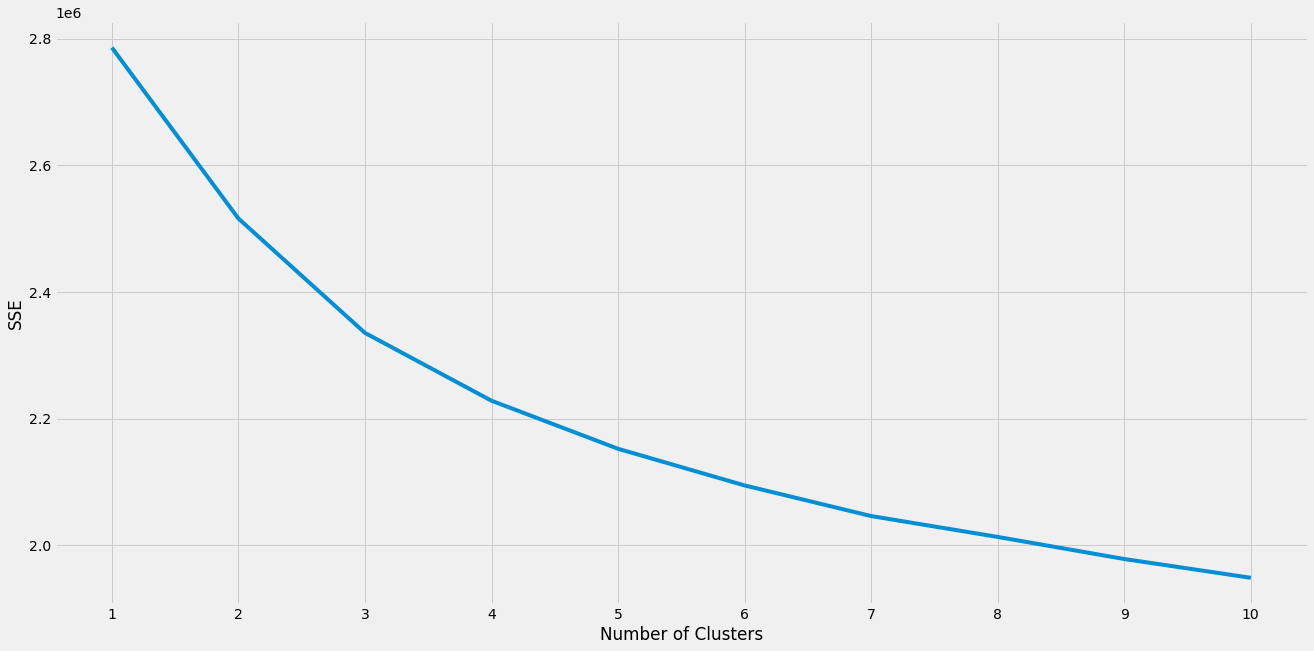

Elbow Point is  4


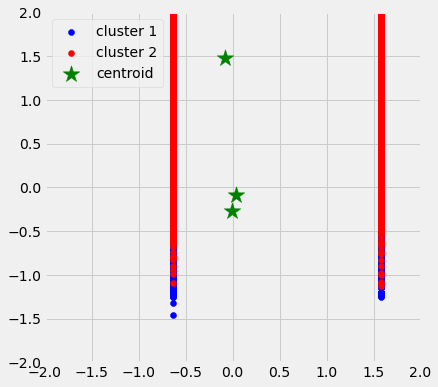

In [18]:
kmeansalgo(telchurn)

K Means Inertia =  2581224.3364519477 
K-Means Centroid Locations =  [[ 8.41398576e-01 -6.50521731e-01 -8.19333014e-01 -1.12243824e+00
  -3.07235349e-01 -1.76091102e-01 -1.24522141e-01 -1.09477728e-01
  -1.91006175e-01 -5.91363118e-01 -3.65542260e-01 -4.74548096e-01
  -3.66649469e-01 -2.54828252e-01 -5.16393932e-01 -6.85257448e-01
  -4.89167277e-01 -7.30884302e-01 -5.89255778e-01 -6.07051430e-01
  -2.02137117e-02 -3.28636492e-01  6.77925014e-01 -2.95585491e-01
  -2.75808213e-01 -4.77934973e-01 -3.54487908e-01 -6.16510947e-01
   1.18573366e+00  5.88242151e-01  2.44600965e-01  5.87881777e-01
  -4.01272130e-01 -3.04376305e+00 -6.04110566e-02 -3.00995375e-01
   6.89366443e-01 -4.17893468e-01 -4.46128993e-01 -1.23380006e-01
  -2.46780705e-01 -4.82142464e-01  6.73048993e-01 -1.75756261e-01
  -1.28320541e-01 -6.71531537e-02  8.25317974e-02 -1.93162107e-01
   7.81444158e-01 -1.17188911e-01 -1.40292947e-01 -1.83518168e-01
  -3.38640037e-01  1.83744756e-02  1.91181415e-01 -3.68167308e-01]
 [-2.4

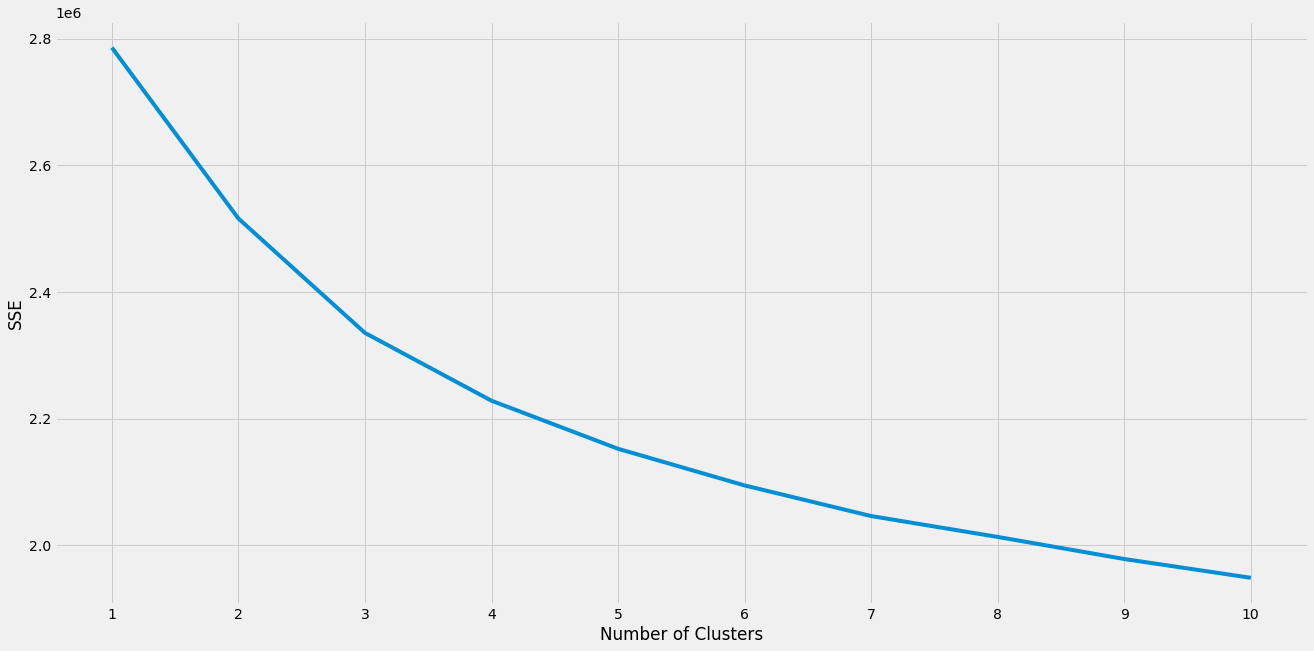

Elbow Point is  4


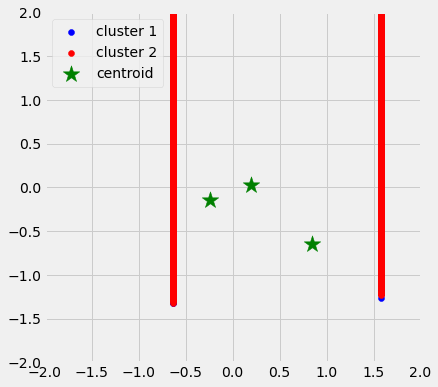

In [21]:
minibatch(telchurn)

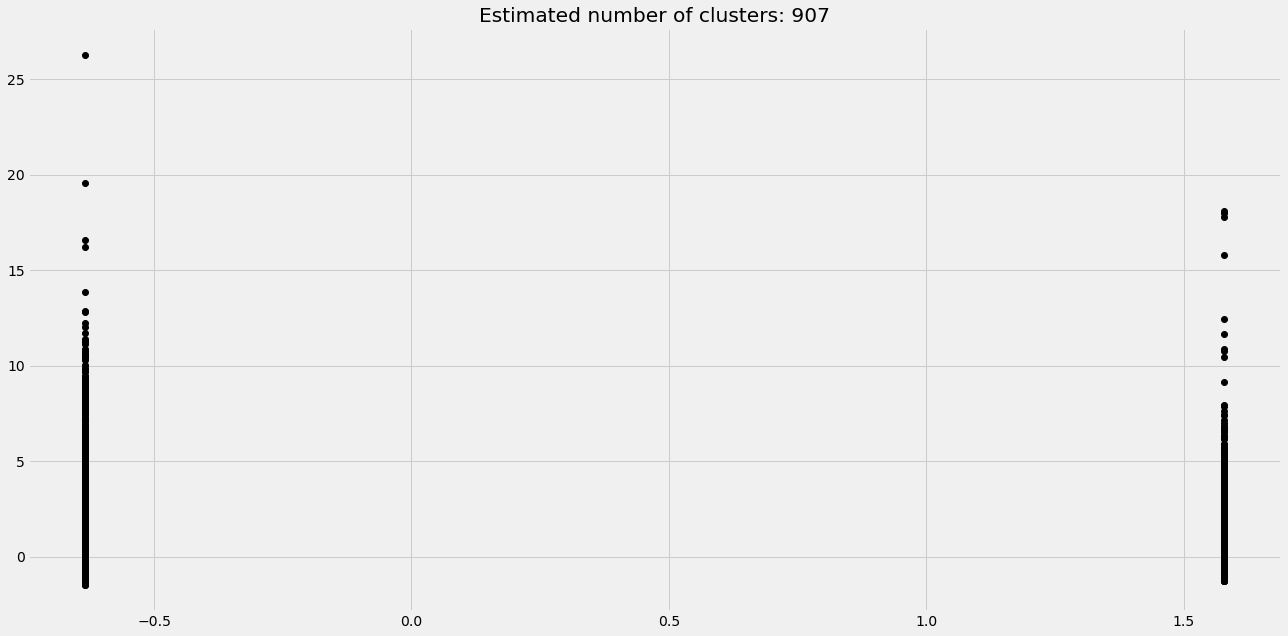

In [22]:
DB(telchurn)

Through clustering and the elbow plot, it is apparent that the predictive maintenance dataset has 4 features which capture 90% of the variance and contribute to 5% of the standard deviation. We need to find these features

In [148]:
features = featureextraction(4,predmaint)

What is the label columnMachine Failure Type
[ 2.015 30.512  6.142 79.042 96.488 65.207]


In [150]:
features.iloc[:4,:]
#These are the 4 features which have the greatest relation to the label 
#column (Churn).

columns  featurescores
4             Torque [Nm]      96.487631
3  Rotational speed [rpm]      79.041657
5         Tool wear [min]      65.207155
1     Air temperature [K]      30.511507

In [152]:
features = features['columns'].iloc[:4]

In [154]:
mcmcpredmaint = predmaint[features]

In [155]:
mcmcpredmaint['Machine Failure Type'] = predmaint['Machine Failure Type']

In [156]:
mcmcpredmaint

Torque [Nm]  Rotational speed [rpm]  Tool wear [min]  \
0            42.8                  1551.0              0.0   
1            46.3                  1408.0              3.0   
2            49.4                  1498.0              5.0   
3            39.5                  1433.0              7.0   
4            40.0                  1408.0              9.0   
...           ...                     ...              ...   
9995         29.5                  1604.0             14.0   
9996         31.8                  1632.0             17.0   
9997         33.4                  1645.0             22.0   
9998         48.5                  1408.0             25.0   
9999         40.2                  1500.0             30.0   

      Air temperature [K]  Machine Failure Type  
0                   298.1                   0.0  
1                   298.2                   0.0  
2                   298.1                   0.0  
3                   298.2                   0.0  
4                   298.2                   0.0  
...                   ...                   ...  
9995                298.8                   0.0  
9996                298.9                   0.0  
9997                299.0                   0.0  
9998                299.0                   0.0  
9999                299.0                   0.0  

[10000 rows x 5 columns]

In [15]:
mcmcpredmaint = loadfile()

What is the file type? (csv or excel)
csv
What encoding do you want? (latin1 or unicode_escape)
latin1
What is the filepath:mcmcpredmaint.csv


In [113]:
mcmcpredmaint

Torque [Nm]  Rotational speed [rpm]  Tool wear [min]  \
0            42.8                  1551.0              0.0   
1            46.3                  1408.0              3.0   
2            49.4                  1498.0              5.0   
3            39.5                  1433.0              7.0   
4            40.0                  1408.0              9.0   
...           ...                     ...              ...   
9995         29.5                  1604.0             14.0   
9996         31.8                  1632.0             17.0   
9997         33.4                  1645.0             22.0   
9998         48.5                  1408.0             25.0   
9999         40.2                  1500.0             30.0   

      Air temperature [K]  Machine Failure Type  
0                   298.1                   0.0  
1                   298.2                   0.0  
2                   298.1                   0.0  
3                   298.2                   0.0  
4                   298.2                   0.0  
...                   ...                   ...  
9995                298.8                   0.0  
9996                298.9                   0.0  
9997                299.0                   0.0  
9998                299.0                   0.0  
9999                299.0                   0.0  

[10000 rows x 5 columns]

## Multidimensional Gibbs Sampling

In [19]:
mcmcpredmaint['Machine Failure Type'].value_counts()

0.0    9643
2.0     106
4.0      98
3.0      83
1.0      42
5.0      19
6.0       9
Name: Machine Failure Type, dtype: int64

There is massive class imbalance in the dataset. Hence, without correcting for it, gibbs sampling will yield a dataset with only one class label.

In [20]:
X = mcmcpredmaint.iloc[:,:-1]
y = mcmcpredmaint['Machine Failure Type']
X1,y1 = Usampler(X,y)
X2,y2 = Osampler(X,y)

Original dataset shape Counter({0.0: 9643, 2.0: 106, 4.0: 98, 3.0: 83, 1.0: 42, 5.0: 19, 6.0: 9})
Resampled dataset shape Counter({0.0: 9, 1.0: 9, 2.0: 9, 3.0: 9, 4.0: 9, 5.0: 9, 6.0: 9})
Original dataset shape Counter({0.0: 9643, 2.0: 106, 4.0: 98, 3.0: 83, 1.0: 42, 5.0: 19, 6.0: 9})
Resampled dataset shape Counter({0.0: 9643, 3.0: 9643, 4.0: 9643, 1.0: 9643, 5.0: 9643, 6.0: 9643, 2.0: 9643})


In [21]:
#created undersampled and oversampled dataset
upredmaint = pd.DataFrame(X1)
upredmaint['Machine Failure Type'] = y1
opredmaint = pd.DataFrame(X2)
opredmaint['Machine Failure Type'] = y2

In [22]:
upredmaint.iloc[:1,:].values

array([[  43.4, 1507. ,   41. ,  300.5,    0. ]])

In [23]:
opredmaint.iloc[:1,:].values

array([[  42.8, 1551. ,    0. ,  298.1,    0. ]])

Calculating means of all features for both over and undersampled datasets.

In [164]:
#Undersampled
mean1 = upredmaint['Torque [Nm]'].values.sum()/len(upredmaint)
mean2 = upredmaint['Rotational speed [rpm]'].values.sum()/len(upredmaint)
mean3 = upredmaint['Tool wear [min]'].values.sum()/len(upredmaint)
mean4 = upredmaint['Air temperature [K]'].values.sum()/len(upredmaint)
mean5 = upredmaint['Machine Failure Type'].values.sum()/len(upredmaint)

#Oversampled
mean6 = opredmaint['Torque [Nm]'].values.sum()/len(opredmaint)
mean7 = opredmaint['Rotational speed [rpm]'].values.sum()/len(opredmaint)
mean8 = opredmaint['Tool wear [min]'].values.sum()/len(opredmaint)
mean9 = opredmaint['Air temperature [K]'].values.sum()/len(opredmaint)
mean10 = opredmaint['Machine Failure Type'].values.sum()/len(opredmaint)

In [165]:
means1 = [mean1,mean2,mean3,mean4,mean5]
means2 = [mean6,mean7,mean8,mean9,mean10]

Calculating covariances across all features for both over and undersampled datasets.

In [166]:
covdata1 = np.array([upredmaint['Torque [Nm]'].values, upredmaint['Rotational speed [rpm]'].values, upredmaint['Tool wear [min]'].values, upredmaint['Air temperature [K]'].values, upredmaint['Machine Failure Type'].values])
covdata2 = np.array([opredmaint['Torque [Nm]'].values, opredmaint['Rotational speed [rpm]'].values, opredmaint['Tool wear [min]'].values, opredmaint['Air temperature [K]'].values, opredmaint['Machine Failure Type'].values])

In [167]:
covariance1 = np.cov(covdata1)
covariance2 = np.cov(covdata2)

In [168]:
covariance1, covariance2

(array([[ 2.13282294e+02, -3.75009337e+03, -4.13786738e+01,
          6.22449821e+00,  5.07258065e+00],
        [-3.75009337e+03,  9.49326610e+04, -1.09364107e+03,
         -1.53286380e+02, -3.84032258e+01],
        [-4.13786738e+01, -1.09364107e+03,  5.03135381e+03,
         -2.94630824e+01, -1.57580645e+01],
        [ 6.22449821e+00, -1.53286380e+02, -2.94630824e+01,
          3.88379928e+00, -1.27419355e-01],
        [ 5.07258065e+00, -3.84032258e+01, -1.57580645e+01,
         -1.27419355e-01,  4.06451613e+00]]),
 array([[ 2.19661509e+02, -3.83877778e+03, -6.83261540e+01,
          3.07764613e+00,  3.88438222e+00],
        [-3.83877778e+03,  9.55571008e+04, -8.50596114e+02,
         -8.13945161e+01, -4.00777185e+01],
        [-6.83261540e+01, -8.50596114e+02,  5.10125747e+03,
         -2.16232764e+01, -6.56225185e+00],
        [ 3.07764613e+00, -8.13945161e+01, -2.16232764e+01,
          4.04495018e+00, -5.16888889e-02],
        [ 3.88438222e+00, -4.00777185e+01, -6.56225185e+00,
  

### Commencing Gibbs Sampling

In [97]:
def conditional_sampler(sampling_index, current_x, mean, cov):
    conditioned_index = 1 - sampling_index
    a = cov[sampling_index, sampling_index]
    b = cov[sampling_index, conditioned_index]
    c = cov[conditioned_index, conditioned_index]
    
    mu = mean[sampling_index] + (b * (current_x[conditioned_index] - mean[conditioned_index]))/c
    sigma = np.sqrt(a-(b**2)/c)
    new_x = np.copy(current_x)
    new_x[sampling_index] = np.random.randn()*sigma + mu
    return new_x

In [98]:
def gibbs_sampler(initial_point, num_samples, mean, cov):
    point = np.array(initial_point)
    samples = np.empty([num_samples+1, 5])  #sampled points
    samples[0] = point
    tmp_points = np.empty([num_samples, 5]) #inbetween points
    
    for i in range(num_samples):    
        point = conditional_sampler(0, point, mean, cov)
        tmp_points[i] = point
        point = conditional_sampler(1, point, mean, cov)
        samples[i+1] = point
        point = conditional_sampler(2, point, mean, cov)
        samples[i+1] = point
        point = conditional_sampler(3, point, mean, cov)
        samples[i+1] = point
        point = conditional_sampler(4, point, mean, cov)
        samples[i+1] = point
    return samples, tmp_points

#### For Undersampled Dataset

In [171]:
initial_point = [  43.4, 1507. ,   41. ,  300.5,    0. ]
#These are the first coordinates of the dataset.
num_samples = 100000
samples, tmp_points = gibbs_sampler(initial_point, num_samples, means1, covariance1)

In [172]:
uspredmaint = pd.DataFrame(samples)

In [173]:
uspredmaint

0            1           2      3         4
0       43.400000  1507.000000   41.000000  300.5  0.000000
1       55.705243  1230.982183   39.798927  300.5  1.570635
2       54.979280  1102.477262  160.571371  300.5 -0.399973
3       71.063580   802.377106   28.884004  300.5  5.225350
4       71.937056  1025.965969  100.152241  300.5  1.281759
...           ...          ...         ...    ...       ...
99996   30.229997  2039.499176  239.789228  300.5  3.942502
99997    4.959474  2270.139117  166.965910  300.5  5.169676
99998   21.153153  2163.299561   71.671818  300.5  3.778224
99999   19.262040  2284.524832   43.500902  300.5  3.217780
100000  21.718830  1893.565025  190.008516  300.5  1.554785

[100001 rows x 5 columns]

In [174]:
uspredmaint=uspredmaint.rename(columns={4:'Class'})

In [175]:
uspredmaint
#This dataset's Class column doesn't have strict categorical values. Applying a fix.

0            1           2      3     Class
0       43.400000  1507.000000   41.000000  300.5  0.000000
1       55.705243  1230.982183   39.798927  300.5  1.570635
2       54.979280  1102.477262  160.571371  300.5 -0.399973
3       71.063580   802.377106   28.884004  300.5  5.225350
4       71.937056  1025.965969  100.152241  300.5  1.281759
...           ...          ...         ...    ...       ...
99996   30.229997  2039.499176  239.789228  300.5  3.942502
99997    4.959474  2270.139117  166.965910  300.5  5.169676
99998   21.153153  2163.299561   71.671818  300.5  3.778224
99999   19.262040  2284.524832   43.500902  300.5  3.217780
100000  21.718830  1893.565025  190.008516  300.5  1.554785

[100001 rows x 5 columns]

In [176]:
for i in range(len(uspredmaint)):
    if uspredmaint['Class'][i]<=0.1:
        uspredmaint['Class'] = uspredmaint['Class'].replace(uspredmaint['Class'][i],0)
        
for i in range(len(uspredmaint)):
    if (uspredmaint['Class'][i]>=0.9 and uspredmaint['Class'][i]<=1.1):
        uspredmaint['Class'] = uspredmaint['Class'].replace(uspredmaint['Class'][i],1)

for i in range(len(uspredmaint)):
    if (uspredmaint['Class'][i]>=1.9 and uspredmaint['Class'][i]<=2.1):
        uspredmaint['Class'] = uspredmaint['Class'].replace(uspredmaint['Class'][i],2)

for i in range(len(uspredmaint)):
    if (uspredmaint['Class'][i]>=2.9 and uspredmaint['Class'][i]<=3.1):
        uspredmaint['Class'] = uspredmaint['Class'].replace(uspredmaint['Class'][i],3)

for i in range(len(uspredmaint)):
    if (uspredmaint['Class'][i]>=3.9 and uspredmaint['Class'][i]<=4.1):
        uspredmaint['Class'] = uspredmaint['Class'].replace(uspredmaint['Class'][i],4)

for i in range(len(uspredmaint)):
    if (uspredmaint['Class'][i]>=4.9 and uspredmaint['Class'][i]<=5.1):
        uspredmaint['Class'] = uspredmaint['Class'].replace(uspredmaint['Class'][i],5)

for i in range(len(uspredmaint)):
    if (uspredmaint['Class'][i]>=5.9):
        uspredmaint['Class'] = uspredmaint['Class'].replace(uspredmaint['Class'][i],6)


In [177]:
uszero = uspredmaint[uspredmaint['Class']==0]
usone = uspredmaint[uspredmaint['Class']==1]
ustwo = uspredmaint[uspredmaint['Class']==2]
usthree = uspredmaint[uspredmaint['Class']==3]
usfour = uspredmaint[uspredmaint['Class']==4]
usfive = uspredmaint[uspredmaint['Class']==5]
ussix = uspredmaint[uspredmaint['Class']==6]

In [178]:
uspredmaint = pd.concat([uszero,usone, ustwo,usthree,usfour,usfive,ussix])
#Taking sliced dataset for better representation of features corresponding
#to binary labels. 

In [179]:
uspredmaint

0            1           2      3  Class
0      43.400000  1507.000000   41.000000  300.5    0.0
2      54.979280  1102.477262  160.571371  300.5    0.0
18     49.644233  1266.222948  272.659210  300.5    0.0
19     60.820013  1546.096945  184.250069  300.5    0.0
31     45.805608  1537.753215  213.132255  300.5    0.0
...          ...          ...         ...    ...    ...
99942  48.828928  1583.193352   81.874204  300.5    6.0
99958  50.214160  1007.126831   95.304506  300.5    6.0
99966  40.591616  1569.927503   69.817787  300.5    6.0
99971  38.583111  1462.636011   76.470153  300.5    6.0
99973  44.562360  1663.791757   94.121815  300.5    6.0

[30580 rows x 5 columns]

#### For Oversampled Dataset

In [180]:
initial_point = [  42.8, 1551. ,    0. ,  298.1,    0. ]
#These are the first coordinates of the dataset.
num_samples = 100000
samples, tmp_points = gibbs_sampler(initial_point, num_samples, means2, covariance2)

In [184]:
ospredmaint = pd.DataFrame(samples)

In [185]:
ospredmaint

0            1           2      3         4
0       42.800000  1551.000000    0.000000  298.1  0.000000
1       43.267975  1471.765537   19.537857  298.1 -0.557308
2       52.835484  1435.885112  239.336225  298.1  3.435159
3       50.578225  1387.222649  219.189040  298.1  6.378118
4       47.837552  1493.444769  117.319657  298.1  4.993017
...           ...          ...         ...    ...       ...
99996   57.665258  1360.123551   71.603881  298.1  0.629398
99997   44.994754  1463.633251  156.425381  298.1  1.584309
99998   55.290771  1038.243470   59.425323  298.1 -0.285617
99999   48.967314  1340.555881  163.118298  298.1  2.863713
100000  48.364506  1591.348277  212.916965  298.1  1.194999

[100001 rows x 5 columns]

In [187]:
ospredmaint=ospredmaint.rename(columns={4:'Class'})

In [190]:
for i in range(len(ospredmaint)):
    if ospredmaint['Class'][i]<=0.1:
        ospredmaint['Class'] = ospredmaint['Class'].replace(ospredmaint['Class'][i],0)
        
for i in range(len(ospredmaint)):
    if (ospredmaint['Class'][i]<=1.1 and ospredmaint['Class'][i]>=0.9):
        ospredmaint['Class'] = ospredmaint['Class'].replace(ospredmaint['Class'][i],1)

for i in range(len(ospredmaint)):
    if (ospredmaint['Class'][i]<=2.1 and ospredmaint['Class'][i]>=1.9):
        ospredmaint['Class'] = ospredmaint['Class'].replace(ospredmaint['Class'][i],1)

for i in range(len(ospredmaint)):
    if (ospredmaint['Class'][i]<=3.1 and ospredmaint['Class'][i]>=2.9):
        ospredmaint['Class'] = ospredmaint['Class'].replace(ospredmaint['Class'][i],1)

for i in range(len(ospredmaint)):
    if (ospredmaint['Class'][i]<=4.1 and ospredmaint['Class'][i]>=3.9):
        ospredmaint['Class'] = ospredmaint['Class'].replace(ospredmaint['Class'][i],1)

for i in range(len(ospredmaint)):
    if (ospredmaint['Class'][i]<=5.1 and ospredmaint['Class'][i]>=4.9):
        ospredmaint['Class'] = ospredmaint['Class'].replace(ospredmaint['Class'][i],1)

for i in range(len(ospredmaint)):
    if ospredmaint['Class'][i]>=5.9:
        ospredmaint['Class'] = ospredmaint['Class'].replace(ospredmaint['Class'][i],6)


In [191]:
oszero = ospredmaint[ospredmaint['Class']==0]
osone = ospredmaint[ospredmaint['Class']==1]
ostwo = ospredmaint[ospredmaint['Class']==2]
osthree = ospredmaint[ospredmaint['Class']==3]
osfour = ospredmaint[ospredmaint['Class']==4]
osfive = ospredmaint[ospredmaint['Class']==5]
ossix = ospredmaint[ospredmaint['Class']==6]

In [192]:
ospredmaint = pd.concat([oszero,osone,ostwo,osthree,osfour,osfive,ossix])
#Taking sliced dataset for better representation of features corresponding
#to binary labels. 

In [193]:
uspredmaint.to_csv('uspredmaint.csv')
ospredmaint.to_csv('ospredmaint.csv')

### Analyzing Datasets

#### Undersampled Dataset

In [194]:
ustrainX, ustestX, ustrainY, ustestY = splitting(uspredmaint)

What is the label columnClass


In [198]:
randfor(ustrainX, ustestX, ustrainY, ustestY)

The Confusion Matrix is
 [[938  86 170 214 173  83 765]
 [297  31  59  70  64  25 275]
 [411  43 101 101  85  32 401]
 [451  44  98 127  96  26 442]
 [391  41  67  94  86  33 403]
 [263  22  44  75  57  26 295]
 [811  94 181 217 177  81 926]]
The Accuracy Score is
 22.146254458977406
The Precision is 15.66361108731233
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.26      0.39      0.31      2429
         1.0       0.09      0.04      0.05       821
         2.0       0.14      0.09      0.11      1174
         3.0       0.14      0.10      0.12      1284
         4.0       0.12      0.08      0.09      1115
         5.0       0.08      0.03      0.05       782
         6.0       0.26      0.37      0.31      2487

    accuracy                           0.22     10092
   macro avg       0.16      0.16      0.15     10092
weighted avg       0.19      0.22      0.20     10092

The Recall Score is 15.594008200548052
The F-Score is

In [199]:
supportvector(ustrainX, ustestX, ustrainY, ustestY)

Which kernel do you want to apply? (linear, rbf)rbf
Value of c?2
The Confusion Matrix is
 [[1358    0    0    0    0    0 1071]
 [ 408    0    0    0    0    0  413]
 [ 605    0    0    0    0    0  569]
 [ 623    0    0    0    0    0  661]
 [ 499    0    0    0    0    0  616]
 [ 355    0    0    0    0    0  427]
 [ 989    0    0    0    0    0 1498]]
The Accuracy Score is
 28.299643281807374
The Precision is 8.083062548894139
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.28      0.56      0.37      2429
         1.0       0.00      0.00      0.00       821
         2.0       0.00      0.00      0.00      1174
         3.0       0.00      0.00      0.00      1284
         4.0       0.00      0.00      0.00      1115
         5.0       0.00      0.00      0.00       782
         6.0       0.29      0.60      0.39      2487

    accuracy                           0.28     10092
   macro avg       0.08      0.17      0.11     

In [200]:
logisticregression(ustrainX, ustestX, ustrainY, ustestY)

The Confusion Matrix is
 [[1368    0    0    0    0    0 1061]
 [ 418    0    0    0    0    0  403]
 [ 634    0    0    0    0    0  540]
 [ 639    0    0    0    0    0  645]
 [ 510    0    0    0    0    0  605]
 [ 360    0    0    0    0    0  422]
 [1003    0    0    0    0    0 1484]]
The Accuracy Score is
 28.260007927070944
The Precision is 8.070988028550412
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.28      0.56      0.37      2429
         1.0       0.00      0.00      0.00       821
         2.0       0.00      0.00      0.00      1174
         3.0       0.00      0.00      0.00      1284
         4.0       0.00      0.00      0.00      1115
         5.0       0.00      0.00      0.00       782
         6.0       0.29      0.60      0.39      2487

    accuracy                           0.28     10092
   macro avg       0.08      0.17      0.11     10092
weighted avg       0.14      0.28      0.19     10092

The 

In [201]:
XGBOOST(ustrainX, ustestX, ustrainY, ustestY)

The Confusion Matrix is
 [[1190   23   47   76   43   22 1028]
 [ 404    5   12   19   11    3  367]
 [ 520    9   18   30   18   11  568]
 [ 579   15   21   27   14   12  616]
 [ 469    6   18   29   26    7  560]
 [ 320    5   13   27   14    6  397]
 [ 961   17   50   59   51   22 1327]]
The Accuracy Score is
 25.753071739992073
The Precision is 14.629684839466597
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.27      0.49      0.35      2429
         1.0       0.06      0.01      0.01       821
         2.0       0.10      0.02      0.03      1174
         3.0       0.10      0.02      0.03      1284
         4.0       0.15      0.02      0.04      1115
         5.0       0.07      0.01      0.01       782
         6.0       0.27      0.53      0.36      2487

    accuracy                           0.26     10092
   macro avg       0.15      0.16      0.12     10092
weighted avg       0.18      0.26      0.19     10092

The

#### Oversampled Dataset

In [202]:
ostrainX, ostestX, ostrainY, ostestY = splitting(ospredmaint)

What is the label columnClass


In [203]:
randfor(ostrainX, ostestX, ostrainY, ostestY)

The Confusion Matrix is
 [[ 277 1865  242]
 [ 652 4092  570]
 [ 289 1829  283]]
The Accuracy Score is
 46.063966729379146
The Precision is 14.448974099461504
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.23      0.12      0.15      2384
         1.0       0.53      0.77      0.62      5314
         6.0       0.26      0.12      0.16      2401

    accuracy                           0.46     10099
   macro avg       0.34      0.33      0.31     10099
weighted avg       0.39      0.46      0.40     10099

The Recall Score is 14.344289006119967
The F-Score is 0.4035268727319531


In [204]:
supportvector(ostrainX, ostestX, ostrainY, ostestY)

Which kernel do you want to apply? (linear, rbf)rbf
Value of c?2
The Confusion Matrix is
 [[   0 2384    0]
 [   0 5314    0]
 [   0 2401    0]]
The Accuracy Score is
 52.61907119516784
The Precision is 7.517010170738263
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      2384
         1.0       0.53      1.00      0.69      5314
         6.0       0.00      0.00      0.00      2401

    accuracy                           0.53     10099
   macro avg       0.18      0.33      0.23     10099
weighted avg       0.28      0.53      0.36     10099

The Recall Score is 14.285714285714285
The F-Score is 0.3628336395654602


In [205]:
logisticregression(ostrainX, ostestX, ostrainY, ostestY)

The Confusion Matrix is
 [[   0 2384    0]
 [   0 5314    0]
 [   0 2401    0]]
The Accuracy Score is
 52.61907119516784
The Precision is 7.517010170738263
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      2384
         1.0       0.53      1.00      0.69      5314
         6.0       0.00      0.00      0.00      2401

    accuracy                           0.53     10099
   macro avg       0.18      0.33      0.23     10099
weighted avg       0.28      0.53      0.36     10099

The Recall Score is 14.285714285714285
The F-Score is 0.3628336395654602


In [206]:
XGBOOST(ostrainX, ostestX, ostrainY, ostestY)

The Confusion Matrix is
 [[  69 2251   64]
 [ 144 5031  139]
 [  62 2272   67]]
The Accuracy Score is
 51.16348153282503
The Precision is 14.652042318778765
The Classification Report is
               precision    recall  f1-score   support

         0.0       0.25      0.03      0.05      2384
         1.0       0.53      0.95      0.68      5314
         6.0       0.25      0.03      0.05      2401

    accuracy                           0.51     10099
   macro avg       0.34      0.33      0.26     10099
weighted avg       0.40      0.51      0.38     10099

The Recall Score is 14.337034874475025
The F-Score is 0.3802812831932917


What we see here is that under and oversampling do yield better results than the original dataset. However, due to the number of classes in the dataset, the classification performance is poor even with Gibbs sampling. It has to be noted that not only is Gibbs sampling expected to yield discrete values stemming from non-discrete feature sets, but also yield 7 different class labels. This is a very demanding task. Hence, Gibbs sampling hasn't performed nearly as well as we'd hoped with regards to multiclass classification.

# Conclusion

Running both traditional Machine Learning Methods (Supervised and Unsupervised learning) and Markov Chain Monte Carlo Methods on these 3 datasets in this project has yielded some interesting results. 

## 1. Correcting for Massive Class Imbalance is a Huge Problem

2 of the datasets used in this project (Credit Card Fraud and Predictive Maintenance) had massive class imbalance. This yielded models which massively overfitted the data and would probably not be of much use in the industry. 

Oversampling seemed to be the one technique which overcame the massive divide in the classification of one label over the other in these datasets. However, Gibbs sampling and standard MCMC techniques like setting a prior and likelihood distribution to extract a posterior to sample from didn't perform very well either.  

## 2. Gibbs Sampling Alone Can't Yield Binary or Discrete Label Values. 
A problem encountered during the project was that Gibbs sampling couldn't be used to sample a label distribution which yielded discrete or binary values. 

Correcting for these values by extracting the values closest to the discrete label values is only a half-baked method. 

Though this method yielded greater than 80% accuracy in the case of the Credit Card Fraud dataset, it can't be relied on to yield success in industry problems all the time. 

This is clearly demonstrated through the results of the Predictive Maintenance dataset analysis where Precision, F1-Score, and Recall scores were all poor. 

## 3. NUTS Method Produces a Good F-Score, But Is Limiting
The NUTS method is very computationally intensive. That's why the number of samples in the distributions generated can only range from 500-1000 otherwise, resources are exhausted quickly. Also, the NUTS method is inept at multiclass classification. The only impressive thing about NUTS is that it always produces a good F-Score. This means it very clearly classifies the data and reduces discrepancies between class labels. Yet, the AUC scores are poor, which means that more than 1 feature is required to obtain a better classification accuracy and precision. 

## 4. Combinations of DR and FS Methods and MCMC Methods Can Yield Good Results

Through the process of clustering and developing an elbow plot, it is possible to identify features which contribute 90% of the variance to the data. 

Through these methods, it's possible to identify the features through which a cumulative distribution can be plotted from which we can sample our feature values. 

This process has at least proved fruitful in that it is faster than conventional MCMC methods which take very long to converge. 


## 5. Cleaning and Wrangling Data is Just as Important
During the initial phase of the project, the wrangling process identified class imbalances in the data, as well as value inaccuracies which could seriously compromise the analyses. 

